# Importing Libraries


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [12]:
data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/data/GC=F_stock_data.csv")

In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volatility',
       'Avg_Close_30', 'Avg_Volume_30', 'Close_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_6',
       'Close_Lag_7', 'Close_Lag_8', 'Close_Lag_9', 'Close_Lag_10',
       'Close_Lag_11', 'Close_Lag_12', 'Close_Lag_13', 'Close_Lag_14',
       'Close_Lag_15', 'Close_Lag_16', 'Close_Lag_17', 'Close_Lag_18',
       'Close_Lag_19', 'Close_Lag_20', 'Close_Lag_21', 'Close_Lag_22',
       'Close_Lag_23', 'Close_Lag_24', 'Close_Lag_25', 'Close_Lag_26',
       'Close_Lag_27', 'Close_Lag_28', 'Close_Lag_29', 'Close_Lag_30'],
      dtype='object')

# Machine Learning Models

The same process is followed for all the machine learning model. Every ML model is trained for each stock so that means every method creates 10 different models. Here the variable name stock corresponds to commodities

# Random Forest

##  Price Prediction 

In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize variables
stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])

# Define hyperparameter grid
param_grid = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [3,5,10]
}

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])


# Loop over each stock
for stock in stocks:
    # Load and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data = data.dropna()
    feat = data.columns[6:]
    X = data[feat]
    y = data['Close']
    
    # Time-based split
    split_point = int(len(data) * 0.8)
    train, test = data.iloc[:split_point], data.iloc[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    # Scale features
    X_scaler = RobustScaler()
    y_scaler = RobustScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    # Create and train model using Grid Search
    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Get and print the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best parameters for {stock}: {best_params}")

    # Train the model using the best parameters
    best_rf_model = RandomForestRegressor(**best_params)
    best_rf_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_rf_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    predictions[stock]=y_pred
    actuals[stock]=y_test
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(mse)
    # Store metrics and predictions
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Print results
print(metrics_df)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for CL=F: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 5}
5.8529409421820775
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for BZ=F: {'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 3}
5.297128098772751
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for NG=F: {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 3}
1.421819724765214
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for SI=F: {'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
0.5922008540875995
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for HG=F: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 5}
0.008004964421629322
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for ZC=F: {'min_samples_leaf': 1, 'min_samples_s

In [79]:
actuals

CL=F       BZ=F   NG=F       SI=F    HG=F    ZC=F       CT=F  \
2593  39.549999  42.299999  1.782  17.443001  2.5570  331.25  61.790001   
2594  38.189999  40.799999  1.789  17.868000  2.5700  333.75  60.810001   
2595  38.939999  41.180000  1.767  17.774000  2.6005  327.50  60.520000   
2596  39.599998  41.730000  1.780  17.775999  2.6570  326.25  60.509998   
2597  36.340000  38.549999  1.813  17.868999  2.5865  329.75  60.020000   
...         ...        ...    ...        ...     ...     ...        ...   
3237  79.559998  83.919998  5.079  23.764000  3.8030  666.25  85.209999   
3238  79.529999  84.330002  5.282  24.040001  3.8335  674.75  84.239998   
3239  78.959999  83.260002  4.709  23.663000  3.8320  682.75  83.260002   
3240  78.400002  82.260002  4.559  24.077999  3.8210  679.50  82.639999   
3241  80.260002  85.910004  4.475  23.862000  3.8055  678.50  83.370003   

            LE=F        KC=F  
2593   93.900002   98.900002  
2594   94.125000   98.900002  
2595   96.324997   97.800003  
2596   96.599998   96.750000  
2597   96.824997   96.000000  
...          ...         ...  
3237  156.899994  172.000000  
3238  156.824997  166.949997  
3239  157.449997  173.550003  
3240  158.500000  170.050003  
3241  154.824997  167.300003  

[649 rows x 9 columns]

In [80]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

27.99394527334442
2.404086034961752
0.9448623127061482


In [81]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Predictions_C.csv')
actuals.to_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Actuals_C.csv')

In [82]:
predictions

CL=F       BZ=F      NG=F       SI=F      HG=F        ZC=F  \
2593  36.338293  39.586627  1.805622  17.872399  2.478406  330.398897   
2594  36.458503  43.054815  1.805622  17.554520  2.566226  330.398897   
2595  35.409826  39.995516  1.805622  17.767111  2.572959  332.781250   
2596  36.458503  41.124775  1.846310  17.824434  2.593427  332.781250   
2597  36.458503  41.124775  1.846310  17.853085  2.634161  323.680556   
...         ...        ...       ...        ...       ...         ...   
3237  78.046458  80.181806  4.807927  23.856007  3.664386  648.813889   
3238  79.862211  83.662381  4.830441  23.582295  3.810612  653.757011   
3239  79.032434  84.341191  5.374018  23.524919  3.821345  672.468254   
3240  78.672852  84.782317  4.677806  23.675562  3.826844  681.376984   
3241  78.379634  81.082361  4.602279  23.769445  3.811855  678.063492   

           CT=F        LE=F        KC=F  
2593  60.318119   95.830556   97.602241  
2594  61.285837   94.521428   97.676240  
2595  60.983626   95.770834   97.369076  
2596  60.659070   97.113492   97.309992  
2597  60.997296   96.227778   97.433722  
...         ...         ...         ...  
3237  84.504089  155.780834  172.540505  
3238  85.100849  157.264585  173.208400  
3239  84.420769  157.874307  166.817207  
3240  83.960229  157.874307  175.050790  
3241  83.089247  158.652224  173.519213  

[649 rows x 9 columns]

### Storing predictions

In [83]:
RF_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Predictions_C.csv')
RF_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
RF_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F        ZC=F  \
0    36.338293  39.586627  1.805622  17.872399  2.478406  330.398897   
1    36.458503  43.054815  1.805622  17.554520  2.566226  330.398897   
2    35.409826  39.995516  1.805622  17.767111  2.572959  332.781250   
3    36.458503  41.124775  1.846310  17.824434  2.593427  332.781250   
4    36.458503  41.124775  1.846310  17.853085  2.634161  323.680556   
..         ...        ...       ...        ...       ...         ...   
644  78.046458  80.181806  4.807927  23.856007  3.664386  648.813889   
645  79.862211  83.662381  4.830441  23.582295  3.810612  653.757011   
646  79.032434  84.341191  5.374018  23.524919  3.821345  672.468254   
647  78.672852  84.782317  4.677806  23.675562  3.826844  681.376984   
648  78.379634  81.082361  4.602279  23.769445  3.811855  678.063492   

          CT=F        LE=F        KC=F  
0    60.318119   95.830556   97.602241  
1    61.285837   94.521428   97.676240  
2    60.983626   95.770834   97.369076  
3    60.659070   97.113492   97.309992  
4    60.997296   96.227778   97.433722  
..         ...         ...         ...  
644  84.504089  155.780834  172.540505  
645  85.100849  157.264585  173.208400  
646  84.420769  157.874307  166.817207  
647  83.960229  157.874307  175.050790  
648  83.089247  158.652224  173.519213  

[649 rows x 9 columns]

In [28]:
RF_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Predictions_C.csv')
RF_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)


Actual_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/RF_Actuals_C.csv')
Actual_Prices.drop(columns='Unnamed: 0',inplace=True)


## Portfolio Optimization 

In [8]:
#function to compute stock returns
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

### Data Preprocessing 

In [85]:
assetLabels = RF_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = RF_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.156 0.15  0.24  0.073 0.082 0.142 0.083 0.084 0.12 ]

Variance-Covariance Matrix of Returns:
 [[ 7.459  5.062  0.438  1.116  1.157  1.003  1.291  0.319  0.942]
 [ 5.062  7.789 -0.149  0.467  1.201  0.789  1.253  0.328  1.078]
 [ 0.438 -0.149 19.325 -0.095 -0.141 -0.053 -0.731 -0.054 -0.415]
 [ 1.116  0.467 -0.095  5.862  1.012  0.566  0.66  -0.082  0.791]
 [ 1.157  1.201 -0.141  1.012  3.176  0.131  0.792  0.069  0.608]
 [ 1.003  0.789 -0.053  0.566  0.131  6.129  0.538  0.069  0.669]
 [ 1.291  1.253 -0.731  0.66   0.792  0.538  6.522  0.125  1.013]
 [ 0.319  0.328 -0.054 -0.082  0.069  0.069  0.125  1.241  0.087]
 [ 0.942  1.078 -0.415  0.791  0.608  0.669  1.013  0.087  6.253]]


### Mean Variance Optimization Algorithm 

In [10]:

from scipy import optimize 

def MaximizeSharpeRatioOptmzn(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        funcDenomr = np.sqrt(np.matmul(np.matmul(x, CovarReturns), x.T) )
        funcNumer = np.matmul(np.array(MeanReturns),x.T)-RiskFreeRate
        func = -(funcNumer / funcDenomr)
        return func

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit=np.repeat(0.33, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])\
    
    #invoke minimize solver
    opt = optimize.minimize (f, x0 = xinit, args = (MeanReturns, CovarReturns,RiskFreeRate, PortfolioSize), method = 'SLSQP',bounds = bnds, constraints = cons, tol = 10**-3)
    
    return opt

### Portfolio Returns with RF Predictions # 

In [87]:
portfolioSize = len(RF_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))

expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.808]] 
Annualized Risk (%):   [[14.552]] 
Annualized Expected Portfolio Return(%):   [29.307]

Optimal weights (%):
 [[ 4.685]
 [ 5.965]
 [ 9.74 ]
 [ 2.811]
 [11.613]
 [13.105]
 [ 3.265]
 [39.912]
 [ 8.904]]


# Lasso Regression

##  Price Prediction 

In [91]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1]}
tscv=TimeSeriesSplit(3)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])


for stock in stocks:
    data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data=data.dropna()
    feat=data.columns
    feat=feat[6:]
    X = data[feat]
    
    close_lag_cols = [col for col in X.columns if col.startswith('Close_Lag_')]
    other_cols = [col for col in X.columns if col not in close_lag_cols]

    # Combine the two lists
    new_order = close_lag_cols + other_cols

    # Reorder columns in dataframe
    X = X[new_order]

    
    y = data['Close']
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train,y_train=train[feat],train['Close']
    X_test,y_test=test[feat],test['Close']

    X_scaler = RobustScaler()
    y_scaler = RobustScaler()

    # Fit the X_scaler on training data and transform it
    X_train_scaled = X_scaler.fit_transform(X_train)

    # Transform the X test data
    X_test_scaled = X_scaler.transform(X_test)

    # Fit the y_scaler on training target and transform it
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    model = Lasso()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Get and print the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best parameters for {stock}: {best_params}")

    # Train the model using the best parameters
    best_rf_model = Lasso(**best_params)
    best_rf_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_rf_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    
    predictions[stock]=y_pred
    actuals[stock]=y_test
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    

    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)
print(metrics_df)
        

    

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for CL=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for BZ=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for NG=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SI=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for HG=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for ZC=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for CT=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for LE=F: {'alpha': 0.001}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for KC=F: {'alpha': 0.001}
  Stock         MSE       MAE        R2
0  CL=F    4.961423  1.525094  0.

In [92]:
predictions

CL=F       BZ=F      NG=F       SI=F      HG=F        ZC=F  \
2593  37.499196  40.199527  1.827771  18.018629  2.493534  329.387131   
2594  39.129828  42.486742  1.790251  17.443745  2.556214  331.546810   
2595  38.574140  41.010306  1.796027  17.864146  2.569184  334.013764   
2596  38.952686  41.382511  1.775442  17.774888  2.599550  327.869644   
2597  39.574028  41.921576  1.787330  17.777332  2.655556  326.681866   
...         ...        ...       ...        ...       ...         ...   
3237  77.450460  80.903624  5.003469  23.455015  3.750133  659.653655   
3238  78.919305  83.813850  5.069258  23.740410  3.798845  665.360980   
3239  79.331657  84.231104  5.263625  24.013251  3.828582  673.794943   
3240  78.998996  83.176283  4.728023  23.641087  3.827102  681.698569   
3241  78.531932  82.183889  4.568990  24.053324  3.816546  678.527348   

           CT=F        LE=F        KC=F  
2593  59.975914   95.670991   98.362409  
2594  61.904937   93.912302   99.087548  
2595  60.945897   94.145765   99.100236  
2596  60.570938   96.306634   98.047482  
2597  60.514424   96.569611   97.014148  
...         ...         ...         ...  
3237  84.069429  155.783591  168.688007  
3238  84.960458  156.772731  171.727729  
3239  84.206204  156.682853  166.825102  
3240  83.031864  157.302548  173.339742  
3241  82.270090  158.308234  169.898739  

[649 rows x 9 columns]

In [93]:
actuals

CL=F       BZ=F   NG=F       SI=F    HG=F    ZC=F       CT=F  \
2593  39.549999  42.299999  1.782  17.443001  2.5570  331.25  61.790001   
2594  38.189999  40.799999  1.789  17.868000  2.5700  333.75  60.810001   
2595  38.939999  41.180000  1.767  17.774000  2.6005  327.50  60.520000   
2596  39.599998  41.730000  1.780  17.775999  2.6570  326.25  60.509998   
2597  36.340000  38.549999  1.813  17.868999  2.5865  329.75  60.020000   
...         ...        ...    ...        ...     ...     ...        ...   
3237  79.559998  83.919998  5.079  23.764000  3.8030  666.25  85.209999   
3238  79.529999  84.330002  5.282  24.040001  3.8335  674.75  84.239998   
3239  78.959999  83.260002  4.709  23.663000  3.8320  682.75  83.260002   
3240  78.400002  82.260002  4.559  24.077999  3.8210  679.50  82.639999   
3241  80.260002  85.910004  4.475  23.862000  3.8055  678.50  83.370003   

            LE=F        KC=F  
2593   93.900002   98.900002  
2594   94.125000   98.900002  
2595   96.324997   97.800003  
2596   96.599998   96.750000  
2597   96.824997   96.000000  
...          ...         ...  
3237  156.899994  172.000000  
3238  156.824997  166.949997  
3239  157.449997  173.550003  
3240  158.500000  170.050003  
3241  154.824997  167.300003  

[649 rows x 9 columns]

### Overall model performance

In [94]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

21.101985354232042
1.8868944271285473
0.9870209713275293


### Storing predictions

In [95]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/LR_Predictions_C.csv')
actuals.to_csv('C:/Users/kship/Documents/IB/predictions/results/LR_Actuals_C.csv')

In [33]:
LR_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/LR_Predictions_C.csv')
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
LR_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LR_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F        ZC=F  \
0    37.499196  40.199527  1.827771  18.018629  2.493534  329.387131   
1    39.129828  42.486742  1.790251  17.443745  2.556214  331.546810   
2    38.574140  41.010306  1.796027  17.864146  2.569184  334.013764   
3    38.952686  41.382511  1.775442  17.774888  2.599550  327.869644   
4    39.574028  41.921576  1.787330  17.777332  2.655556  326.681866   
..         ...        ...       ...        ...       ...         ...   
644  77.450460  80.903624  5.003469  23.455015  3.750133  659.653655   
645  78.919305  83.813850  5.069258  23.740410  3.798845  665.360980   
646  79.331657  84.231104  5.263625  24.013251  3.828582  673.794943   
647  78.998996  83.176283  4.728023  23.641087  3.827102  681.698569   
648  78.531932  82.183889  4.568990  24.053324  3.816546  678.527348   

          CT=F        LE=F        KC=F  
0    59.975914   95.670991   98.362409  
1    61.904937   93.912302   99.087548  
2    60.945897   94.145765   99.100236  
3    60.570938   96.306634   98.047482  
4    60.514424   96.569611   97.014148  
..         ...         ...         ...  
644  84.069429  155.783591  168.688007  
645  84.960458  156.772731  171.727729  
646  84.206204  156.682853  166.825102  
647  83.031864  157.302548  173.339742  
648  82.270090  158.308234  169.898739  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


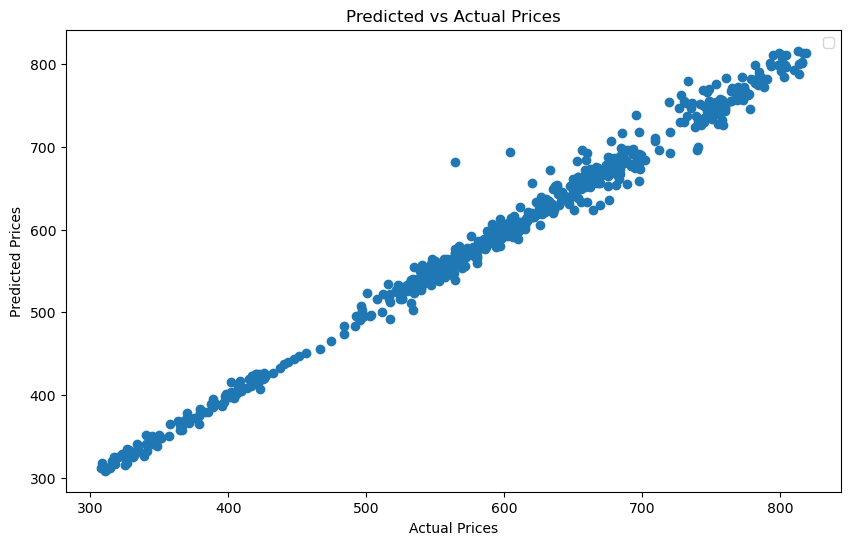

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], LR_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

### Data Preprocessing 


In [97]:
assetLabels = LR_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LR_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.133 0.14  0.252 0.069 0.079 0.131 0.073 0.082 0.109]

Variance-Covariance Matrix of Returns:
 [[ 3.758  4.314  0.813  0.797  1.045  0.848  1.121  0.145  0.808]
 [ 4.314  5.938  0.571  0.895  1.321  0.916  1.325  0.202  0.936]
 [ 0.813  0.571 22.617  0.359  0.308  0.406  0.52  -0.164  0.344]
 [ 0.797  0.895  0.359  4.876  1.25   0.619  0.634  0.081  0.513]
 [ 1.045  1.321  0.308  1.25   2.583  0.513  0.932  0.12   0.755]
 [ 0.848  0.916  0.406  0.619  0.513  3.74   0.738 -0.065  0.707]
 [ 1.121  1.325  0.52   0.634  0.932  0.738  4.625  0.068  0.833]
 [ 0.145  0.202 -0.164  0.081  0.12  -0.065  0.068  0.879  0.155]
 [ 0.808  0.936  0.344  0.513  0.755  0.707  0.833  0.155  4.921]]


### Portfolio Returns with LR Predictions 

In [98]:
portfolioSize = len(LR_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.889]] 
Annualized Risk (%):   [[12.664]] 
Annualized Expected Portfolio Return(%):   [26.928]

Optimal weights (%):
 [[12.121]
 [ 0.   ]
 [ 5.587]
 [ 0.702]
 [ 4.038]
 [17.239]
 [ 0.   ]
 [55.145]
 [ 5.167]]


# SVR

##  Price Prediction 

In [267]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initialize empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])

data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
# List of stock names
stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Hyperparameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1]
}

# Initialize SVR model
model = SVR()

# Initialize Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

for stock in stocks:
    # Load stock data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data = data.dropna()

    # Features and target variable
    features = data.columns[6:]
    X = data[features]
    y = data['Close']

    # Train-test split
    split_point = int(len(data) * 0.8)
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    # Scaling
    X_scaler = RobustScaler()
    y_scaler = RobustScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for {stock}: {best_params}")

    # Train the model using best hyperparameters
    best_svr_model = SVR(**best_params)
    best_svr_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_svr_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    predictions[stock]=y_pred
    actuals[stock]=y_test
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Show metrics DataFrame
print(metrics_df)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for CL=F: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for BZ=F: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for NG=F: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for SI=F: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for HG=F: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best hyperparameters for ZC=F: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 150 candidates, to

### Overall model performance

In [268]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

3.90383189050625
0.7040558141169883
0.9988769284311897


In [269]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/SVR_Predictions_C.csv')
actuals.to_csv('C:/Users/kship/Documents/IB/predictions/results/SVR_Actuals_C.csv')

In [39]:
SVR_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/SVR_Predictions_C.csv')
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
SVR_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
SVR_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F        ZC=F  \
0    38.667048  41.132209  1.788115  17.550650  2.542385  330.194236   
1    38.964754  41.857742  1.791115  17.769518  2.565801  332.522575   
2    38.854336  41.136651  1.771152  17.782046  2.592639  330.162331   
3    39.445217  41.613747  1.778426  17.777852  2.644251  326.561453   
4    38.120805  40.589708  1.810697  17.849267  2.601838  328.222499   
..         ...        ...       ...        ...       ...         ...   
644  78.548903  81.963794  5.060937  23.707775  3.793944  662.828700   
645  79.384750  83.890039  5.259008  23.970947  3.822560  670.927467   
646  79.206717  83.860631  4.782851  23.729774  3.830817  678.712908   
647  78.629308  82.935715  4.572794  24.000140  3.821392  680.682733   
648  79.343342  83.833106  4.491724  23.920492  3.806865  679.005189   

          CT=F        LE=F        KC=F  
0    61.539006   94.214665   98.742444  
1    61.035188   94.003359   98.898138  
2    60.562547   96.094237   98.009320  
3    60.538215   96.580069   96.998846  
4    60.071223   96.863161   96.265605  
..         ...         ...         ...  
644  84.926122  156.731069  171.027606  
645  84.324686  156.857090  167.845376  
646  83.419378  157.362313  172.192320  
647  82.692410  158.361225  170.695944  
648  83.239220  155.351316  167.836986  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


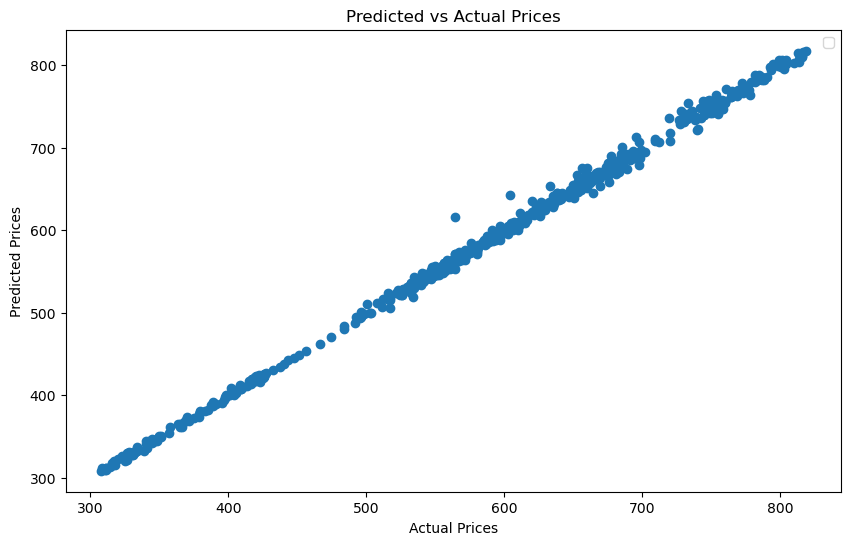

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], SVR_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

### Data Preprocessing 

In [271]:
assetLabels = SVR_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = SVR_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.127 0.125 0.234 0.064 0.071 0.122 0.066 0.081 0.099]

Variance-Covariance Matrix of Returns:
 [[ 3.237  2.834  0.786  0.627  0.725  0.621  0.934  0.11   0.649]
 [ 2.834  2.996  0.637  0.518  0.528  0.538  0.788  0.072  0.582]
 [ 0.786  0.637 18.885  0.321  0.298  0.188  0.556 -0.098  0.293]
 [ 0.627  0.518  0.321  3.231  0.883  0.297  0.541  0.046  0.363]
 [ 0.725  0.528  0.298  0.883  1.715  0.194  0.723  0.104  0.526]
 [ 0.621  0.538  0.188  0.297  0.194  2.08   0.436 -0.007  0.309]
 [ 0.934  0.788  0.556  0.541  0.723  0.436  3.802  0.1    0.69 ]
 [ 0.11   0.072 -0.098  0.046  0.104 -0.007  0.1    0.689  0.105]
 [ 0.649  0.582  0.293  0.363  0.526  0.309  0.69   0.105  3.406]]


### Portfolio Returns with SVR Predictions 

In [272]:
portfolioSize = len(SVR_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.113]] 
Annualized Risk (%):   [[10.729]] 
Annualized Expected Portfolio Return(%):   [25.674]

Optimal weights (%):
 [[ 0.   ]
 [ 9.604]
 [ 4.462]
 [ 0.851]
 [ 6.041]
 [24.667]
 [ 0.   ]
 [48.264]
 [ 6.112]]


# XGBoost

##  Price Prediction 

In [106]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])


for stock in stocks:
    data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data=data.dropna()
    feat=data.columns
    feat=feat[6:]
    X = data[feat]
    
    close_lag_cols = [col for col in X.columns if col.startswith('Close_Lag_')]
    other_cols = [col for col in X.columns if col not in close_lag_cols]

    # Combine the two lists
    new_order = close_lag_cols + other_cols

    # Reorder columns in dataframe
    X = X[new_order]

    
    y = data['Close']
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train,y_train=train[feat],train['Close']
    X_test,y_test=test[feat],test['Close']

    X_scaler = RobustScaler()
    y_scaler = RobustScaler()

    # Fit the X_scaler on training data and transform it
    X_train_scaled = X_scaler.fit_transform(X_train)

    # Transform the X test data
    X_test_scaled = X_scaler.transform(X_test)

    # Fit the y_scaler on training target and transform it
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    model = xgb.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train_scaled, y_train_scaled)

    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse transform the predicted values to get them on the original scale
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    predictions[stock]=y_pred
    actuals[stock]=y_test
    mse = mean_squared_error(y_test, y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    

    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)
        
print(metrics_df)
        

    

  Stock         MSE        MAE        R2
0  CL=F    9.230052   1.938802  0.981405
1  BZ=F    7.223315   1.899872  0.986261
2  NG=F    1.533402   0.658178  0.643113
3  SI=F    0.595818   0.574981  0.922647
4  HG=F    0.013128   0.079797  0.962793
5  ZC=F  195.482438  10.150751  0.989313
6  CT=F    8.602459   1.980719  0.984672
7  LE=F    2.033764   1.010960  0.991577
8  KC=F   22.416546   3.477287  0.990425


In [2]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import xgboost as xgb

stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# List of stock names
data=pd.read_csv("C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)
metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])


# Hyperparameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150],
    'objective': ['reg:squarederror'],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

for stock in stocks:
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data = data.dropna()

    # Features and target variable
    feat = data.columns[6:]
    X = data[feat]
    y = data['Close']

    # Train-test split
    split_point = int(len(data) * 0.8)
    X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

    # Scaling
    X_scaler = RobustScaler()
    y_scaler = RobustScaler()
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

    # Initialize model
    model = xgb.XGBRegressor()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

    # Fit GridSearchCV
    grid_search.fit(X_train_scaled, y_train_scaled)

    # Best hyperparameters
    best_params = grid_search.best_params_

    print(f"Best hyperparameters for {stock}: {best_params}")

    # Train model using best hyperparameters
    best_model = xgb.XGBRegressor(**best_params)
    best_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions
    y_pred_scaled = best_model.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    predictions[stock] = y_pred
    actuals[stock] = y_test

    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Show metrics DataFrame
print(metrics_df)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for CL=F: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.9}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for BZ=F: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.9}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for NG=F: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperparameters for SI=F: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.8}
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best hyperpar

In [85]:
predictions.to_csv('C:/Users/kship/Documents/IB/predictions/results/XGB_Predictions_C.csv')
actuals.to_csv('C:/Users/kship/Documents/IB/predictions/results/XGB_Actuals_C.csv')

### Overall model performance 

In [86]:
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

22.386413695757533
2.1447924430434413
0.9509197027274142


In [87]:
XGB_Predicted_Prices=pd.read_csv('C:/Users/kship/Documents/IB/predictions/results/XGB_Predictions_C.csv')
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
XGB_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
XGB_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    36.884842  39.644737  1.816031  17.917654  2.458780  326.98657   
1    40.029648  40.760895  1.791244  17.562677  2.541635  329.92703   
2    36.813705  40.194900  1.798498  17.917654  2.579421  329.56885   
3    40.208454  40.988766  1.794623  17.862790  2.586087  330.17444   
4    40.278572  41.131153  1.794386  17.821245  2.647238  326.62840   
..         ...        ...       ...        ...       ...        ...   
644  77.359160  80.877370  5.050356  23.493937  3.789928  651.85034   
645  79.644135  83.300156  4.969902  23.745857  3.795341  654.60810   
646  80.066940  83.810265  5.055306  23.562653  3.868980  669.85925   
647  78.489624  83.810265  4.808166  23.310730  3.845884  689.02000   
648  77.966850  81.699390  4.577214  23.745857  3.849356  683.75750   

          CT=F        LE=F       KC=F  
0    60.105236   95.759575   98.25990  
1    61.324340   95.003845   98.59621  
2    61.510280   95.315860   98.54025  
3    60.438675   96.899610   98.09807  
4    60.358470   96.899610   97.64134  
..         ...         ...        ...  
644  84.668550  155.675320  170.18573  
645  85.050050  157.719670  170.67645  
646  84.727890  157.451500  166.82239  
647  83.271095  157.451500  174.42082  
648  83.041916  157.829220  170.89476  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


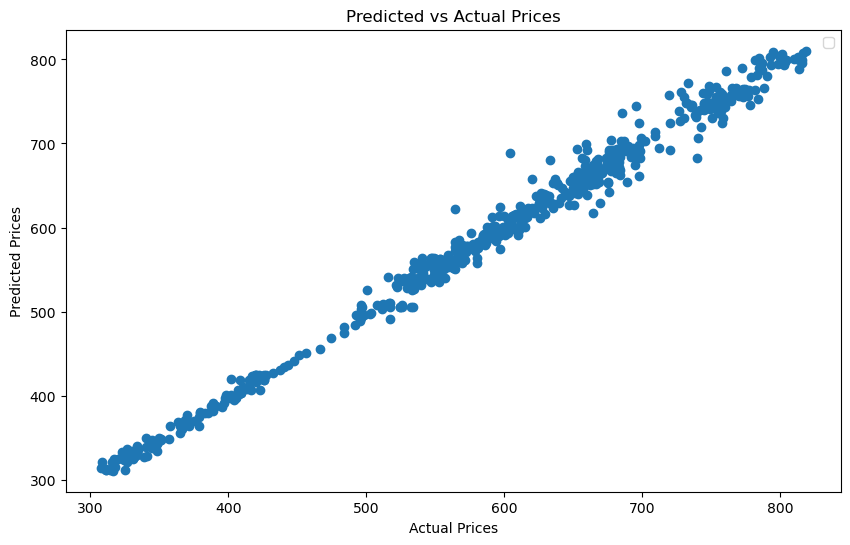

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], XGB_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

In [89]:
assetLabels = XGB_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = XGB_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.15  0.142 0.192 0.067 0.081 0.13  0.074 0.082 0.104]

Variance-Covariance Matrix of Returns:
 [[ 6.971  4.145  0.518  0.756  0.936  0.975  1.022  0.233  0.589]
 [ 4.145  6.14   0.143  0.635  0.966  0.717  0.935  0.255  0.803]
 [ 0.518  0.143 10.149  0.338 -0.234  0.047 -0.121  0.067 -0.035]
 [ 0.756  0.635  0.338  4.733  0.787  0.511  0.538 -0.03   0.469]
 [ 0.936  0.966 -0.234  0.787  2.321  0.299  0.648  0.094  0.47 ]
 [ 0.975  0.717  0.047  0.511  0.299  3.288  0.375 -0.017  0.521]
 [ 1.022  0.935 -0.121  0.538  0.648  0.375  4.832  0.039  0.636]
 [ 0.233  0.255  0.067 -0.03   0.094 -0.017  0.039  0.881  0.022]
 [ 0.589  0.803 -0.035  0.469  0.47   0.521  0.636  0.022  3.743]]


### Portfolio Returns with XGB Predictions 

In [90]:
portfolioSize = len(XGB_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.688]] 
Annualized Risk (%):   [[15.312]] 
Annualized Expected Portfolio Return(%):   [28.84]

Optimal weights (%):
 [[ 9.396]
 [ 9.706]
 [12.989]
 [ 9.658]
 [11.133]
 [12.628]
 [ 9.837]
 [13.121]
 [11.531]]


# Deep Learning Models

# LSTM

## LSTM price prediction with Adam Optimizer

Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.916293991804652
73/73 [==============================] - 3s 13ms/step - loss: 0.0070 - val_loss: 0.0018
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.0013 
val_r2: 0.9451467084088682
73/73 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9527460718060461
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 9.2806e-
val_r2: 0.9574127921819768
73/73 [==============================] - 0s 5ms/step - loss: 9.0582e-04 - val_loss: 9.0680e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 7.5685e-
val_r2: 0.9738511968875202
73/73 [==============================] - 0s 5ms/step - loss: 7.4730e-04 - val_loss: 5.5678e-04
Epoch 6/50
9/9 [======================

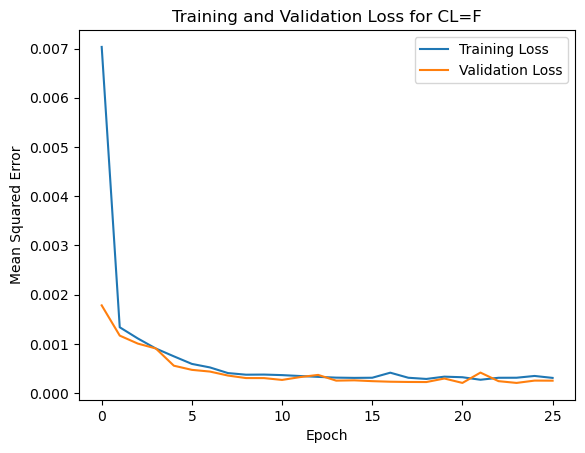

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.05
val_r2: 0.9651377329838688
73/73 [==============================] - 3s 13ms/step - loss: 0.0442 - val_loss: 0.0022
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9693547946633858
73/73 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9775713645480251
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9839701011492438
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 8.6753e-
val_r2: 0.9877187929640288
73/73 [==============================] - 0s 5ms/step - loss: 8.5820e-04 - val_loss: 7.7241e-04

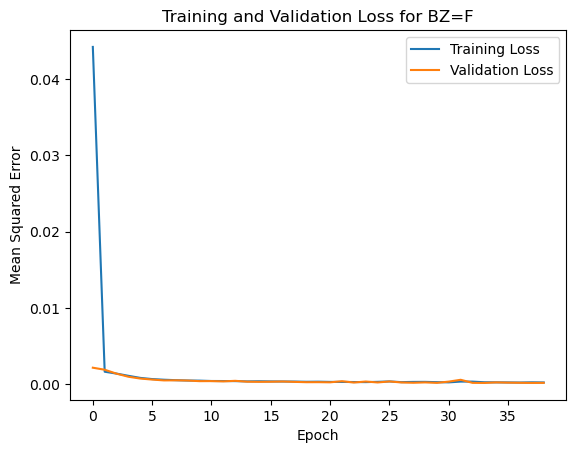

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.01
val_r2: 0.8815332763358913
73/73 [==============================] - 3s 13ms/step - loss: 0.0125 - val_loss: 0.0039
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9330088721707627
73/73 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/50
9/9 [==============================] - 0s 1ms/step loss: 0.00
val_r2: 0.933261059172159
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9502903810468274
73/73 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.0011
val_r2: 0.9621744445449141
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/50

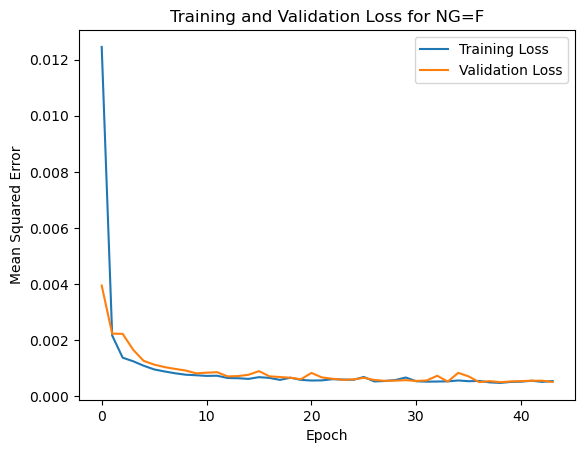

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9291121457759729
73/73 [==============================] - 3s 14ms/step - loss: 0.0199 - val_loss: 0.0024
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.951944670429561
73/73 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9597929600730376
73/73 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 9.0996e-
val_r2: 0.9740543063756789
73/73 [==============================] - 1s 18ms/step - loss: 8.6516e-04 - val_loss: 8.6488e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 7.4734e-
val_r2: 0.9820051979834956
73/73 [==============================] - 0s 5ms/step - loss: 7.3326e-04 - val_loss

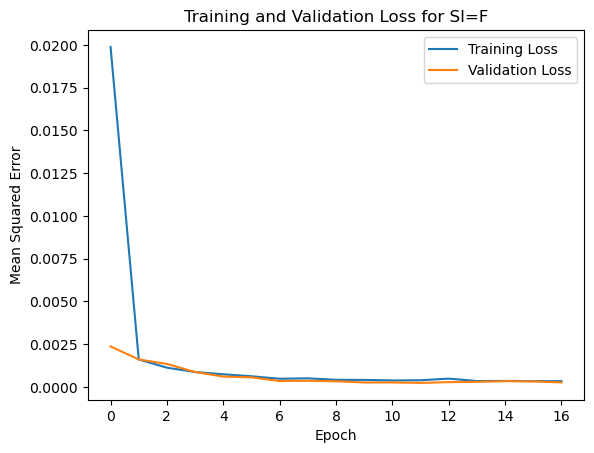

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.02
val_r2: 0.9505534231321002
73/73 [==============================] - 3s 14ms/step - loss: 0.0236 - val_loss: 0.0024
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9641610137893114
73/73 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9771309917781237
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.0010 
val_r2: 0.9840522622948558
73/73 [==============================] - 0s 5ms/step - loss: 9.8975e-04 - val_loss: 7.6413e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 9.5005e-
val_r2: 0.9807241235898098
73/73 [==============================] - 0s 5ms/step - loss: 9.4493e-04 - val_loss:

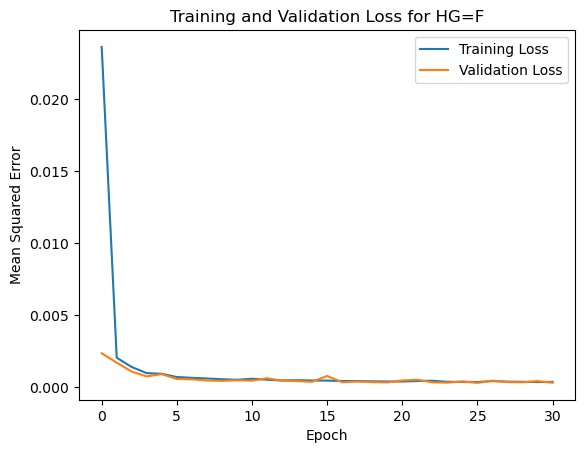

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.01
val_r2: 0.9550849522540774
73/73 [==============================] - 3s 15ms/step - loss: 0.0143 - val_loss: 0.0029
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9671976873519086
73/73 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/50
9/9 [==============================] - 0s 5ms/step loss: 0.00
val_r2: 0.9780869326636915
73/73 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.0012
val_r2: 0.9815634918096159
73/73 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 8.8088e-
val_r2: 0.9821490004869715
73/73 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch

9/9 [==============================] - 0s 2ms/step loss: 4.2615e-
val_r2: 0.9945729731936654
73/73 [==============================] - 0s 5ms/step - loss: 4.1546e-04 - val_loss: 3.5101e-04
Epoch 43/50
9/9 [==============================] - 0s 4ms/step loss: 5.0904e-
val_r2: 0.9945498138880017
73/73 [==============================] - 0s 6ms/step - loss: 5.0066e-04 - val_loss: 3.5251e-04
Epoch 44/50
9/9 [==============================] - 0s 4ms/step loss: 4.3990e-
val_r2: 0.9930348058823187
73/73 [==============================] - 0s 6ms/step - loss: 4.2474e-04 - val_loss: 4.5050e-04
Epoch 45/50
9/9 [==============================] - 0s 4ms/step loss: 4.3049e-
val_r2: 0.9947546036897058
73/73 [==============================] - 0s 6ms/step - loss: 4.0420e-04 - val_loss: 3.3926e-04
Epoch 46/50
9/9 [==============================] - 0s 2ms/step loss: 4.3450e-
val_r2: 0.9945632293376415
73/73 [==============================] - 0s 6ms/step - loss: 4.1940e-04 - val_loss: 3.5164e-04
Epoch 47/50


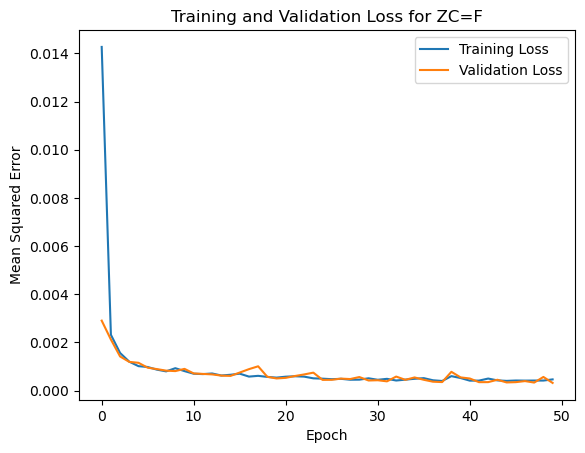

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.01
val_r2: 0.9436175064873852
73/73 [==============================] - 3s 15ms/step - loss: 0.0105 - val_loss: 0.0020
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9674056786505729
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9766904031859661
73/73 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.4293e-04
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 7.2818e-
val_r2: 0.9813425904089554
73/73 [==============================] - 0s 5ms/step - loss: 7.5137e-04 - val_loss: 6.7470e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 5.7155e-
val_r2: 0.9853393562905503
73/73 [==============================] - 0s 5ms/step - loss: 5.6407e-04 - val_

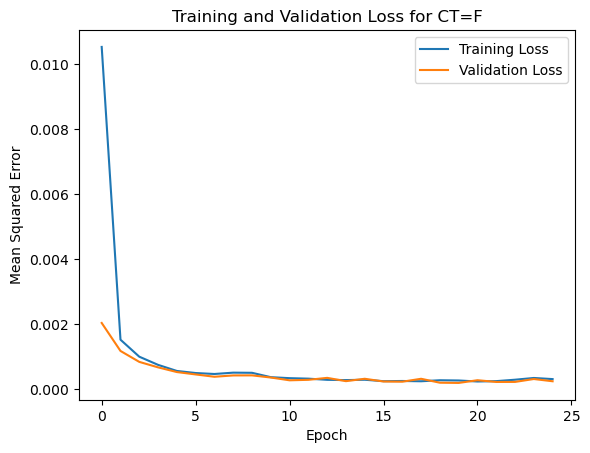

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.02
val_r2: 0.9303718876080158
73/73 [==============================] - 3s 14ms/step - loss: 0.0229 - val_loss: 0.0029
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9557279029518734
73/73 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/50
9/9 [==============================] - 0s 5ms/step loss: 0.00
val_r2: 0.9717994951083995
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9746438957352956
73/73 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9777515651340453
73/73 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 9.4101e-04
Epoch 6

9/9 [==============================] - 0s 2ms/step loss: 4.0664e-
val_r2: 0.9925355863545878
73/73 [==============================] - 0s 5ms/step - loss: 3.8882e-04 - val_loss: 3.1571e-04
Epoch 43/50
9/9 [==============================] - 0s 2ms/step loss: 3.5389e-
val_r2: 0.991738269497622
73/73 [==============================] - 0s 6ms/step - loss: 3.5106e-04 - val_loss: 3.4944e-04
Epoch 44/50
9/9 [==============================] - 0s 4ms/step loss: 3.6172e-
val_r2: 0.9902890496317359
73/73 [==============================] - 0s 5ms/step - loss: 3.5837e-04 - val_loss: 4.1073e-04
Epoch 45/50
9/9 [==============================] - 0s 4ms/step loss: 3.1574e-
val_r2: 0.9749283012830501
73/73 [==============================] - 0s 5ms/step - loss: 3.6566e-04 - val_loss: 0.0011
Epoch 46/50
9/9 [==============================] - 0s 4ms/step loss: 3.8833e-
val_r2: 0.9925530442431718
73/73 [==============================] - 0s 5ms/step - loss: 3.8142e-04 - val_loss: 3.1497e-04
Epoch 47/50
9/9 [

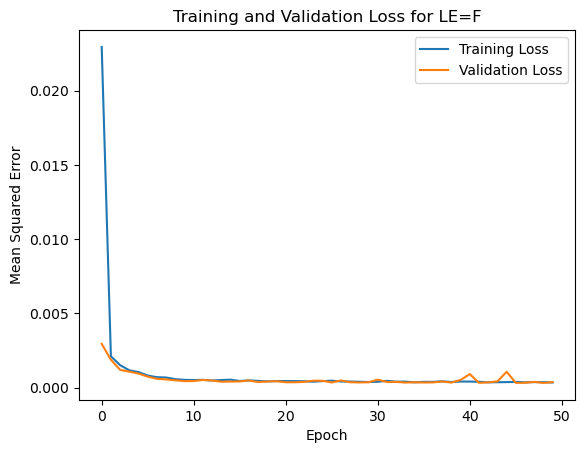

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.9505256853752796
73/73 [==============================] - 3s 13ms/step - loss: 0.0112 - val_loss: 0.0022
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9592651348724908
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/50
9/9 [==============================] - 0s 1ms/step loss: 0.00
val_r2: 0.9665287801319868
73/73 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.979433734662432
73/73 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 8.9804e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 7.2221e-
val_r2: 0.9830910037300922
73/73 [==============================] - 0s 5ms/step - loss: 7.2492e-04 - val_loss: 7.3834e

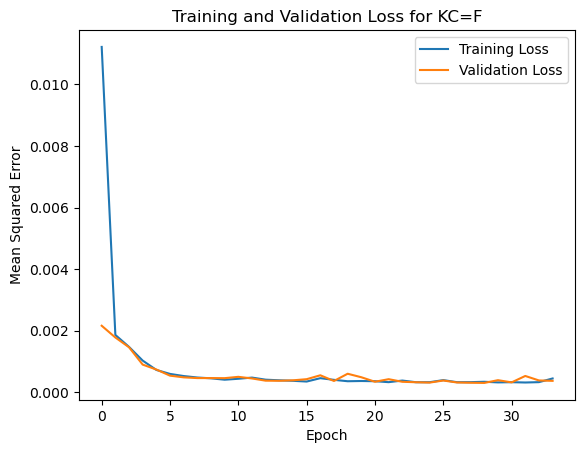

21/21 [==============================] - 0s 2ms/step
  Stock         MSE       MAE        R2
0  CL=F    9.650596  2.127453  0.980558
1  BZ=F    7.245547  1.796832  0.986219
2  NG=F    0.092197  0.203257  0.978542
3  SI=F    0.547395  0.556285  0.928934
4  HG=F    0.005650  0.056324  0.983986
5  ZC=F  191.842130  8.913595  0.989512
6  CT=F    8.845152  1.862136  0.984240
7  LE=F    1.656876  0.953199  0.993138
8  KC=F   26.082053  3.773535  0.988859


In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping, Callback



stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]


# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.1)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [242]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

27.32973277885898
2.249179479133346
0.9793318103281595


In [243]:
predictions.to_csv(f'C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adam_C.csv')


In [45]:
LSTM_adam_Predicted_Prices=pd.read_csv(f'C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adam_C.csv')
LSTM_adam_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LSTM_adam_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    35.856846  39.524230  1.802536  18.104244  2.486006  328.32916   
1    36.552696  40.061570  1.770137  17.971125  2.521168  330.54870   
2    37.138416  40.613197  1.782985  17.859367  2.543756  332.48715   
3    37.658363  40.726776  1.765091  17.937200  2.562221  330.96810   
4    37.921364  40.794758  1.767405  17.812250  2.605002  328.98680   
..         ...        ...       ...        ...       ...        ...   
644  76.102325  81.294075  4.518019  24.033602  3.767413  656.91510   
645  77.360750  81.881860  4.787758  24.003527  3.789433  661.47610   
646  77.568460  83.174610  5.113414  24.312296  3.809193  668.96700   
647  78.295730  83.689995  4.709405  24.220968  3.822745  678.08997   
648  78.149440  82.873270  4.618307  24.187840  3.826286  678.27870   

          CT=F        LE=F        KC=F  
0    59.300550   95.828480   99.035240  
1    59.830960   94.970894   99.005020  
2    60.150960   94.428825   99.479240  
3    59.944603   95.500946   99.772545  
4    60.298690   96.773380   98.428490  
..         ...         ...         ...  
644  85.114914  156.791030  165.072040  
645  85.140854  157.420650  168.098180  
646  84.161840  157.498490  168.333220  
647  84.359360  158.311000  170.705500  
648  83.901230  159.082080  171.461980  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


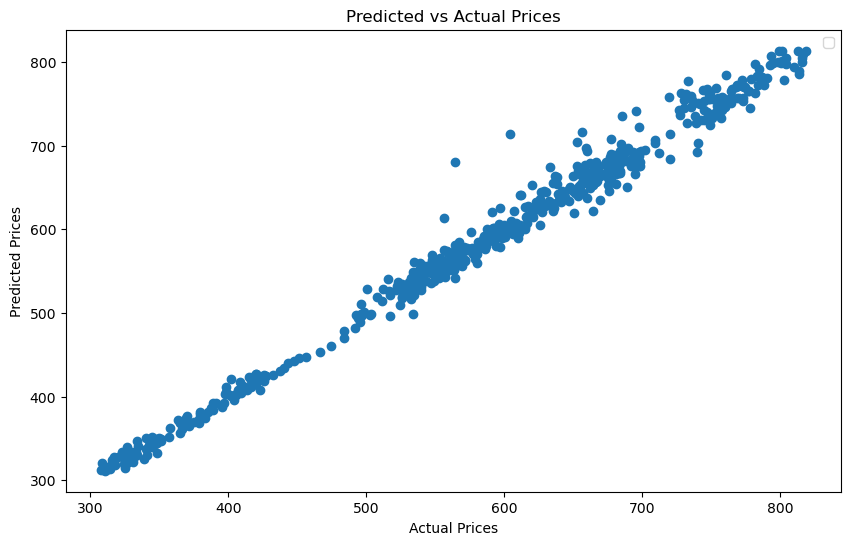

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], LSTM_adam_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization 

In [245]:
assetLabels = LSTM_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LSTM_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)


Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.129 0.126 0.216 0.051 0.073 0.122 0.063 0.081 0.098]

Variance-Covariance Matrix of Returns:
 [[ 1.667  1.1    0.253  0.214  0.317  0.209  0.407  0.031  0.22 ]
 [ 1.1    2.244  0.511  0.195  0.411  0.424  0.484  0.04   0.366]
 [ 0.253  0.511 14.173  0.227  0.307  0.099  0.29   0.039  0.307]
 [ 0.214  0.195  0.227  1.312  0.405  0.14   0.173  0.006  0.094]
 [ 0.317  0.411  0.307  0.405  1.314  0.225  0.339  0.065  0.36 ]
 [ 0.209  0.424  0.099  0.14   0.225  1.971  0.227 -0.009  0.242]
 [ 0.407  0.484  0.29   0.173  0.339  0.227  1.915  0.062  0.328]
 [ 0.031  0.04   0.039  0.006  0.065 -0.009  0.062  0.525  0.046]
 [ 0.22   0.366  0.307  0.094  0.36   0.242  0.328  0.046  2.568]]


### Portfolio Returns with LSTM-Adam Predictions 

In [246]:
portfolioSize = len(LSTM_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.502]] 
Annualized Risk (%):   [[9.247]] 
Annualized Expected Portfolio Return(%):   [26.136]

Optimal weights (%):
 [[18.917]
 [ 3.529]
 [ 4.561]
 [ 3.977]
 [ 3.662]
 [15.935]
 [ 0.   ]
 [41.143]
 [ 8.277]]


## LSTM price prediction with RMSProp Optimizer

Epoch 1/50
9/9 [==============================] - 0s 1ms/step loss: 0.09
val_r2: 0.9528476913927654
73/73 [==============================] - 3s 14ms/step - loss: 0.0802 - val_loss: 0.0011
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9530448098932698
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.0016 
val_r2: 0.9636801228013587
73/73 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 8.4888e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.0015
val_r2: 0.9531066858594817
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9702647069164151
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 6.9498e-04
Epoch 6/50
9/9 [==============================] - 0

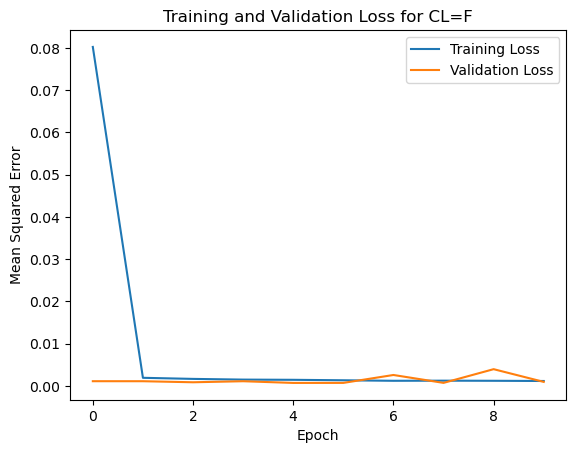

21/21 [==============================] - 0s 1ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.969852796305828
73/73 [==============================] - 4s 14ms/step - loss: 0.0078 - val_loss: 0.0018
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.975765265880612
73/73 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.975310764196176
73/73 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.969121442419392
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9783611403982025
73/73 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/50
9/9 

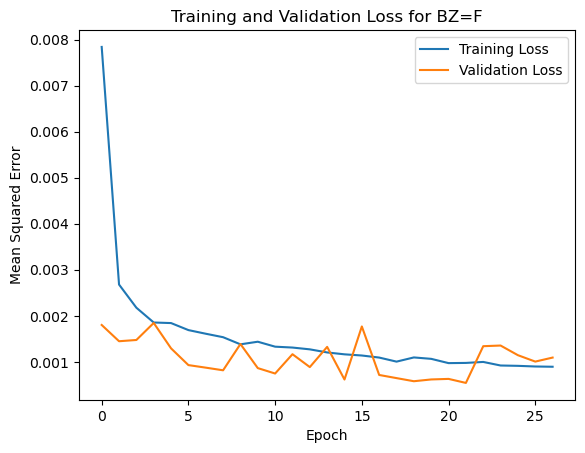

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9201638497113761
73/73 [==============================] - 3s 15ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9461759161967424
73/73 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9480815938140275
73/73 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9607338503230481
73/73 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9627584438263351
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50


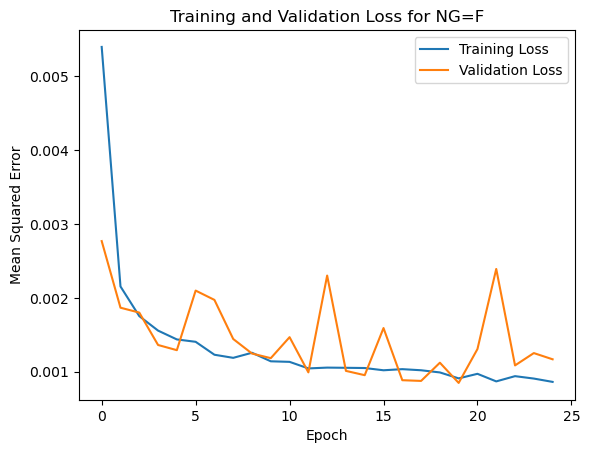

21/21 [==============================] - 0s 1ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9427104335345671
73/73 [==============================] - 3s 14ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9681505786120584
73/73 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.0011 
val_r2: 0.9663768046437706
73/73 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 9.3727e-
val_r2: 0.9828555319003492
73/73 [==============================] - 0s 5ms/step - loss: 9.3489e-04 - val_loss: 6.0236e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 9.5259e-
val_r2: 0.9316254876836294
73/73 [==============================] - 0s 6ms/step - loss: 9.4300e-04 - val_l

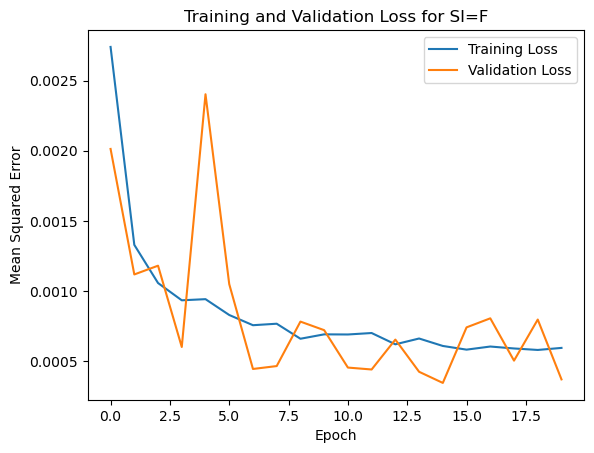

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.9586068661694074
73/73 [==============================] - 3s 13ms/step - loss: 0.0108 - val_loss: 0.0022
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9542855427772768
73/73 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9763430120563262
73/73 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.975774610030689
73/73 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9761022258739643
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
9

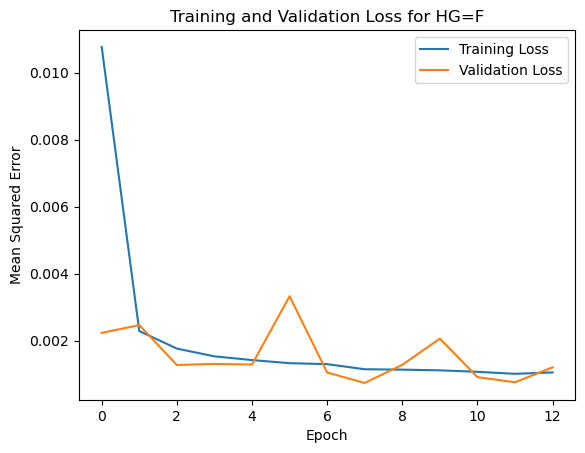

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9541412368179663
73/73 [==============================] - 4s 16ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9644046333894872
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.979785827628305
73/73 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9853612004380311
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9861794554881103
73/73 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 9.4537e-04
Epoch 6/

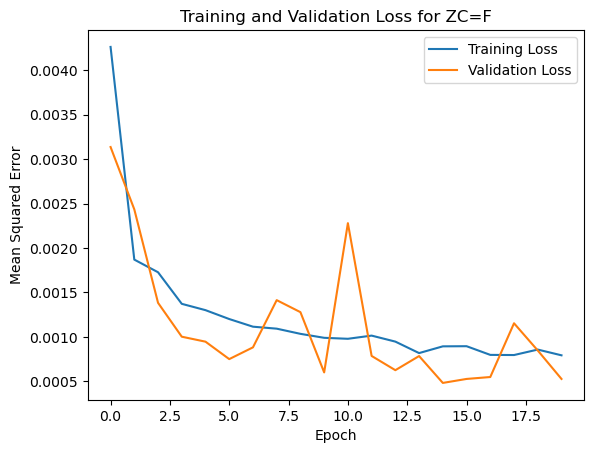

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9297932961088597
73/73 [==============================] - 3s 14ms/step - loss: 0.0059 - val_loss: 0.0014
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.0012
val_r2: 0.9562716230711992
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 8.9592e-04
Epoch 3/50
9/9 [==============================] - 0s 5ms/step loss: 8.2164e-
val_r2: 0.9702908129919808
73/73 [==============================] - 0s 5ms/step - loss: 8.0529e-04 - val_loss: 6.0869e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 6.6899e-
val_r2: 0.9775084389141403
73/73 [==============================] - 0s 5ms/step - loss: 6.6978e-04 - val_loss: 4.6082e-04
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 5.9865e-
val_r2: 0.9803412372666032
73/73 [==============================] - 0s 5ms/step - loss: 6.4

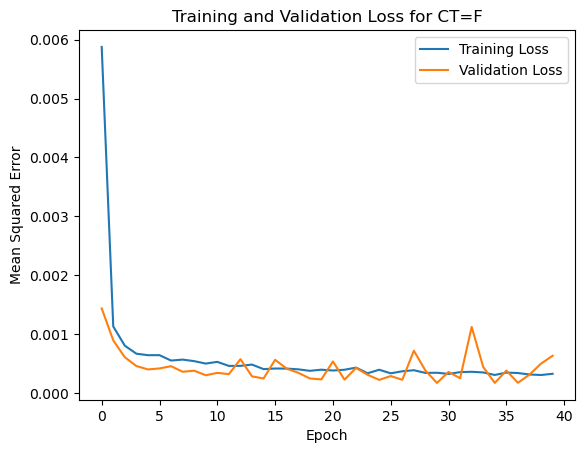

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.9501837223830728
73/73 [==============================] - 3s 13ms/step - loss: 0.0106 - val_loss: 0.0023
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9467964781873963
73/73 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9439915173266845
73/73 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9661553198482263
73/73 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9688683217589096
73/73 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50


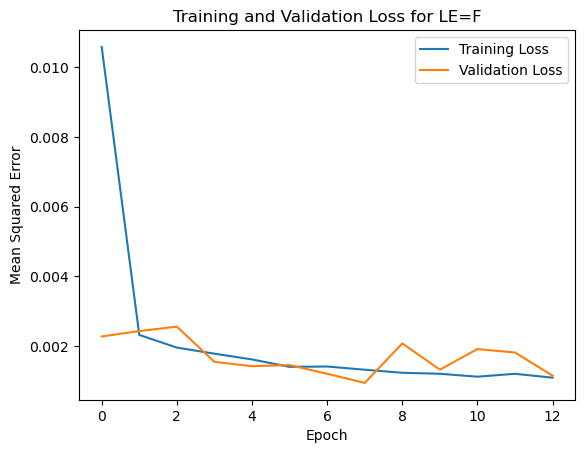

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9567192573476289
73/73 [==============================] - 3s 13ms/step - loss: 0.0065 - val_loss: 0.0017
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.97287665613396
73/73 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.967440673174517
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.0012 
val_r2: 0.9678062977540439
73/73 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9770424033105662
73/73 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.0180e-04
Epoch 6

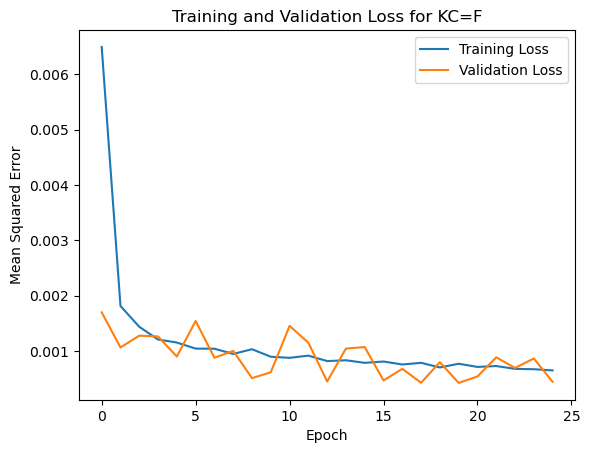

21/21 [==============================] - 0s 2ms/step
  Stock         MSE        MAE        R2
0  CL=F   26.802333   4.075257  0.946003
1  BZ=F   12.325780   2.438531  0.976557
2  NG=F    0.128488   0.236381  0.970095
3  SI=F    0.554358   0.536304  0.928030
4  HG=F    0.011288   0.078971  0.968007
5  ZC=F  319.800200  12.556207  0.982517
6  CT=F    9.518121   1.856998  0.983041
7  LE=F    3.307481   1.428515  0.986301
8  KC=F   33.273529   4.348585  0.985787


In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping, Callback



stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]


# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.1)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [248]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

45.08017548721461
3.061749877270067
0.9695930385515028


In [249]:
predictions.to_csv(f'C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_rmsprop_C.csv')


### Visualizing Actual vs Predicted

In [80]:
LSTM_rmsprop_Predicted_Prices=pd.read_csv(f'C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_rmsprop_C.csv')
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
LSTM_rmsprop_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LSTM_rmsprop_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    30.587778  39.015217  1.787399  18.129740  2.464146  323.72427   
1    31.321463  39.601963  1.810189  17.759540  2.476657  325.14520   
2    32.072240  39.847324  1.794377  17.741127  2.501260  327.27286   
3    32.568977  40.542923  1.804476  17.634960  2.525148  327.09890   
4    33.357560  40.646670  1.807014  17.707272  2.556858  327.25885   
..         ...        ...       ...        ...       ...        ...   
644  76.060880  78.321350  5.213232  23.621620  3.814347  651.03760   
645  76.020330  78.866135  5.012940  23.863293  3.819999  653.31200   
646  76.014630  80.243450  5.046404  23.886350  3.817460  659.52200   
647  75.778725  81.469925  4.869829  23.720043  3.829016  666.20390   
648  75.810190  82.358030  4.567731  23.877274  3.828690  669.48680   

          CT=F        LE=F        KC=F  
0    60.060455   97.519516   98.454330  
1    60.682420   97.197334   98.553116  
2    60.881935   96.832720   98.584465  
3    60.738136   97.161810   98.011246  
4    60.575466   96.554970   97.437645  
..         ...         ...         ...  
644  85.723785  154.675480  169.355180  
645  85.018920  154.840530  170.496520  
646  85.033676  155.064740  170.511660  
647  84.121080  155.408890  171.791950  
648  83.248070  155.766860  171.181120  

[649 rows x 9 columns]

# Portfolio Optimization


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


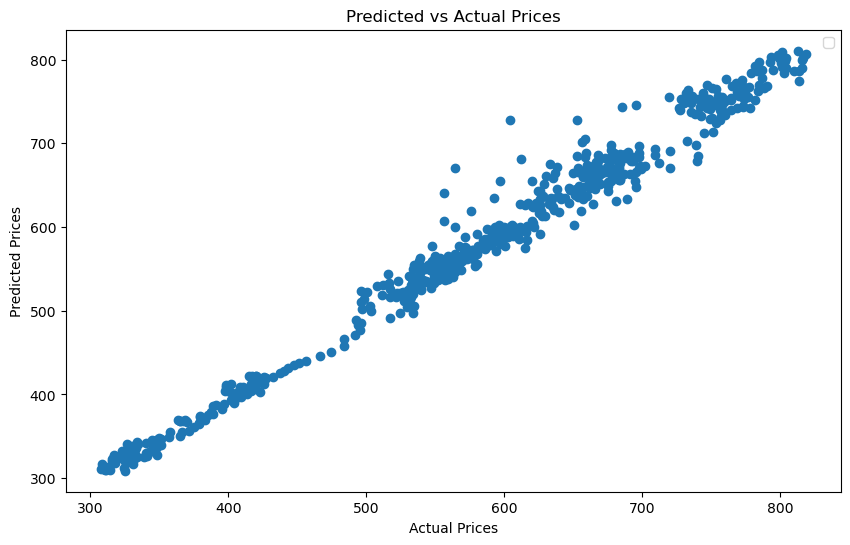

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], LSTM_rmsprop_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

### Portfolio Returns with LSTM-RMSprop Predictions 

In [82]:
assetLabels = LSTM_rmsprop_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LSTM_rmsprop_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)


Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.142 0.12  0.178 0.047 0.07  0.117 0.059 0.073 0.091]

Variance-Covariance Matrix of Returns:
 [[ 0.434  0.286  0.056  0.077  0.109  0.104  0.126 -0.008  0.014]
 [ 0.286  0.878  0.189  0.14   0.166  0.15   0.262 -0.012  0.113]
 [ 0.056  0.189  6.71  -0.001  0.014  0.02   0.542 -0.057  0.154]
 [ 0.077  0.14  -0.001  0.871  0.201  0.04   0.173  0.001  0.121]
 [ 0.109  0.166  0.014  0.201  0.391  0.062  0.157 -0.001  0.113]
 [ 0.104  0.15   0.02   0.04   0.062  0.908  0.226 -0.009  0.028]
 [ 0.126  0.262  0.542  0.173  0.157  0.226  1.707  0.007  0.26 ]
 [-0.008 -0.012 -0.057  0.001 -0.001 -0.009  0.007  0.079 -0.009]
 [ 0.014  0.113  0.154  0.121  0.113  0.028  0.26  -0.009  1.103]]


In [83]:
portfolioSize = len(LSTM_rmsprop_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[5.214]] 
Annualized Risk (%):   [[3.891]] 
Annualized Expected Portfolio Return(%):   [23.289]

Optimal weights (%):
 [[20.07 ]
 [ 1.141]
 [ 2.143]
 [ 0.   ]
 [ 3.11 ]
 [ 5.839]
 [ 0.   ]
 [63.124]
 [ 4.572]]


## LSTM price prediction with Adamax Optimizer 

Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.11
val_r2: 0.93884814367174
73/73 [==============================] - 3s 13ms/step - loss: 0.0894 - val_loss: 0.0012
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9448602623898434
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9484767755612926
73/73 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9499033178242554
73/73 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9527421254152852
73/73 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.4888e-04
Epoch 6/50
9/9 [==============================] - 0s 2ms/step 

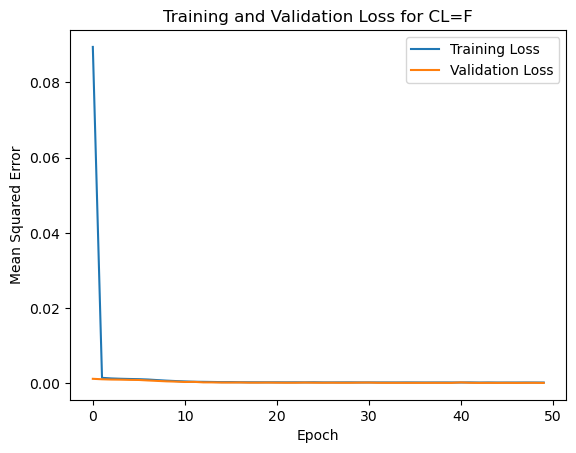

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 3ms/step loss: 0.05
val_r2: 0.9556675886492939
73/73 [==============================] - 3s 13ms/step - loss: 0.0422 - val_loss: 0.0025
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9624299010284558
73/73 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9652867241258007
73/73 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9693220696890488
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9744118645452629
73/73 [==============================] - 25s 342ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/

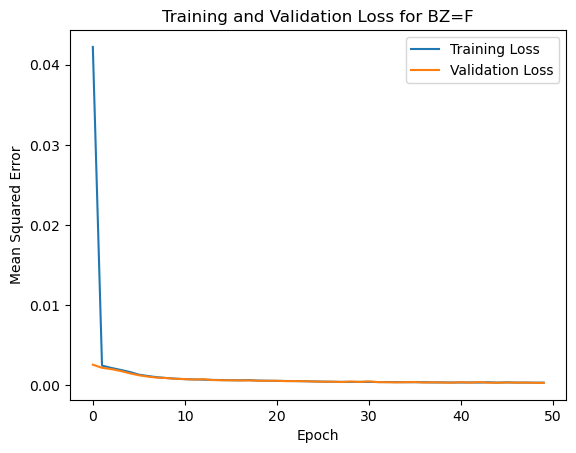

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.8782236837107074
73/73 [==============================] - 3s 14ms/step - loss: 0.0122 - val_loss: 0.0038
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.903772773689465
73/73 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9264934205720933
73/73 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9451125887585905
73/73 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9537058161278806
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50
9

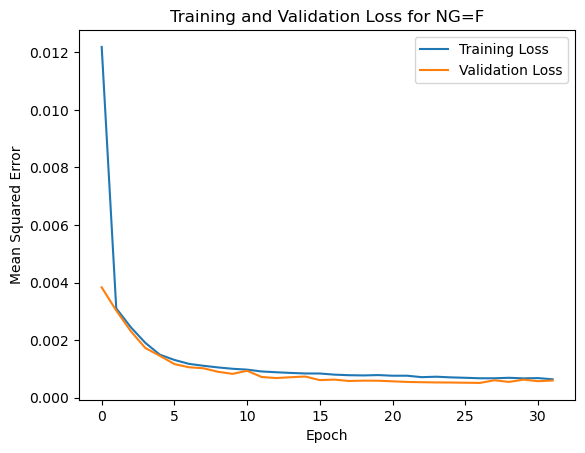

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.9367685872974364
73/73 [==============================] - 3s 13ms/step - loss: 0.0091 - val_loss: 0.0021
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9510751831899579
73/73 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9591248592004408
73/73 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9657539675493818
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9712983472871922
73/73 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 9.6131e-04
Epoch 6

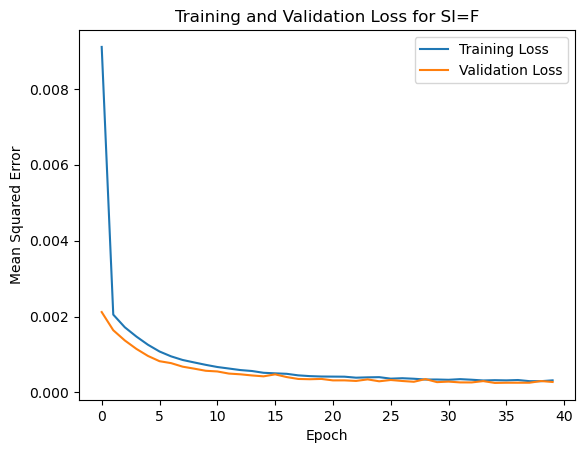

21/21 [==============================] - 0s 3ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.9310127996778185
73/73 [==============================] - 3s 16ms/step - loss: 0.0159 - val_loss: 0.0030
Epoch 2/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9532255647144492
73/73 [==============================] - 1s 11ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/50
9/9 [==============================] - 0s 5ms/step loss: 0.00
val_r2: 0.9653446674934476
73/73 [==============================] - 1s 11ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9735496625378478
73/73 [==============================] - 1s 9ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9783957367959817
73/73 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 9.3104e-04
Epoch

Epoch 41/50
9/9 [==============================] - 0s 2ms/step loss: 3.8892e-
val_r2: 0.9937520579129074
73/73 [==============================] - 0s 7ms/step - loss: 3.8054e-04 - val_loss: 2.6926e-04
Epoch 42/50
9/9 [==============================] - 0s 2ms/step loss: 3.7299e-
val_r2: 0.9935121318526603
73/73 [==============================] - 0s 6ms/step - loss: 3.6814e-04 - val_loss: 2.7960e-04
Epoch 43/50
9/9 [==============================] - 0s 2ms/step loss: 4.1759e-
val_r2: 0.9931352461674202
73/73 [==============================] - 0s 5ms/step - loss: 4.1090e-04 - val_loss: 2.9584e-04
Epoch 44/50
9/9 [==============================] - 0s 6ms/step loss: 3.9048e-
val_r2: 0.9930737001992506
73/73 [==============================] - 0s 5ms/step - loss: 3.8975e-04 - val_loss: 2.9849e-04
Epoch 45/50
9/9 [==============================] - 0s 4ms/step loss: 3.8197e-
val_r2: 0.9924886296892989
73/73 [==============================] - 0s 6ms/step - loss: 3.7691e-04 - val_loss: 3.2370e-04


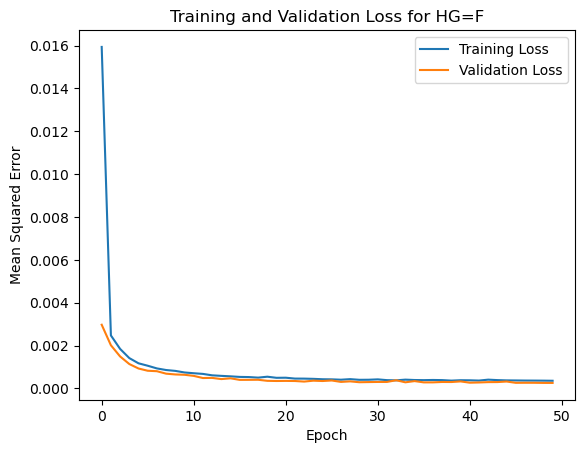

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9602609524993321
73/73 [==============================] - 3s 16ms/step - loss: 0.0091 - val_loss: 0.0029
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9669530464701817
73/73 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9713331815741203
73/73 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9741202603833005
73/73 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9797632769789418
73/73 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/50


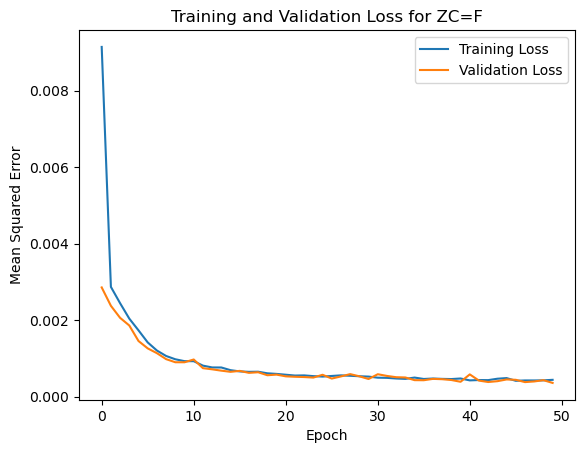

21/21 [==============================] - 0s 1ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.02
val_r2: 0.911502497934519
73/73 [==============================] - 3s 13ms/step - loss: 0.0210 - val_loss: 0.0022
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9582788454884892
73/73 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/50
9/9 [==============================] - 0s 3ms/step loss: 0.00
val_r2: 0.9659352320729376
73/73 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 8.5806e-04
Epoch 4/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9688408540739823
73/73 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 7.8487e-04
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9722470426405174
73/73 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 6.9907e-04


9/9 [==============================] - 0s 2ms/step loss: 2.5751e-
val_r2: 0.989000331948664
73/73 [==============================] - 0s 5ms/step - loss: 2.5127e-04 - val_loss: 2.7707e-04
Epoch 43/50
9/9 [==============================] - 0s 2ms/step loss: 2.3788e-
val_r2: 0.9867550750378258
73/73 [==============================] - 0s 5ms/step - loss: 2.4786e-04 - val_loss: 3.3363e-04
Epoch 44/50
9/9 [==============================] - 0s 2ms/step loss: 2.0655e-
val_r2: 0.9891982927035363
73/73 [==============================] - 0s 5ms/step - loss: 2.3189e-04 - val_loss: 2.7208e-04
Epoch 45/50
9/9 [==============================] - 0s 4ms/step loss: 2.2500e-
val_r2: 0.9893495316448603
73/73 [==============================] - 0s 6ms/step - loss: 2.3157e-04 - val_loss: 2.6827e-04
Epoch 46/50
9/9 [==============================] - 0s 2ms/step loss: 2.3047e-
val_r2: 0.9889333212770596
73/73 [==============================] - 0s 7ms/step - loss: 2.4015e-04 - val_loss: 2.7876e-04
Epoch 47/50
9

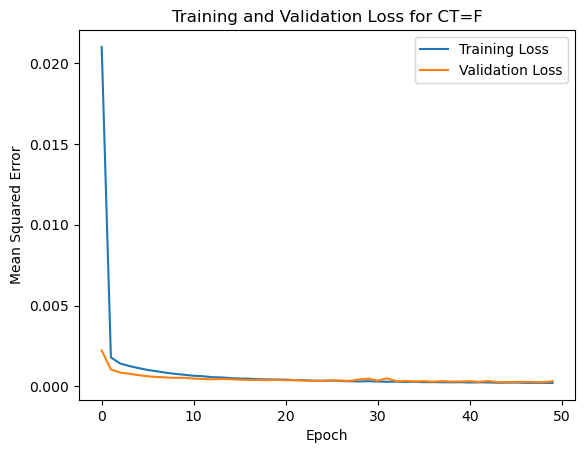

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 4ms/step loss: 0.03
val_r2: 0.9029444603060631
73/73 [==============================] - 3s 14ms/step - loss: 0.0281 - val_loss: 0.0036
Epoch 2/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9226815059654508
73/73 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 3/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9425276876920919
73/73 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 4/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.9543761366487344
73/73 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
9/9 [==============================] - 0s 4ms/step loss: 0.00
val_r2: 0.963544260134616
73/73 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
9

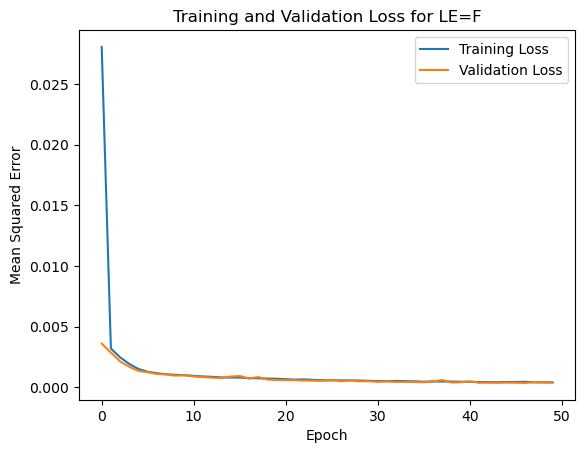

21/21 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 0s 2ms/step loss: 0.01
val_r2: 0.9474332832662204
73/73 [==============================] - 3s 15ms/step - loss: 0.0163 - val_loss: 0.0022
Epoch 2/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9611086091883939
73/73 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9682898301503191
73/73 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/50
9/9 [==============================] - 0s 1ms/step loss: 0.00
val_r2: 0.9721064445301768
73/73 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/50
9/9 [==============================] - 0s 2ms/step loss: 0.00
val_r2: 0.9766669894905975
73/73 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 9.6064e-04
Epoch 6

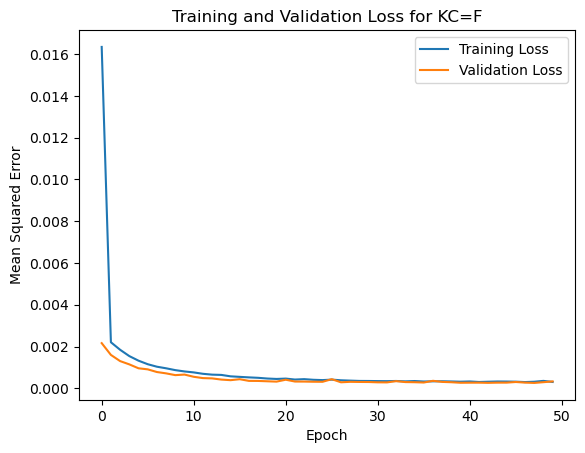

21/21 [==============================] - 0s 2ms/step
  Stock         MSE       MAE        R2
0  CL=F    9.895970  2.128003  0.980063
1  BZ=F    9.041188  2.144133  0.982804
2  NG=F    0.103354  0.215154  0.975945
3  SI=F    0.480807  0.502527  0.937579
4  HG=F    0.005449  0.055310  0.984556
5  ZC=F  213.546235  9.921849  0.988326
6  CT=F   13.194592  2.290139  0.976490
7  LE=F    1.766276  1.007205  0.992685
8  KC=F   28.085765  3.965440  0.988003


In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping, Callback



stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]


# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.1)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
#     model.add(Flatten())
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance 

In [261]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

30.67995948297647
2.4699732314395364
0.9784944283082689


In [262]:
predictions.to_csv(f'C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adamax_C.csv')


In [76]:
LSTM_adamax_Predicted_Prices=pd.read_csv(f'C:/Users/kship/Documents/IB/predictions/results/LSTM_Dense_adamax_C.csv')
LSTM_adamax_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
LSTM_adamax_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    36.039340  38.311623  1.848224  17.862299  2.479328  330.93927   
1    37.097870  39.230880  1.823984  17.596096  2.519434  331.96393   
2    37.689720  39.899680  1.799436  17.753582  2.537596  334.52838   
3    37.780506  39.393288  1.819044  17.813675  2.561935  333.20032   
4    38.813316  39.907825  1.787907  17.713842  2.607479  331.90490   
..         ...        ...       ...        ...       ...        ...   
644  76.798530  79.064240  4.794054  23.600737  3.736967  656.49760   
645  78.554010  80.855230  4.636127  23.657143  3.785665  659.64210   
646  80.446040  82.915940  4.774043  23.807209  3.812989  665.02924   
647  79.189030  82.665960  4.704298  23.566923  3.813796  675.31430   
648  78.238570  82.260410  4.525411  23.920946  3.802612  678.49700   

          CT=F        LE=F        KC=F  
0    59.614280   96.796420   99.726650  
1    60.185310   94.903114  100.096634  
2    60.310340   94.359024  100.391200  
3    60.427586   95.411820   99.574250  
4    60.346504   97.119484   98.584850  
..         ...         ...         ...  
644  85.616850  155.261660  170.801200  
645  85.390650  155.418050  172.782060  
646  85.225020  155.735280  170.474780  
647  84.956260  156.014880  173.286800  
648  83.361080  156.877470  171.305220  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


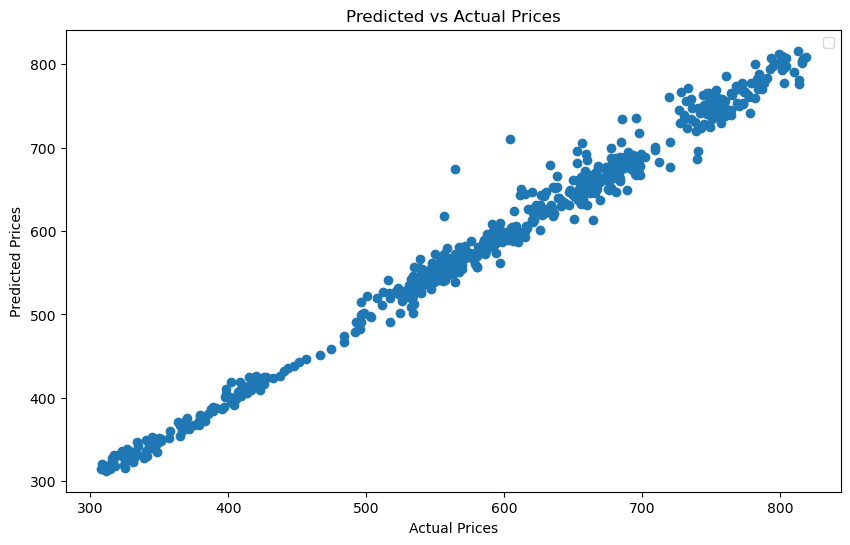

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], LSTM_adamax_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

In [78]:
assetLabels = LSTM_adamax_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = LSTM_adamax_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)


Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.135 0.132 0.195 0.052 0.074 0.121 0.061 0.077 0.097]

Variance-Covariance Matrix of Returns:
 [[ 3.088  1.483  0.464  0.243  0.353  0.359  0.383  0.03   0.174]
 [ 1.483  2.748  0.507  0.269  0.567  0.411  0.428 -0.003  0.405]
 [ 0.464  0.507 11.432 -0.008  0.157 -0.017  0.396  0.005  0.24 ]
 [ 0.243  0.269 -0.008  1.306  0.398  0.1    0.181  0.012  0.098]
 [ 0.353  0.567  0.157  0.398  1.608  0.223  0.362  0.075  0.501]
 [ 0.359  0.411 -0.017  0.1    0.223  1.941  0.376  0.008  0.247]
 [ 0.383  0.428  0.396  0.181  0.362  0.376  1.852  0.054  0.383]
 [ 0.03  -0.003  0.005  0.012  0.075  0.008  0.054  0.493  0.008]
 [ 0.174  0.405  0.24   0.098  0.501  0.247  0.383  0.008  2.692]]


### Portfolio Returns with LSTM-adamax Predictions 

In [79]:
portfolioSize = len(LSTM_adamax_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.4]] 
Annualized Risk (%):   [[8.973]] 
Annualized Expected Portfolio Return(%):   [24.534]

Optimal weights (%):
 [[ 6.938]
 [ 6.626]
 [ 5.276]
 [ 6.068]
 [ 1.639]
 [15.727]
 [ 0.   ]
 [49.74 ]
 [ 7.987]]


# Bidirectional LSTM

## Bidirectional LSTM price predictions with Adam Optimizer

Epoch 1/100
17/17 [==============================] - 0s 1ms/steposs: 0.068
val_r2: 0.9407977835562433
65/65 [==============================] - 2s 10ms/step - loss: 0.0650 - val_loss: 0.0014
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9612947677148441
65/65 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 8.9199e-04
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 9.3806e-
val_r2: 0.9635255195633755
65/65 [==============================] - 0s 4ms/step - loss: 9.0182e-04 - val_loss: 8.4058e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 9.1973e-
val_r2: 0.9660156527638071
65/65 [==============================] - 0s 5ms/step - loss: 8.6103e-04 - val_loss: 7.8319e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 8.6720e-
val_r2: 0.9667677967255076
65/65 [==============================] - 0s 4ms/step - loss: 8.3818e-04 - val_loss: 7.6586e-04
Epoch 6/100
17/17 

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 3.6418e-
val_r2: 0.9918558641365193
65/65 [==============================] - 0s 3ms/step - loss: 2.8257e-04 - val_loss: 1.8769e-04
Epoch 43/100
17/17 [==============================] - 0s 976us/steps: 1.6075e-
val_r2: 0.9928988806622503
65/65 [==============================] - 0s 3ms/step - loss: 2.5506e-04 - val_loss: 1.6365e-04
Epoch 44/100
17/17 [==============================] - 0s 976us/steps: 1.7112e-
val_r2: 0.9916448153619519
65/65 [==============================] - 0s 3ms/step - loss: 2.4660e-04 - val_loss: 1.9255e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 2.4465e-
val_r2: 0.9926977003864615
65/65 [==============================] - 0s 3ms/step - loss: 3.0881e-04 - val_loss: 1.6829e-04
Epoch 46/100
17/17 [==============================] - 0s 976us/steps: 2.9139e-
val_r2: 0.9830558247591669
65/65 [==============================] - 0s 3ms/step - loss: 2.7533e-04 - val_loss: 3.9049

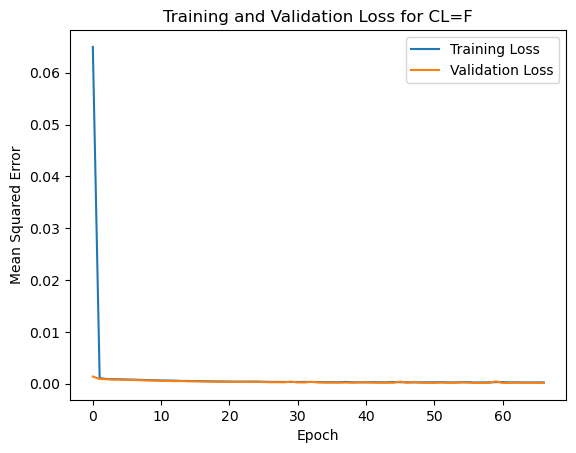

21/21 [==============================] - 0s 776us/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 2ms/steposs: 0.008
val_r2: 0.9709010508929068
65/65 [==============================] - 2s 9ms/step - loss: 0.0089 - val_loss: 0.0019
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9816039786805817
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/100
17/17 [==============================] - 0s 986us/steps: 0.00
val_r2: 0.9875561634162775
65/65 [==============================] - 0s 3ms/step - loss: 9.4355e-04 - val_loss: 7.9797e-04
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 7.3049e-
val_r2: 0.9901982293778978
65/65 [==============================] - 0s 3ms/step - loss: 7.2225e-04 - val_loss: 6.2855e-04
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 6.0986e-
val_r2: 0.9884710804132044
65/65 [==============================] - 0s 4ms/step - loss: 6.0224e-04 - val_loss: 7.3930e-04
Epoch 6/100
17/17 [====================

17/17 [==============================] - 0s 667us/steps: 3.4368e-
val_r2: 0.9961150987952805
65/65 [==============================] - 0s 3ms/step - loss: 2.9809e-04 - val_loss: 2.4912e-04
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 2.4971e-
val_r2: 0.9967723839221064
65/65 [==============================] - 0s 3ms/step - loss: 2.6002e-04 - val_loss: 2.0697e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.4673e-
val_r2: 0.9967568255667257
65/65 [==============================] - 0s 3ms/step - loss: 2.5072e-04 - val_loss: 2.0797e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 2.5525e-
val_r2: 0.9965316361879116
65/65 [==============================] - 0s 3ms/step - loss: 2.4450e-04 - val_loss: 2.2241e-04
Epoch 46/100
17/17 [==============================] - 0s 532us/steps: 2.7347e-
val_r2: 0.9961266310358495
65/65 [==============================] - 0s 3ms/step - loss: 2.5318e-04 - val_loss: 2.4838e-04
Epoch 47

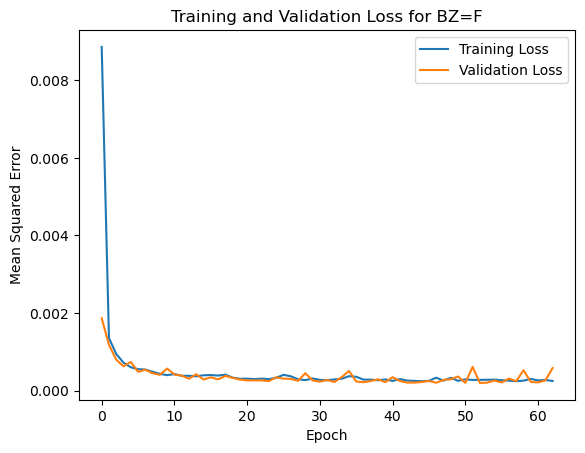

21/21 [==============================] - 0s 1ms/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 2ms/steposs: 0.0178
val_r2: 0.9099554745703802
65/65 [==============================] - 2s 8ms/step - loss: 0.0101 - val_loss: 0.0028
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9297568857874953
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/100
17/17 [==============================] - 0s 993us/steps: 0.00
val_r2: 0.9395792148580984
65/65 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9507690380470932
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9595696754841062
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
17/17 [==============================] - 0s 782us/steps: 0

17/17 [==============================] - 0s 875us/steps: 5.2357e-
val_r2: 0.9845786401800863
65/65 [==============================] - 0s 3ms/step - loss: 5.2438e-04 - val_loss: 4.7532e-04
Epoch 42/100
17/17 [==============================] - 0s 989us/steps: 4.8764e-
val_r2: 0.9843983695940642
65/65 [==============================] - 0s 4ms/step - loss: 4.8887e-04 - val_loss: 4.8087e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 4.7174e-
val_r2: 0.9855631891060765
65/65 [==============================] - 0s 3ms/step - loss: 4.9114e-04 - val_loss: 4.4497e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 5.5913e-
val_r2: 0.9764770666094413
65/65 [==============================] - 0s 4ms/step - loss: 5.5800e-04 - val_loss: 7.2502e-04
Epoch 45/100
17/17 [==============================] - 0s 984us/steps: 5.8327e-
val_r2: 0.9836997074586025
65/65 [==============================] - 0s 4ms/step - loss: 5.5741e-04 - val_loss: 5.0241e-04
Epoch 46

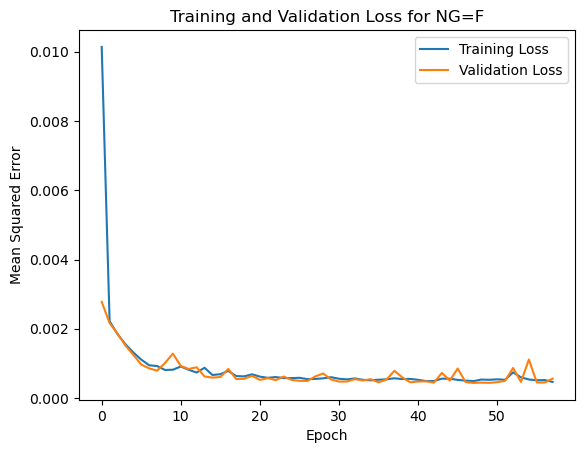

21/21 [==============================] - 0s 2ms/step


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


Epoch 1/100
17/17 [==============================] - 0s 2ms/steposs: 0.01
val_r2: 0.9512130879454295
65/65 [==============================] - 3s 14ms/step - loss: 0.0095 - val_loss: 0.0018
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9491765759535588
65/65 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9695335938367183
65/65 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
17/17 [==============================] - 0s 3ms/steposs: 9.3571e-
val_r2: 0.9717247193851601
65/65 [==============================] - 0s 5ms/step - loss: 8.6480e-04 - val_loss: 0.0010
Epoch 5/100
17/17 [==============================] - 0s 1ms/steposs: 8.5213e-
val_r2: 0.9794249628912087
65/65 [==============================] - 0s 4ms/step - loss: 7.8856e-04 - val_loss: 7.4414e-04
Epoch 6/100
17/17 [====================

17/17 [==============================] - 0s 2ms/steposs: 2.5064e-
val_r2: 0.9899603792380299
65/65 [==============================] - 0s 3ms/step - loss: 2.6180e-04 - val_loss: 3.6310e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 2.2545e-
val_r2: 0.989023335076866
65/65 [==============================] - 0s 3ms/step - loss: 2.2365e-04 - val_loss: 3.9699e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.6185e-
val_r2: 0.9907036908731783
65/65 [==============================] - 0s 3ms/step - loss: 2.3550e-04 - val_loss: 3.3622e-04
Epoch 45/100
17/17 [==============================] - 0s 985us/steps: 2.6224e-
val_r2: 0.9906581696712929
65/65 [==============================] - 0s 3ms/step - loss: 2.4703e-04 - val_loss: 3.3787e-04
Epoch 46/100
17/17 [==============================] - 0s 1ms/steposs: 2.2933e-
val_r2: 0.9912613670526146
65/65 [==============================] - 0s 3ms/step - loss: 2.1764e-04 - val_loss: 3.1605e-04
Epoch 47/

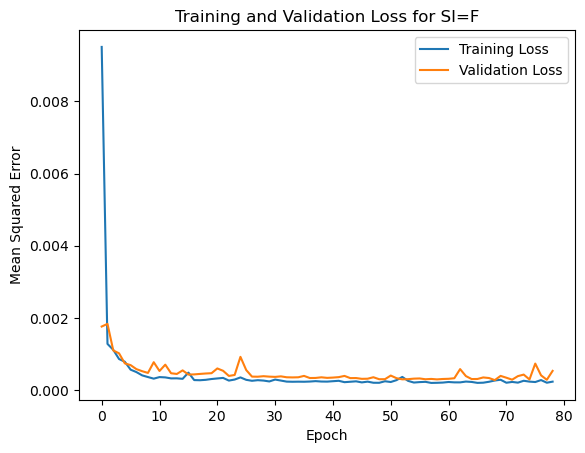

21/21 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 979us/steps: 0.020
val_r2: 0.9621151543666051
65/65 [==============================] - 2s 8ms/step - loss: 0.0181 - val_loss: 0.0017
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9696940090061046
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 3/100
17/17 [==============================] - 0s 969us/steps: 0.00
val_r2: 0.9749711308010074
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.0011  
val_r2: 0.9786529969722
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.6083e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9812682585818059
65/65 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 8.4311e-04
Epoch 6/100
17/17 [==============================] - 0s 1ms/st

Epoch 83/100
17/17 [==============================] - 0s 914us/steps: 2.8281e-
val_r2: 0.9933769574551446
65/65 [==============================] - 0s 3ms/step - loss: 3.1530e-04 - val_loss: 2.9810e-04
Epoch 84/100
17/17 [==============================] - 0s 984us/steps: 2.6512e-
val_r2: 0.9924011156349476
65/65 [==============================] - 0s 3ms/step - loss: 3.0888e-04 - val_loss: 3.4202e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 2.8750e-
val_r2: 0.9931524721401922
65/65 [==============================] - 0s 3ms/step - loss: 2.8873e-04 - val_loss: 3.0821e-04
Epoch 86/100
17/17 [==============================] - 0s 985us/steps: 3.3879e-
val_r2: 0.9932437494828292
65/65 [==============================] - 0s 3ms/step - loss: 3.5181e-04 - val_loss: 3.0410e-04
Epoch 87/100
17/17 [==============================] - 0s 984us/steps: 3.7822e-
val_r2: 0.9915869467068097
65/65 [==============================] - 0s 3ms/step - loss: 3.3225e-04 - val_loss: 3.7867

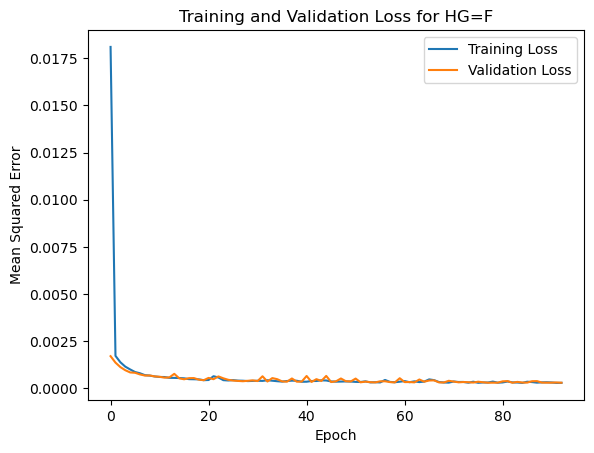

21/21 [==============================] - 0s 1ms/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 1ms/steposs: 0.0175
val_r2: 0.968197328670577
65/65 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0026
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9799518383694892
65/65 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9871380776390184
65/65 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 8.9771e-
val_r2: 0.9893068861430756
65/65 [==============================] - 0s 3ms/step - loss: 8.6772e-04 - val_loss: 8.6447e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 9.4721e-
val_r2: 0.9904911473327369
65/65 [==============================] - 0s 3ms/step - loss: 8.3626e-04 - val_loss: 7.6873e-04
Epoch 6/100
17/17 [============================

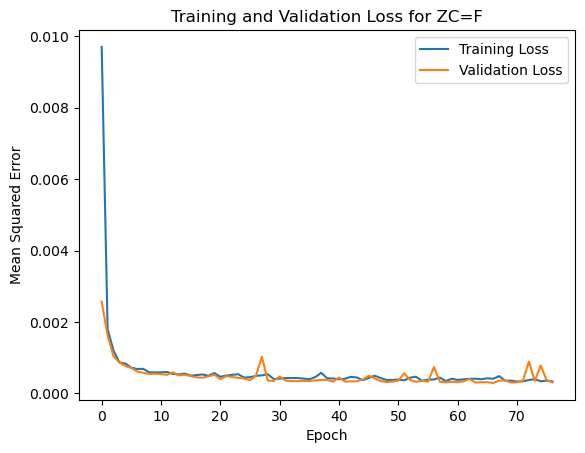

21/21 [==============================] - 0s 925us/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 1ms/steposs: 0.006
val_r2: 0.9486121828759567
65/65 [==============================] - 2s 8ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9701106083239354
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 7.1378e-04
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9776429142077004
65/65 [==============================] - 0s 3ms/step - loss: 9.5093e-04 - val_loss: 5.3391e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 7.0026e-
val_r2: 0.9814149260887981
65/65 [==============================] - 0s 3ms/step - loss: 6.9503e-04 - val_loss: 4.4383e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 6.1253e-
val_r2: 0.9847575259440202
65/65 [==============================] - 0s 3ms/step - loss: 5.7377e-04 - val_loss: 3.6400e-04
Epoch 6/100
17/17 [================

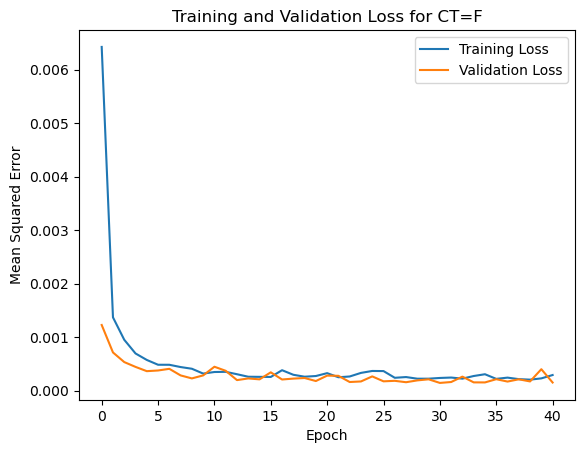

21/21 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 1ms/steposs: 0.0417
val_r2: 0.8982261336829854
65/65 [==============================] - 2s 8ms/step - loss: 0.0238 - val_loss: 0.0036
Epoch 2/100
17/17 [==============================] - 0s 886us/steps: 0.00
val_r2: 0.924539985482774
65/65 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.944468656556802
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/100
17/17 [==============================] - 0s 820us/steps: 0.00
val_r2: 0.9540830557967476
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 5/100
17/17 [==============================] - 0s 983us/steps: 0.00
val_r2: 0.9635812867384733
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
17/17 [==============================] - 0s 985us/steps: 0.0

Epoch 83/100
17/17 [==============================] - 0s 976us/steps: 3.2246e-
val_r2: 0.9891746932030654
65/65 [==============================] - 0s 3ms/step - loss: 3.1327e-04 - val_loss: 3.8362e-04
Epoch 84/100
17/17 [==============================] - 0s 2ms/steposs: 3.3023e-
val_r2: 0.9888314062698202
65/65 [==============================] - 0s 3ms/step - loss: 3.1900e-04 - val_loss: 3.9578e-04
Epoch 85/100
17/17 [==============================] - 0s 2ms/steposs: 2.8544e-
val_r2: 0.990352326910487
65/65 [==============================] - 0s 3ms/step - loss: 3.5020e-04 - val_loss: 3.5630e-04


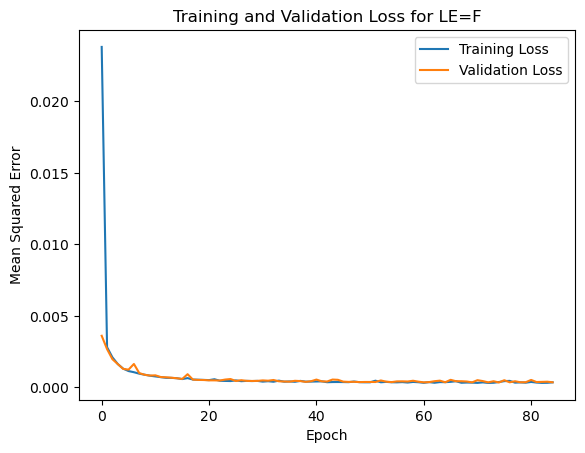

21/21 [==============================] - 0s 2ms/step
Epoch 1/100


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


17/17 [==============================] - 0s 2ms/steposs: 0.0207
val_r2: 0.9423463024069019
65/65 [==============================] - 2s 8ms/step - loss: 0.0111 - val_loss: 0.0025
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9532762540101036
65/65 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9659985296477015
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
17/17 [==============================] - 0s 882us/steps: 0.00
val_r2: 0.9713945422408564
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9754797115081298
65/65 [==============================] - 0s 3ms/step - loss: 9.8660e-04 - val_loss: 0.0011
Epoch 6/100
17/17 [==============================] - 0s 2ms/stepos

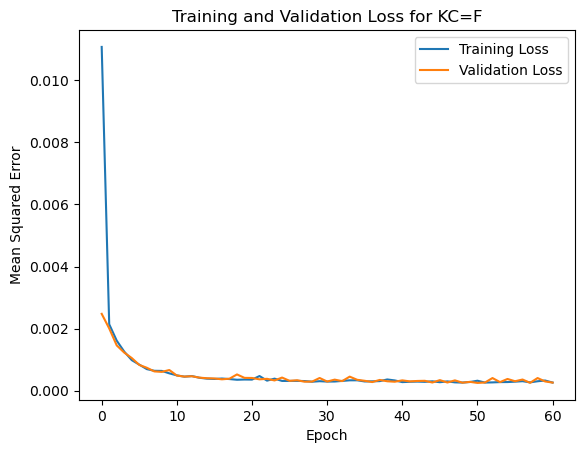

21/21 [==============================] - 0s 781us/step
  Stock         MSE       MAE        R2
0  CL=F    7.598683  1.931469  0.984691
1  BZ=F    6.252674  1.681211  0.988108
2  NG=F    0.115272  0.217289  0.973171
3  SI=F    0.323139  0.402693  0.958048
4  HG=F    0.004534  0.050220  0.987150
5  ZC=F  177.530365  8.677284  0.990295
6  CT=F    8.168263  1.799841  0.985446
7  LE=F    1.485577  0.881206  0.993847
8  KC=F   20.613004  3.343571  0.991195


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\3612344354.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback

stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(28, return_sequences=False, activation='linear'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))


#     # Fully connected layers
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(14, activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

24.676834649051486
2.1094204341889733
0.9835500505985768


In [71]:
predictions.to_csv(f"C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adam_C.csv")

In [72]:
BiLSTM_adam_Predicted_Prices=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adam_C.csv")
BiLSTM_adam_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
BiLSTM_adam_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    35.829174  40.159313  1.800920  18.029710  2.502957  327.77032   
1    37.646374  41.345700  1.804605  17.650885  2.542974  331.45987   
2    37.814290  41.298004  1.791594  17.708557  2.561551  333.76535   
3    38.006516  41.339386  1.790881  17.657003  2.592370  330.70280   
4    38.661556  41.594414  1.785877  17.648584  2.645346  328.13144   
..         ...        ...       ...        ...       ...        ...   
644  76.794210  80.578790  4.920731  23.620270  3.752617  656.21320   
645  77.533780  82.481255  5.010942  23.518036  3.792138  663.10060   
646  77.699356  83.985480  5.317863  23.733671  3.816096  670.79440   
647  78.224670  83.738250  4.836042  23.715296  3.816369  677.94280   
648  77.949165  82.845260  4.694396  24.025303  3.819158  681.17035   

          CT=F        LE=F        KC=F  
0    60.031050   94.993130   98.725690  
1    60.649147   94.142914   99.058250  
2    61.222790   94.172210   98.998470  
3    61.157840   95.469880   98.650080  
4    60.967804   96.658900   98.081024  
..         ...         ...         ...  
644  85.803185  155.613860  168.062500  
645  85.226480  156.426130  170.794770  
646  84.307274  156.022890  168.365920  
647  84.527260  156.671280  171.500000  
648  83.632580  157.489440  171.909240  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


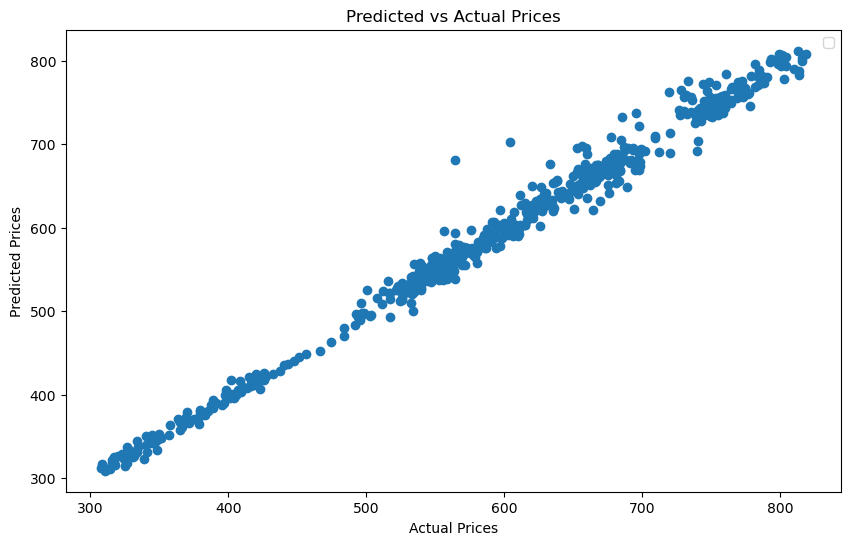

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], BiLSTM_adam_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Optimization  

In [74]:
assetLabels = BiLSTM_adam_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = BiLSTM_adam_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.131 0.126 0.224 0.055 0.074 0.126 0.062 0.081 0.1  ]

Variance-Covariance Matrix of Returns:
 [[ 2.143  1.888  0.489  0.366  0.514  0.432  0.556  0.04   0.338]
 [ 1.888  2.847  0.496  0.464  0.708  0.584  0.547  0.065  0.533]
 [ 0.489  0.496 15.43   0.318  0.361  0.385  0.278  0.022  0.42 ]
 [ 0.366  0.464  0.318  2.193  0.657  0.273  0.266  0.018  0.189]
 [ 0.514  0.708  0.361  0.657  1.743  0.331  0.372  0.089  0.447]
 [ 0.432  0.584  0.385  0.273  0.331  2.581  0.265 -0.032  0.356]
 [ 0.556  0.547  0.278  0.266  0.372  0.265  2.179  0.054  0.453]
 [ 0.04   0.065  0.022  0.018  0.089 -0.032  0.054  0.615  0.085]
 [ 0.338  0.533  0.42   0.189  0.447  0.356  0.453  0.085  2.794]]


### Portfolio Returns with Bidirectional LSTM-Adam Predictions 

In [75]:
portfolioSize = len(BiLSTM_adam_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.254]] 
Annualized Risk (%):   [[10.31]] 
Annualized Expected Portfolio Return(%):   [26.236]

Optimal weights (%):
 [[18.656]
 [ 0.   ]
 [ 4.813]
 [ 2.227]
 [ 1.901]
 [14.924]
 [ 0.55 ]
 [49.24 ]
 [ 7.689]]


##  Bidirectional LSTM price predictions with RMSProp Optimizer  

Epoch 1/100
17/17 [==============================] - 0s 3ms/steposs: 0.02
val_r2: 0.4720661483994708
65/65 [==============================] - 5s 20ms/step - loss: 0.0223 - val_loss: 0.0115
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9446835611739157
65/65 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0012
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9582147679284388
65/65 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 9.1083e-04
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.8615634084975333
65/65 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 5/100
17/17 [==============================] - 0s 3ms/steposs: 0.00
val_r2: 0.9714731455157181
65/65 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 6.2183e-04
Epoch 6/100
17/17 [==============================] 

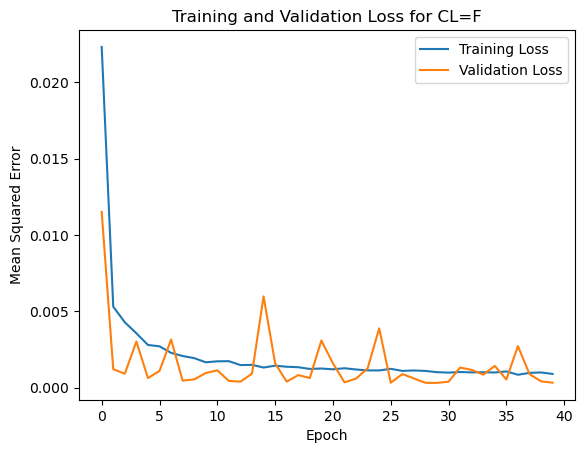

21/21 [==============================] - 0s 2ms/step
Epoch 1/100
17/17 [==============================] - 1s 2ms/steposs: 0.01
val_r2: 0.90521800771965
65/65 [==============================] - 5s 24ms/step - loss: 0.0126 - val_loss: 0.0057
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9428475261312657
65/65 [==============================] - 1s 8ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 3/100
17/17 [==============================] - 0s 3ms/steposs: 0.00
val_r2: 0.9364453053487736
65/65 [==============================] - 1s 8ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 4/100
17/17 [==============================] - 0s 3ms/steposs: 0.
val_r2: 0.9819499766336528
65/65 [==============================] - 1s 10ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9827831768376347
65/65 [==============================] - 1s 8ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 6/1

Epoch 42/100
17/17 [==============================] - 0s 2ms/steposs: 8.2997e-
val_r2: 0.9852382143639806
65/65 [==============================] - 0s 6ms/step - loss: 8.4281e-04 - val_loss: 8.8537e-04
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 8.1266e-
val_r2: 0.9823399285987886
65/65 [==============================] - 0s 6ms/step - loss: 8.4273e-04 - val_loss: 0.0011
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 8.1271e-
val_r2: 0.994208187826638
65/65 [==============================] - 0s 6ms/step - loss: 8.4063e-04 - val_loss: 3.4738e-04
Epoch 45/100
17/17 [==============================] - 0s 3ms/steposs: 8.3887e-
val_r2: 0.9924488584630284
65/65 [==============================] - 0s 7ms/step - loss: 8.4157e-04 - val_loss: 4.5290e-04
Epoch 46/100
17/17 [==============================] - 0s 2ms/steposs: 8.2541e-
val_r2: 0.9887415456430759
65/65 [==============================] - 0s 7ms/step - loss: 8.2314e-04 - val_loss: 6.7525e-04


Epoch 83/100
17/17 [==============================] - 0s 2ms/steposs: 5.9726e-
val_r2: 0.9901808854406988
65/65 [==============================] - 1s 8ms/step - loss: 6.2378e-04 - val_loss: 5.8892e-04
Epoch 84/100
17/17 [==============================] - 0s 2ms/steposs: 6.2571e-
val_r2: 0.9908726751929601
65/65 [==============================] - 1s 9ms/step - loss: 6.2480e-04 - val_loss: 5.4743e-04
Epoch 85/100
17/17 [==============================] - 0s 2ms/steposs: 6.2353e-
val_r2: 0.9937222210074909
65/65 [==============================] - 1s 15ms/step - loss: 6.4282e-04 - val_loss: 3.7652e-04
Epoch 86/100
17/17 [==============================] - 0s 2ms/steposs: 6.3510e-
val_r2: 0.9953648712393881
65/65 [==============================] - 1s 17ms/step - loss: 6.2587e-04 - val_loss: 2.7800e-04
Epoch 87/100
17/17 [==============================] - 0s 3ms/steposs: 5.6820e-
val_r2: 0.9921341891665183
65/65 [==============================] - 1s 13ms/step - loss: 6.3374e-04 - val_loss: 4.7

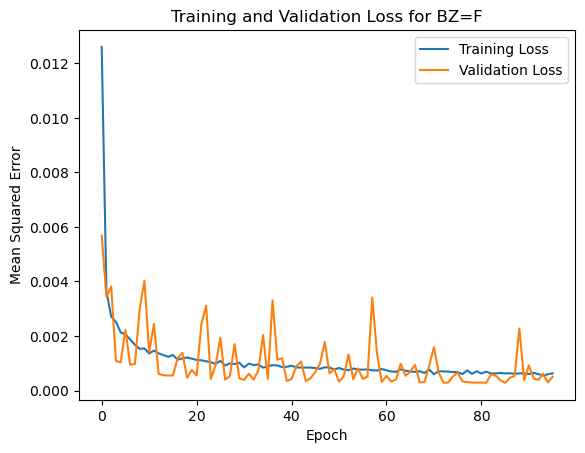

21/21 [==============================] - 0s 2ms/step
Epoch 1/100
17/17 [==============================] - 1s 5ms/steposs: 0.0
val_r2: 0.934184111214664
65/65 [==============================] - 8s 37ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9584572157998476
65/65 [==============================] - 1s 9ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9600031690242309
65/65 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9373446601856537
65/65 [==============================] - 1s 13ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9389479788389961
65/65 [==============================] - 1s 8ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 

Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 9.2487e-
val_r2: 0.9775547717747611
65/65 [==============================] - 1s 8ms/step - loss: 9.4000e-04 - val_loss: 7.1938e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 8.9442e-
val_r2: 0.9629129853543882
65/65 [==============================] - 1s 8ms/step - loss: 8.6175e-04 - val_loss: 0.0012
Epoch 45/100
17/17 [==============================] - 0s 2ms/steposs: 7.9210e-
val_r2: 0.9670983568838766
65/65 [==============================] - 1s 9ms/step - loss: 8.8155e-04 - val_loss: 0.0011
Epoch 46/100
17/17 [==============================] - 0s 4ms/steposs: 8.9545
val_r2: 0.9779325671578705
65/65 [==============================] - 1s 8ms/step - loss: 8.7328e-04 - val_loss: 7.0727e-04
Epoch 47/100
17/17 [==============================] - 0s 3ms/steposs: 8.1925e-
val_r2: 0.9801510626467381
65/65 [==============================] - 1s 13ms/step - loss: 7.9375e-04 - val_loss: 6.3617e-04
Epoc

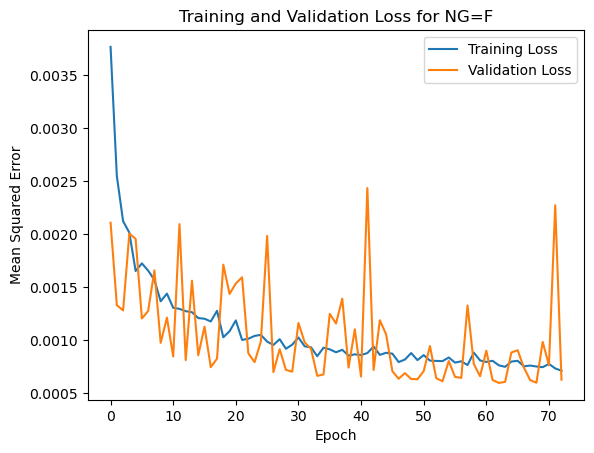

21/21 [==============================] - 0s 2ms/step
Epoch 1/100
17/17 [==============================] - 1s 3ms/steposs: 0.
val_r2: 0.9634704171675551
65/65 [==============================] - 6s 26ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.8774862270226021
65/65 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.0014 
val_r2: 0.9162733055162364
65/65 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 4/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9746306114578509
65/65 [==============================] - 1s 8ms/step - loss: 0.0012 - val_loss: 8.5293e-04
Epoch 5/100
17/17 [==============================] - 0s 3ms/steposs: 0.0011 
val_r2: 0.9237660910276767
65/65 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.002

Epoch 42/100
17/17 [==============================] - 0s 2ms/steposs: 5.0961e-
val_r2: 0.9534454918796077
65/65 [==============================] - 1s 8ms/step - loss: 5.2457e-04 - val_loss: 0.0016
Epoch 43/100
17/17 [==============================] - 0s 2ms/steposs: 5.1097e-
val_r2: 0.9715951229831251
65/65 [==============================] - 1s 8ms/step - loss: 5.0672e-04 - val_loss: 9.5499e-04
Epoch 44/100
17/17 [==============================] - 0s 2ms/steposs: 5.1568e-
val_r2: 0.9853305379003233
65/65 [==============================] - 1s 8ms/step - loss: 5.1385e-04 - val_loss: 4.9320e-04
Epoch 45/100
17/17 [==============================] - 0s 3ms/steposs: 5.3595e-
val_r2: 0.9944594812370973
65/65 [==============================] - 0s 7ms/step - loss: 5.2067e-04 - val_loss: 1.8628e-04
Epoch 46/100
17/17 [==============================] - 0s 8ms/steposs: 4.8813
val_r2: 0.9947898548757084
65/65 [==============================] - 1s 9ms/step - loss: 5.5981e-04 - val_loss: 1.7517e-04
E

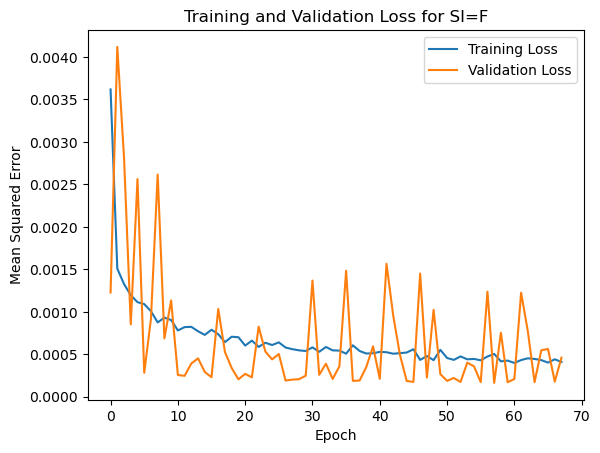

21/21 [==============================] - 0s 2ms/step
Epoch 1/100
17/17 [==============================] - 1s 2ms/steposs: 0.00
val_r2: 0.9610288111482401
65/65 [==============================] - 6s 24ms/step - loss: 0.0083 - val_loss: 0.0018
Epoch 2/100
17/17 [==============================] - 0s 3ms/steposs: 0.00
val_r2: 0.9717474445303977
65/65 [==============================] - 1s 8ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9556087566729831
65/65 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/100
17/17 [==============================] - 0s 984us/steps: 0.00
val_r2: 0.9483780753887783
65/65 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9630247248089479
65/65 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 

Epoch 43/100
17/17 [==============================] - 0s 780us/steps: 7.6199e-
val_r2: 0.9902873407435994
65/65 [==============================] - 0s 2ms/step - loss: 7.4736e-04 - val_loss: 4.4458e-04
Epoch 44/100
17/17 [==============================] - 0s 643us/steps: 7.4753e-
val_r2: 0.9906479557785857
65/65 [==============================] - 0s 2ms/step - loss: 7.4539e-04 - val_loss: 4.2807e-04
Epoch 45/100
17/17 [==============================] - 0s 743us/steps: 6.8029e-
val_r2: 0.9891757763402188
65/65 [==============================] - 0s 3ms/step - loss: 6.8917e-04 - val_loss: 4.9546e-04
Epoch 46/100
17/17 [==============================] - 0s 715us/steps: 7.3258e-
val_r2: 0.9825204413865469
65/65 [==============================] - 0s 2ms/step - loss: 6.6770e-04 - val_loss: 8.0010e-04
Epoch 47/100
17/17 [==============================] - 0s 469us/steps: 6.7915e-
val_r2: 0.9905594109143133
65/65 [==============================] - 0s 2ms/step - loss: 7.1303e-04 - val_loss: 4.3213

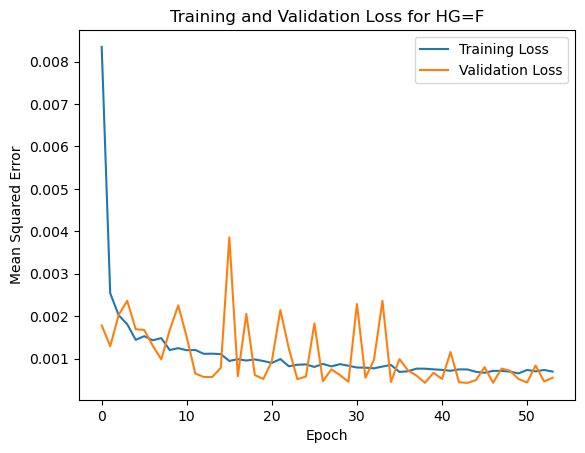

21/21 [==============================] - 0s 836us/step
Epoch 1/100
17/17 [==============================] - 0s 170us/steps: 0.0085
val_r2: 0.9532643087869079
65/65 [==============================] - 2s 9ms/step - loss: 0.0057 - val_loss: 0.0032
Epoch 2/100
17/17 [==============================] - 0s 788us/steps: 0.00
val_r2: 0.978637513613836
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 3/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9825166506479681
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 4/100
17/17 [==============================] - 0s 976us/steps: 0.00
val_r2: 0.9512513059331871
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 5/100
17/17 [==============================] - 0s 562us/steps: 0.00
val_r2: 0.9859589412008718
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 9.7516e-04


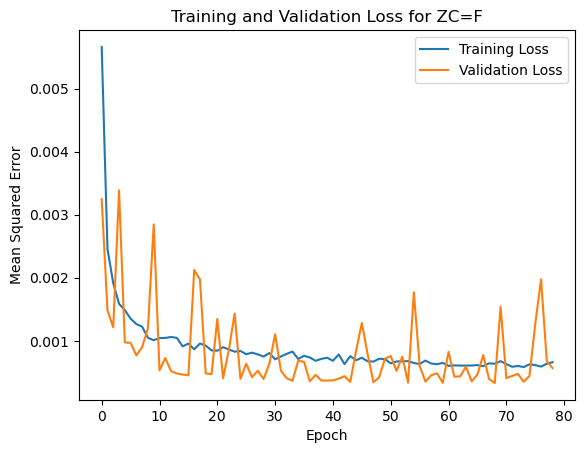

21/21 [==============================] - 0s 580us/step
Epoch 1/100
17/17 [==============================] - 0s 974us/steps: 0.0066
val_r2: 0.9120175476506152
65/65 [==============================] - 2s 9ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 2/100
17/17 [==============================] - 0s 977us/steps: 0.00
val_r2: 0.9536185787603799
65/65 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
17/17 [==============================] - 0s 0s/steploss: 9.6559e-
val_r2: 0.9700802313072944
65/65 [==============================] - 0s 3ms/step - loss: 9.0531e-04 - val_loss: 6.9011e-04
Epoch 4/100
17/17 [==============================] - 0s 978us/steps: 8.3390e-
val_r2: 0.9813677927536812
65/65 [==============================] - 0s 3ms/step - loss: 8.5159e-04 - val_loss: 4.2976e-04
Epoch 5/100
17/17 [==============================] - 0s 0s/steploss: 6.6903e-
val_r2: 0.9818387128925333
65/65 [==============================] - 0s 3ms/step - loss: 6

Epoch 42/100
17/17 [==============================] - 0s 977us/steps: 3.6094e-
val_r2: 0.9911124717773647
65/65 [==============================] - 0s 3ms/step - loss: 3.2025e-04 - val_loss: 2.0499e-04
Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 3.2954e-
val_r2: 0.9865927457300211
65/65 [==============================] - 0s 2ms/step - loss: 3.3190e-04 - val_loss: 3.0924e-04
Epoch 44/100
17/17 [==============================] - 0s 249us/steps: 3.1325e-
val_r2: 0.9914713109253857
65/65 [==============================] - 0s 2ms/step - loss: 3.1668e-04 - val_loss: 1.9672e-04
Epoch 45/100
17/17 [==============================] - 0s 827us/steps: 3.0019e-
val_r2: 0.9918878207459654
65/65 [==============================] - 0s 2ms/step - loss: 3.2257e-04 - val_loss: 1.8711e-04
Epoch 46/100
17/17 [==============================] - 0s 977us/steps: 3.3665e-
val_r2: 0.9896639427720202
65/65 [==============================] - 0s 2ms/step - loss: 3.2476e-04 - val_loss: 2.3840

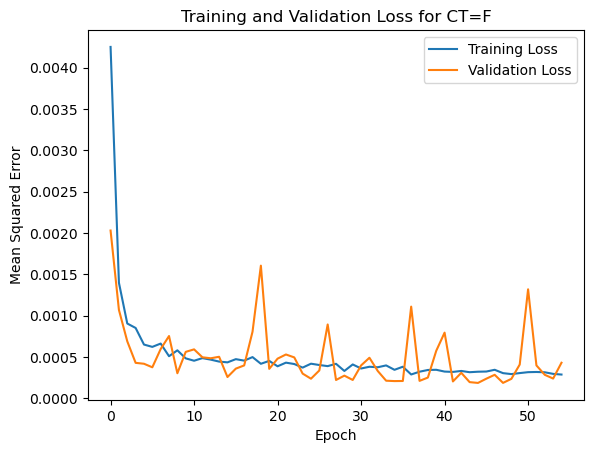

21/21 [==============================] - 0s 600us/step
Epoch 1/100
17/17 [==============================] - 0s 817us/steps: 0.0305
val_r2: 0.836420638531485
65/65 [==============================] - 2s 9ms/step - loss: 0.0182 - val_loss: 0.0071
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9480369726157561
65/65 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 3/100
17/17 [==============================] - 0s 0s/steploss: 0.00
val_r2: 0.9483743285669624
65/65 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 4/100
17/17 [==============================] - 0s 563us/steps: 0.00
val_r2: 0.9497436320345335
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 0s 319us/steps: 0.00
val_r2: 0.9647754824927458
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0015
Epoc

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 8.1012e-
val_r2: 0.9850775261548963
65/65 [==============================] - 0s 2ms/step - loss: 8.5153e-04 - val_loss: 6.4935e-04
Epoch 43/100
17/17 [==============================] - 0s 373us/steps: 7.9584e-
val_r2: 0.9756538391286965
65/65 [==============================] - 0s 2ms/step - loss: 7.7039e-04 - val_loss: 0.0011
Epoch 44/100
17/17 [==============================] - 0s 270us/steps: 8.9244e-
val_r2: 0.9359909857739441
65/65 [==============================] - 0s 3ms/step - loss: 8.4053e-04 - val_loss: 0.0028
Epoch 45/100
17/17 [==============================] - 0s 859us/steps: 9.1716e-
val_r2: 0.9812728977086793
65/65 [==============================] - 0s 2ms/step - loss: 8.9522e-04 - val_loss: 8.1490e-04
Epoch 46/100
17/17 [==============================] - 0s 556us/steps: 8.2954e-
val_r2: 0.9559272407121828
65/65 [==============================] - 0s 2ms/step - loss: 8.4530e-04 - val_loss: 0.0019
Epoch 4

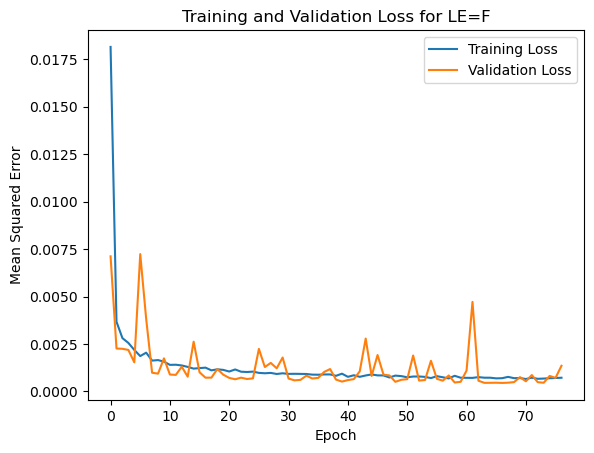

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 990us/steps: 0.0063
val_r2: 0.9504692685220465
65/65 [==============================] - 2s 9ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9721877935594354
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/100
17/17 [==============================] - 0s 288us/steps: 0.0015  
val_r2: 0.932782386317516
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0030
Epoch 4/100
17/17 [==============================] - 0s 706us/steps: 0.00
val_r2: 0.9833523336336852
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 7.4744e-04
Epoch 5/100
17/17 [==============================] - 0s 725us/steps: 0.00
val_r2: 0.9607999287770693
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.001

17/17 [==============================] - 0s 976us/steps: 5.7322e-
val_r2: 0.9928634584476435
65/65 [==============================] - 0s 2ms/step - loss: 5.7323e-04 - val_loss: 3.2041e-04
Epoch 43/100
17/17 [==============================] - 0s 507us/steps: 5.3582e-
val_r2: 0.9925405430006627
65/65 [==============================] - 0s 2ms/step - loss: 5.3359e-04 - val_loss: 3.3491e-04
Epoch 44/100
17/17 [==============================] - 0s 824us/steps: 5.6733e-
val_r2: 0.9899584666728226
65/65 [==============================] - 0s 3ms/step - loss: 5.6243e-04 - val_loss: 4.5084e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 5.4191e-
val_r2: 0.98869471826409
65/65 [==============================] - 0s 2ms/step - loss: 5.1281e-04 - val_loss: 5.0758e-04
Epoch 46/100
17/17 [==============================] - 0s 704us/steps: 5.4678e-
val_r2: 0.9930008867747271
65/65 [==============================] - 0s 2ms/step - loss: 5.3829e-04 - val_loss: 3.1789e-04


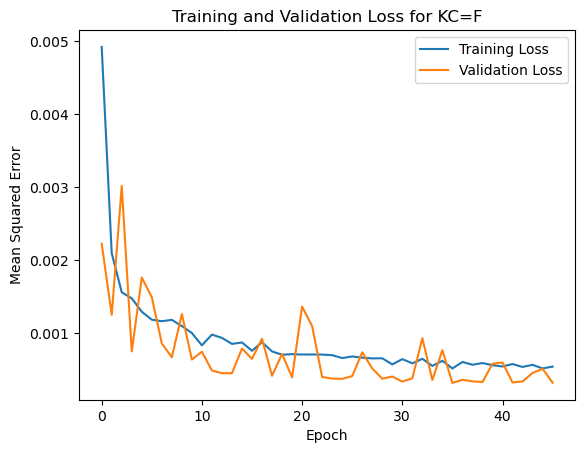

21/21 [==============================] - 0s 480us/step
  Stock         MSE       MAE        R2
0  CL=F   13.894320  2.641140  0.972008
1  BZ=F    7.721849  1.906271  0.985313
2  NG=F    0.085357  0.194174  0.980134
3  SI=F    0.358801  0.428643  0.953418
4  HG=F    0.006163  0.058587  0.982533
5  ZC=F  217.015430  9.950289  0.988136
6  CT=F    9.796227  1.905350  0.982545
7  LE=F    1.744301  1.004423  0.992776
8  KC=F   26.670308  3.854308  0.988608


In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback

stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(28, return_sequences=False, activation='linear'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))


#     # Fully connected layers
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(14, activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='rmsprop', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [283]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

30.810306163808523
2.4381318780743615
0.9806077839472062


In [284]:
predictions.to_csv(f"C:/Users/kship/Documents/IB/predictions/results/Bidirectional_rmsprop_C.csv")

In [64]:
BiLSTM_rmsprop_Predicted_Prices=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/results/Bidirectional_rmsprop_C.csv")
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
BiLSTM_rmsprop_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
BiLSTM_rmsprop_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    36.717762  40.304226  1.786833  18.177649  2.486501  326.25296   
1    37.703900  40.985176  1.768121  17.956610  2.505773  329.28662   
2    38.417225  41.701977  1.766703  17.944900  2.527492  330.78436   
3    38.386177  42.071716  1.745661  17.868652  2.564085  328.41394   
4    38.933400  42.151380  1.763834  17.837930  2.610807  327.69363   
..         ...        ...       ...        ...       ...        ...   
644  74.893814  80.011870  4.977908  23.707296  3.774786  656.60754   
645  74.754260  81.286520  4.935516  23.736910  3.791416  660.13240   
646  75.479270  82.568400  5.006949  23.788559  3.786862  665.52606   
647  76.426040  82.836464  4.751120  23.679226  3.780458  673.59784   
648  76.933320  82.062096  4.747343  23.874910  3.798807  676.13280   

          CT=F        LE=F        KC=F  
0    59.497360   96.483400   98.197810  
1    60.387554   95.371475   98.542366  
2    60.138650   94.779100   98.555340  
3    59.897910   95.019390   97.772575  
4    60.093456   96.039440   97.197740  
..         ...         ...         ...  
644  86.281630  155.121830  168.458420  
645  85.985140  155.628980  169.493680  
646  84.958050  155.753160  168.725750  
647  84.236565  155.978740  170.742920  
648  83.539160  156.798720  170.706340  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


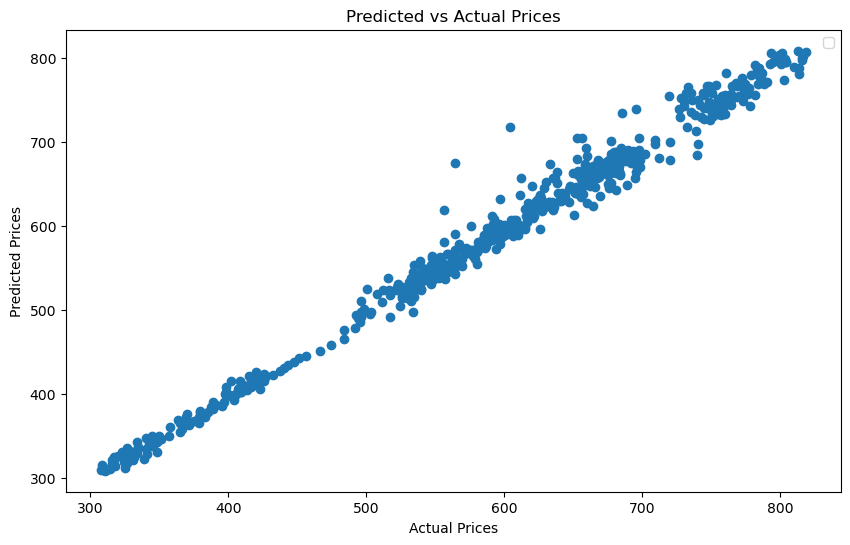

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], BiLSTM_rmsprop_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization

In [66]:
assetLabels = BiLSTM_rmsprop_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = BiLSTM_rmsprop_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.118 0.117 0.201 0.049 0.07  0.12  0.061 0.076 0.093]

Variance-Covariance Matrix of Returns:
 [[ 0.747  0.469  0.052  0.072  0.158  0.115  0.178 -0.012  0.102]
 [ 0.469  1.484  0.267  0.221  0.395  0.272  0.349 -0.002  0.207]
 [ 0.052  0.267 10.149  0.099  0.155  0.074  0.386  0.015  0.223]
 [ 0.072  0.221  0.099  1.303  0.358  0.157  0.184  0.016  0.136]
 [ 0.158  0.395  0.155  0.358  0.919  0.172  0.311  0.025  0.234]
 [ 0.115  0.272  0.074  0.157  0.172  1.58   0.228  0.002  0.185]
 [ 0.178  0.349  0.386  0.184  0.311  0.228  1.681  0.024  0.254]
 [-0.012 -0.002  0.015  0.016  0.025  0.002  0.024  0.257  0.012]
 [ 0.102  0.207  0.223  0.136  0.234  0.185  0.254  0.012  1.495]]


## Portfolio Returns with Bidirectional LSTM-RMSprop Predictions 

In [67]:
portfolioSize = len(BiLSTM_rmsprop_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[3.253]] 
Annualized Risk (%):   [[6.526]] 
Annualized Expected Portfolio Return(%):   [24.228]

Optimal weights (%):
 [[24.933]
 [ 0.996]
 [ 3.237]
 [ 1.   ]
 [ 1.839]
 [10.241]
 [ 0.   ]
 [49.907]
 [ 7.847]]


##   Bidirectional LSTM price predictions with Adamax Optimizer   

Epoch 1/100
17/17 [==============================] - 0s 815us/steps: 0.0421
val_r2: 0.9555667913311208
65/65 [==============================] - 2s 10ms/step - loss: 0.0360 - val_loss: 9.6440e-04
Epoch 2/100
17/17 [==============================] - 0s 907us/steps: 9.1059e-
val_r2: 0.9635769482163199
65/65 [==============================] - 0s 2ms/step - loss: 9.6883e-04 - val_loss: 7.9055e-04
Epoch 3/100
17/17 [==============================] - 0s 470us/steps: 8.4284e-
val_r2: 0.9647210673141983
65/65 [==============================] - 0s 2ms/step - loss: 9.1495e-04 - val_loss: 7.6571e-04
Epoch 4/100
17/17 [==============================] - 0s 893us/steps: 8.1778e-
val_r2: 0.9656364077598351
65/65 [==============================] - 0s 3ms/step - loss: 8.9042e-04 - val_loss: 7.4585e-04
Epoch 5/100
17/17 [==============================] - 0s 2ms/steposs: 8.7104e-
val_r2: 0.9667236448945404
65/65 [==============================] - 0s 3ms/step - loss: 8.7317e-04 - val_loss: 7.2225e-04
Epoch

Epoch 41/100
17/17 [==============================] - 0s 1ms/steposs: 3.0460e-
val_r2: 0.99048837454987
65/65 [==============================] - 0s 3ms/step - loss: 2.7436e-04 - val_loss: 2.0645e-04
Epoch 42/100
17/17 [==============================] - 0s 801us/steps: 2.0805e-
val_r2: 0.9896599972828952
65/65 [==============================] - 0s 3ms/step - loss: 2.7759e-04 - val_loss: 2.2443e-04
Epoch 43/100
17/17 [==============================] - 0s 977us/steps: 3.1903e-
val_r2: 0.9905245597385492
65/65 [==============================] - 0s 2ms/step - loss: 2.9446e-04 - val_loss: 2.0566e-04
Epoch 44/100
17/17 [==============================] - 0s 0s/steploss: 2.3057e-
val_r2: 0.9901974541971333
65/65 [==============================] - 0s 3ms/step - loss: 2.9159e-04 - val_loss: 2.1276e-04
Epoch 45/100
17/17 [==============================] - 0s 625us/steps: 1.9841e-
val_r2: 0.9888688929588751
65/65 [==============================] - 0s 3ms/step - loss: 2.6239e-04 - val_loss: 2.4160e-

Epoch 82/100
17/17 [==============================] - 0s 1ms/steposs: 2.4964e-
val_r2: 0.9877795016710491
65/65 [==============================] - 0s 3ms/step - loss: 2.3913e-04 - val_loss: 2.6524e-04
Epoch 83/100
17/17 [==============================] - 0s 1ms/steposs: 2.8719e-
val_r2: 0.9923616051421446
65/65 [==============================] - 0s 3ms/step - loss: 2.4816e-04 - val_loss: 1.6579e-04
Epoch 84/100
17/17 [==============================] - 0s 1ms/steposs: 2.6598e-
val_r2: 0.9936722663971186
65/65 [==============================] - 0s 3ms/step - loss: 2.2288e-04 - val_loss: 1.3734e-04
Epoch 85/100
17/17 [==============================] - 0s 989us/steps: 2.4746e-
val_r2: 0.9919401509868997
65/65 [==============================] - 0s 3ms/step - loss: 2.2924e-04 - val_loss: 1.7494e-04
Epoch 86/100
17/17 [==============================] - 0s 1ms/steposs: 1.4557e-
val_r2: 0.9931292626768209
65/65 [==============================] - 0s 2ms/step - loss: 2.1537e-04 - val_loss: 1.4913

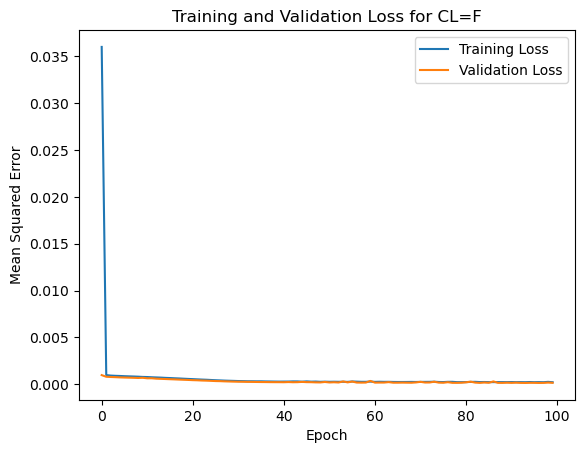

21/21 [==============================] - 0s 803us/step
Epoch 1/100
17/17 [==============================] - 0s 2ms/steposs: 0.0322
val_r2: 0.9603593345633976
65/65 [==============================] - 2s 9ms/step - loss: 0.0260 - val_loss: 0.0025
Epoch 2/100
17/17 [==============================] - 0s 652us/steps: 0.00
val_r2: 0.9668149654639218
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/100
17/17 [==============================] - 0s 810us/steps: 0.00
val_r2: 0.9685399436572621
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 813us/steps: 0.00
val_r2: 0.9698849184144709
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 5/100
17/17 [==============================] - 0s 975us/steps: 0.00
val_r2: 0.9711793435323405
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0018
Epo

Epoch 43/100
17/17 [==============================] - 0s 1ms/steposs: 4.3661e-
val_r2: 0.9935161565904312
65/65 [==============================] - 0s 2ms/step - loss: 4.2799e-04 - val_loss: 4.0085e-04
Epoch 44/100
17/17 [==============================] - 0s 976us/steps: 4.1674e-
val_r2: 0.9930389429830452
65/65 [==============================] - 0s 2ms/step - loss: 4.2091e-04 - val_loss: 4.3036e-04
Epoch 45/100
17/17 [==============================] - 0s 976us/steps: 4.3234e-
val_r2: 0.9925210386691025
65/65 [==============================] - 0s 3ms/step - loss: 4.2137e-04 - val_loss: 4.6237e-04
Epoch 46/100
17/17 [==============================] - 0s 72us/stepss: 4.8047e-
val_r2: 0.9944783335963321
65/65 [==============================] - 0s 2ms/step - loss: 4.3903e-04 - val_loss: 3.4137e-04
Epoch 47/100
17/17 [==============================] - 0s 979us/steps: 4.5532e-
val_r2: 0.9921268064850486
65/65 [==============================] - 0s 2ms/step - loss: 4.4193e-04 - val_loss: 4.8675

Epoch 84/100
17/17 [==============================] - 0s 499us/steps: 2.9249e-
val_r2: 0.9957067260238728
65/65 [==============================] - 0s 2ms/step - loss: 2.9487e-04 - val_loss: 2.6542e-04
Epoch 85/100
17/17 [==============================] - 0s 711us/steps: 2.5972e-
val_r2: 0.9962831482871584
65/65 [==============================] - 0s 3ms/step - loss: 2.8839e-04 - val_loss: 2.2979e-04
Epoch 86/100
17/17 [==============================] - 0s 0s/steploss: 2.7305e-
val_r2: 0.9933872832298677
65/65 [==============================] - 0s 2ms/step - loss: 2.9801e-04 - val_loss: 4.0882e-04
Epoch 87/100
17/17 [==============================] - 0s 183us/steps: 3.2368e-
val_r2: 0.9955541474834767
65/65 [==============================] - 0s 3ms/step - loss: 3.0134e-04 - val_loss: 2.7486e-04
Epoch 88/100
17/17 [==============================] - 0s 705us/steps: 2.8088e-
val_r2: 0.9955055396428892
65/65 [==============================] - 0s 3ms/step - loss: 2.8033e-04 - val_loss: 2.7786

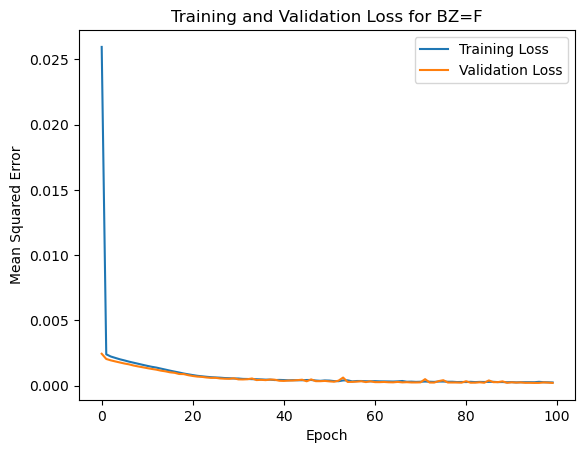

21/21 [==============================] - 0s 811us/step
Epoch 1/100
17/17 [==============================] - 0s 784us/steps: 0.0163
val_r2: 0.8740659103620355
65/65 [==============================] - 3s 10ms/step - loss: 0.0127 - val_loss: 0.0039
Epoch 2/100
17/17 [==============================] - 0s 757us/steps: 0.00
val_r2: 0.9036646028167556
65/65 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 3/100
17/17 [==============================] - 0s 813us/steps: 0.00
val_r2: 0.9194240113084325
65/65 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.9302263501520418
65/65 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 5/100
17/17 [==============================] - 0s 976us/steps: 0.00
val_r2: 0.9400558266671885
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0019
Ep

Epoch 83/100
17/17 [==============================] - 0s 0s/steploss: 5.0209e-
val_r2: 0.9853767346420386
65/65 [==============================] - 0s 2ms/step - loss: 4.9396e-04 - val_loss: 4.5230e-04
Epoch 84/100
17/17 [==============================] - 0s 380us/steps: 4.6353e-
val_r2: 0.9847852306647878
65/65 [==============================] - 0s 2ms/step - loss: 4.8704e-04 - val_loss: 4.7059e-04
Epoch 85/100
17/17 [==============================] - 0s 977us/steps: 5.1548e-
val_r2: 0.9854223719626355
65/65 [==============================] - 0s 2ms/step - loss: 5.1605e-04 - val_loss: 4.5088e-04
Epoch 86/100
17/17 [==============================] - 0s 689us/steps: 5.3535e-
val_r2: 0.9822004627041684
65/65 [==============================] - 0s 2ms/step - loss: 5.1158e-04 - val_loss: 5.5054e-04
Epoch 87/100
17/17 [==============================] - 0s 750us/steps: 5.1171e-
val_r2: 0.9858280338855352
65/65 [==============================] - 0s 2ms/step - loss: 4.9433e-04 - val_loss: 4.3834

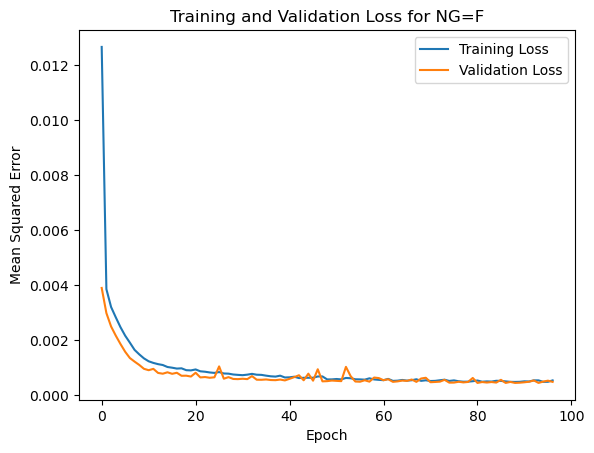

21/21 [==============================] - 0s 760us/step
Epoch 1/100
17/17 [==============================] - 0s 970us/steps: 0.0136
val_r2: 0.9449143658683482
65/65 [==============================] - 2s 8ms/step - loss: 0.0107 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 945us/steps: 0.00
val_r2: 0.9515229195311717
65/65 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 3/100
17/17 [==============================] - 0s 719us/steps: 0.00
val_r2: 0.9581556348069734
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/100
17/17 [==============================] - 0s 907us/steps: 0.00
val_r2: 0.9615987824372514
65/65 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 317us/steps: 0.00
val_r2: 0.964499384028198
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoc

17/17 [==============================] - 0s 977us/steps: 3.1622e-
val_r2: 0.9885126924821293
65/65 [==============================] - 0s 2ms/step - loss: 3.0220e-04 - val_loss: 4.4581e-04
Epoch 43/100
17/17 [==============================] - 0s 986us/steps: 2.3481e-
val_r2: 0.9922516868799249
65/65 [==============================] - 0s 2ms/step - loss: 2.6854e-04 - val_loss: 3.0070e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.8623e-
val_r2: 0.9927507595893693
65/65 [==============================] - 0s 2ms/step - loss: 2.7283e-04 - val_loss: 2.8134e-04
Epoch 45/100
17/17 [==============================] - 0s 2ms/steposs: 2.8547e-
val_r2: 0.9920383622857365
65/65 [==============================] - 0s 2ms/step - loss: 2.6344e-04 - val_loss: 3.0898e-04
Epoch 46/100
17/17 [==============================] - 0s 649us/steps: 2.4723e-
val_r2: 0.9926396758045029
65/65 [==============================] - 0s 3ms/step - loss: 2.6249e-04 - val_loss: 2.8565e-04
Epoch 47

Epoch 83/100
17/17 [==============================] - 0s 0s/steploss: 2.2560e-
val_r2: 0.9931551467572609
65/65 [==============================] - 0s 2ms/step - loss: 2.2177e-04 - val_loss: 2.6564e-04
Epoch 84/100
17/17 [==============================] - 0s 0s/steploss: 2.6473e-
val_r2: 0.9932500899503033
65/65 [==============================] - 0s 3ms/step - loss: 2.4600e-04 - val_loss: 2.6196e-04
Epoch 85/100
17/17 [==============================] - 0s 945us/steps: 1.5628e-
val_r2: 0.9918454462095989
65/65 [==============================] - 0s 3ms/step - loss: 2.0503e-04 - val_loss: 3.1647e-04
Epoch 86/100
17/17 [==============================] - 0s 574us/steps: 2.1447e-
val_r2: 0.993059783755051
65/65 [==============================] - 0s 2ms/step - loss: 1.9498e-04 - val_loss: 2.6934e-04
Epoch 87/100
17/17 [==============================] - 0s 262us/steps: 2.0211e-
val_r2: 0.9933660289454201
65/65 [==============================] - 0s 3ms/step - loss: 2.0654e-04 - val_loss: 2.5746e

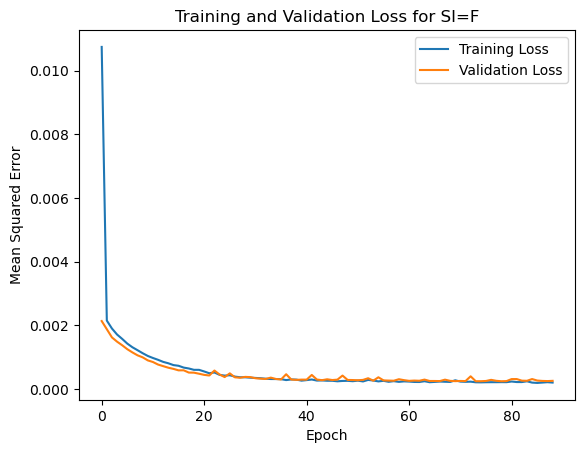

21/21 [==============================] - 0s 649us/step
Epoch 1/100
17/17 [==============================] - 0s 195us/steps: 0.0035
val_r2: 0.9551824096111826
65/65 [==============================] - 2s 8ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 694us/steps: 0.00
val_r2: 0.9650870317232452
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/100
17/17 [==============================] - 0s 767us/steps: 0.00
val_r2: 0.9688088794307128
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/100
17/17 [==============================] - 0s 690us/steps: 0.00
val_r2: 0.9774156315606318
65/65 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 5/100
17/17 [==============================] - 0s 0s/steploss: 0.00
val_r2: 0.9805571448005168
65/65 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 8.9800e-04

Epoch 42/100
17/17 [==============================] - 0s 758us/steps: 3.8663e-
val_r2: 0.9932698879508959
65/65 [==============================] - 0s 2ms/step - loss: 3.8685e-04 - val_loss: 3.1084e-04
Epoch 43/100
17/17 [==============================] - 0s 687us/steps: 3.3396e-
val_r2: 0.9934129601266025
65/65 [==============================] - 0s 3ms/step - loss: 3.4673e-04 - val_loss: 3.0423e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 3.6718e-
val_r2: 0.9934809962492376
65/65 [==============================] - 0s 2ms/step - loss: 3.5522e-04 - val_loss: 3.0109e-04
Epoch 45/100
17/17 [==============================] - 0s 979us/steps: 3.5283e-
val_r2: 0.9932804452590619
65/65 [==============================] - 0s 3ms/step - loss: 3.4745e-04 - val_loss: 3.1035e-04
Epoch 46/100
17/17 [==============================] - 0s 346us/steps: 3.4597e-
val_r2: 0.993701621644624
65/65 [==============================] - 0s 2ms/step - loss: 3.4535e-04 - val_loss: 2.9090e

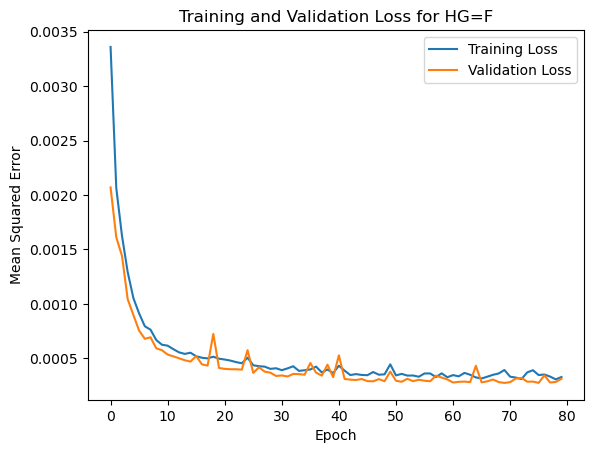

21/21 [==============================] - 0s 995us/step
Epoch 1/100
17/17 [==============================] - 0s 978us/steps: 0.0135
val_r2: 0.9643178202301377
65/65 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0026
Epoch 2/100
17/17 [==============================] - 0s 984us/steps: 0.00
val_r2: 0.9700469131666696
65/65 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 3/100
17/17 [==============================] - 0s 978us/steps: 0.00
val_r2: 0.9738830979621774
65/65 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 984us/steps: 0.00
val_r2: 0.9773147479162354
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 5/100
17/17 [==============================] - 0s 0s/steploss: 0.0019  
val_r2: 0.9806403091156463
65/65 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0014

Epoch 41/100
17/17 [==============================] - 0s 999us/steps: 5.0689e-
val_r2: 0.9909180280565185
65/65 [==============================] - 0s 2ms/step - loss: 5.1209e-04 - val_loss: 6.6053e-04
Epoch 42/100
17/17 [==============================] - 0s 981us/steps: 5.5727e-
val_r2: 0.9945221081402913
65/65 [==============================] - 0s 3ms/step - loss: 5.1730e-04 - val_loss: 3.9840e-04
Epoch 43/100
17/17 [==============================] - 0s 692us/steps: 4.1969e-
val_r2: 0.9944561728608057
65/65 [==============================] - 0s 3ms/step - loss: 5.0918e-04 - val_loss: 4.0320e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 5.2948e-
val_r2: 0.9952709035955364
65/65 [==============================] - 0s 3ms/step - loss: 4.9486e-04 - val_loss: 3.4394e-04
Epoch 45/100
17/17 [==============================] - 0s 1ms/steposs: 4.9611e-
val_r2: 0.9931752958298677
65/65 [==============================] - 0s 2ms/step - loss: 4.7775e-04 - val_loss: 4.9636

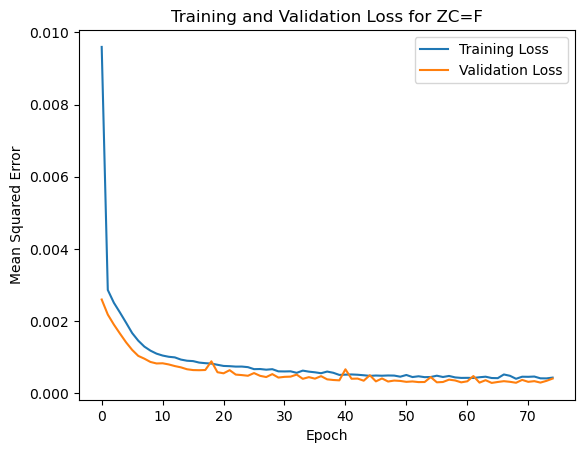

21/21 [==============================] - 0s 739us/step
Epoch 1/100
17/17 [==============================] - 0s 983us/steps: 0.0060
val_r2: 0.9192047479528308
65/65 [==============================] - 2s 8ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 2/100
17/17 [==============================] - 0s 2ms/steposs: 0.00
val_r2: 0.9433677270222093
65/65 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/100
17/17 [==============================] - 0s 976us/steps: 0.00
val_r2: 0.9548875845755522
65/65 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/100
17/17 [==============================] - 0s 976us/steps: 0.0010  
val_r2: 0.9677596413510509
65/65 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 8.7818e-04
Epoch 5/100
17/17 [==============================] - 0s 936us/steps: 8.0778e-
val_r2: 0.9757558316838425
65/65 [==============================] - 0s 3ms/step - loss: 7.9998e-04 - val_

Epoch 42/100
17/17 [==============================] - 0s 1ms/steposs: 1.9938e-
val_r2: 0.9923825441946114
65/65 [==============================] - 0s 3ms/step - loss: 2.2424e-04 - val_loss: 2.0749e-04
Epoch 43/100
17/17 [==============================] - 0s 776us/steps: 2.7632e-
val_r2: 0.992815274997999
65/65 [==============================] - 0s 3ms/step - loss: 2.3104e-04 - val_loss: 1.9570e-04
Epoch 44/100
17/17 [==============================] - 0s 1ms/steposs: 2.3439e-
val_r2: 0.9924807979406833
65/65 [==============================] - 0s 3ms/step - loss: 2.2366e-04 - val_loss: 2.0481e-04
Epoch 45/100
17/17 [==============================] - 0s 0s/steploss: 2.2707e-
val_r2: 0.9930040418334448
65/65 [==============================] - 0s 2ms/step - loss: 2.2454e-04 - val_loss: 1.9056e-04
Epoch 46/100
17/17 [==============================] - 0s 980us/steps: 2.3391e-
val_r2: 0.9929025498943721
65/65 [==============================] - 0s 3ms/step - loss: 2.1648e-04 - val_loss: 1.9332e

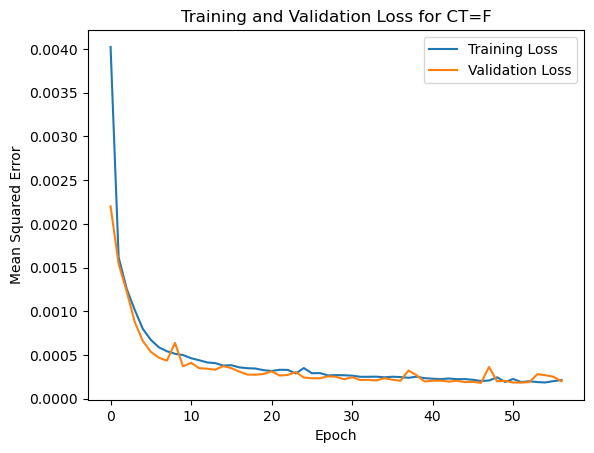

21/21 [==============================] - 0s 1ms/step
Epoch 1/100
17/17 [==============================] - 0s 979us/steps: 0.0186
val_r2: 0.9303022874573972
65/65 [==============================] - 2s 8ms/step - loss: 0.0138 - val_loss: 0.0029
Epoch 2/100
17/17 [==============================] - 0s 976us/steps: 0.00
val_r2: 0.940225785801278
65/65 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 3/100
17/17 [==============================] - 0s 500us/steps: 0.00
val_r2: 0.9478497550983376
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4/100
17/17 [==============================] - 0s 0s/steploss: 0.00
val_r2: 0.9540284574034186
65/65 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/100
17/17 [==============================] - 0s 682us/steps: 0.00
val_r2: 0.9586983266166537
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 

Epoch 83/100
17/17 [==============================] - 0s 2ms/steposs: 3.6621e-
val_r2: 0.9924134244715754
65/65 [==============================] - 0s 3ms/step - loss: 3.4572e-04 - val_loss: 3.1038e-04
Epoch 84/100
17/17 [==============================] - 0s 3ms/steposs: 3.8231e-
val_r2: 0.9898321014714305
65/65 [==============================] - 0s 3ms/step - loss: 3.8571e-04 - val_loss: 4.1599e-04
Epoch 85/100
17/17 [==============================] - 0s 1ms/steposs: 3.4341e-
val_r2: 0.9925201625992697
65/65 [==============================] - 0s 3ms/step - loss: 3.3796e-04 - val_loss: 3.0602e-04
Epoch 86/100
17/17 [==============================] - 0s 68us/stepss: 3.6419e-
val_r2: 0.992483670657711
65/65 [==============================] - 0s 3ms/step - loss: 3.6297e-04 - val_loss: 3.0751e-04
Epoch 87/100
17/17 [==============================] - 0s 776us/steps: 3.7784e-
val_r2: 0.9924688814368374
65/65 [==============================] - 0s 3ms/step - loss: 3.6433e-04 - val_loss: 3.0812e

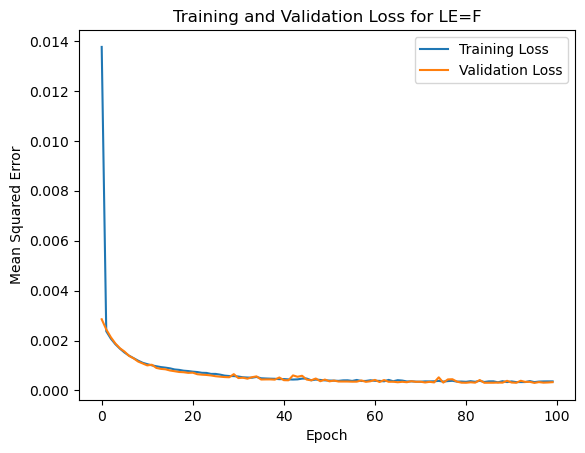

21/21 [==============================] - 0s 785us/step
Epoch 1/100
17/17 [==============================] - 0s 976us/steps: 0.0405
val_r2: 0.9460910113614732
65/65 [==============================] - 2s 9ms/step - loss: 0.0255 - val_loss: 0.0021
Epoch 2/100
17/17 [==============================] - 0s 1ms/steposs: 0.00
val_r2: 0.953806999905453
65/65 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 3/100
17/17 [==============================] - 0s 310us/steps: 0.00
val_r2: 0.9578702661217181
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/100
17/17 [==============================] - 0s 572us/steps: 0.00
val_r2: 0.9611377221622951
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 688us/steps: 0.0017  
val_r2: 0.9642185531579395
65/65 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014


Epoch 83/100
17/17 [==============================] - 0s 765us/steps: 2.8259e-
val_r2: 0.9924200449928566
65/65 [==============================] - 0s 3ms/step - loss: 2.8082e-04 - val_loss: 3.0201e-04
Epoch 84/100
17/17 [==============================] - 0s 979us/steps: 2.8481e-
val_r2: 0.9903465013675299
65/65 [==============================] - 0s 3ms/step - loss: 2.8423e-04 - val_loss: 3.8463e-04
Epoch 85/100
17/17 [==============================] - 0s 725us/steps: 3.0851e-
val_r2: 0.993248623104531
65/65 [==============================] - 0s 2ms/step - loss: 3.1285e-04 - val_loss: 2.6900e-04
Epoch 86/100
17/17 [==============================] - 0s 728us/steps: 2.9710e-
val_r2: 0.9918509134700655
65/65 [==============================] - 0s 3ms/step - loss: 2.8789e-04 - val_loss: 3.2469e-04
Epoch 87/100
17/17 [==============================] - 0s 683us/steps: 3.1577e-
val_r2: 0.9931527541376569
65/65 [==============================] - 0s 2ms/step - loss: 3.1410e-04 - val_loss: 2.7282e

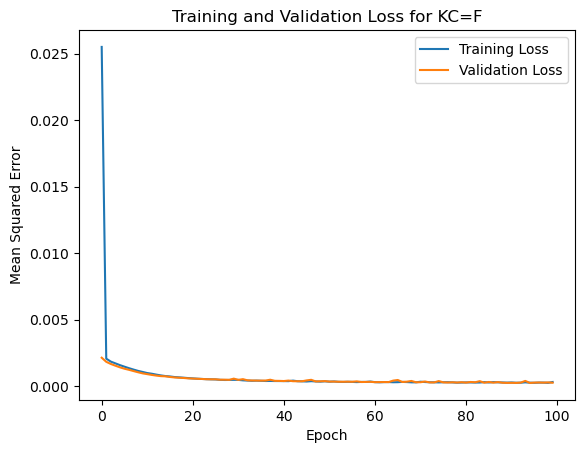

21/21 [==============================] - 0s 781us/step
  Stock         MSE       MAE        R2
0  CL=F    7.887060  1.868458  0.984110
1  BZ=F    7.459524  1.830560  0.985812
2  NG=F    0.123317  0.229764  0.971299
3  SI=F    0.329818  0.412991  0.957181
4  HG=F    0.005366  0.055039  0.984791
5  ZC=F  203.227790  9.425854  0.988890
6  CT=F    8.844410  1.876627  0.984241
7  LE=F    1.562196  0.905523  0.993530
8  KC=F   22.331471  3.506689  0.990461


In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional
from keras.callbacks import EarlyStopping, Callback

stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    # LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(28, return_sequences=False, activation='linear'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))


#     # Fully connected layers
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(14, activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=100, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping, metrics])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred)
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


#### Overall model performance

In [289]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

27.974550279995274
2.2346117915284283
0.9822571941131018


In [290]:
predictions.to_csv(f"C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adamax_C.csv")

In [60]:
BiLSTM_adamax_Predicted_Prices=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/results/Bidirectional_adamax_C.csv")
BiLSTM_adamax_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
BiLSTM_adamax_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    36.714478  39.855915  1.842311  18.081972  2.489933  329.96560   
1    38.322037  40.661650  1.796071  17.768625  2.523645  331.96150   
2    38.941257  41.006790  1.811618  17.708052  2.551700  333.66098   
3    39.046130  41.838776  1.786399  17.770864  2.577186  331.00787   
4    39.401100  41.236305  1.801218  17.733036  2.625036  328.83560   
..         ...        ...       ...        ...       ...        ...   
644  78.509390  80.639980  4.567507  23.755770  3.758400  659.35156   
645  78.624340  81.887955  4.814611  23.578756  3.754303  663.26556   
646  78.392260  82.738970  5.106218  23.782116  3.803143  669.81680   
647  79.022750  82.937164  4.653578  23.695164  3.803997  677.66090   
648  79.570970  81.936210  4.446264  23.958364  3.802916  680.87990   

          CT=F        LE=F        KC=F  
0    59.533535   96.141750   98.634026  
1    60.617836   95.346535   98.619026  
2    60.833992   94.845970   99.200950  
3    61.052002   96.077480   98.432274  
4    60.246582   96.963120   97.811390  
..         ...         ...         ...  
644  84.703830  156.497710  167.906660  
645  84.893250  157.125810  170.666840  
646  84.784935  157.162610  166.715420  
647  83.654680  157.589750  171.593930  
648  82.814000  158.576980  172.788510  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


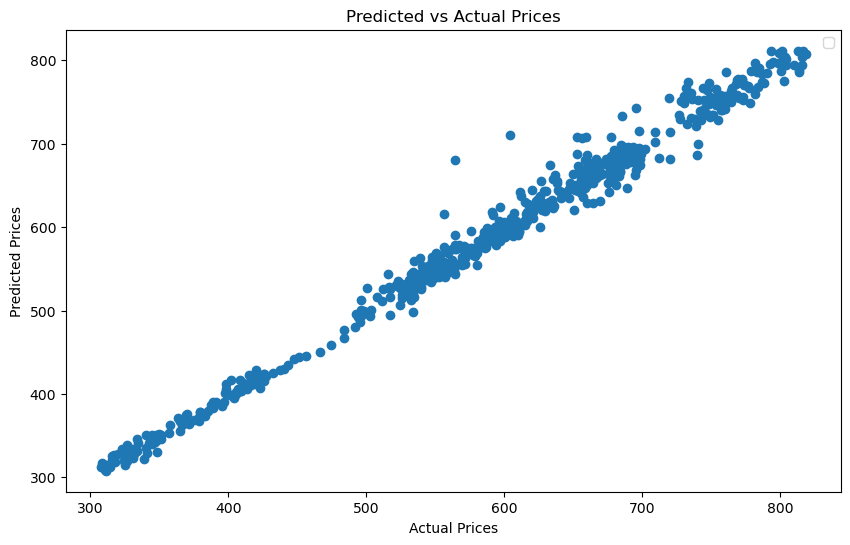

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], BiLSTM_adamax_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization 

In [62]:
assetLabels = BiLSTM_adamax_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = BiLSTM_adamax_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.133 0.125 0.237 0.054 0.074 0.123 0.064 0.08  0.102]

Variance-Covariance Matrix of Returns:
 [[ 2.707  1.998  0.755  0.374  0.577  0.439  0.545  0.009  0.315]
 [ 1.998  2.665  0.633  0.393  0.538  0.409  0.515  0.076  0.399]
 [ 0.755  0.633 20.357  0.271  0.456  0.201  0.378 -0.03   0.281]
 [ 0.374  0.393  0.271  2.111  0.604  0.172  0.294  0.035  0.201]
 [ 0.577  0.538  0.456  0.604  1.785  0.329  0.386  0.077  0.47 ]
 [ 0.439  0.409  0.201  0.172  0.329  2.304  0.273 -0.006  0.214]
 [ 0.545  0.515  0.378  0.294  0.386  0.273  2.589  0.007  0.484]
 [ 0.009  0.076 -0.03   0.035  0.077 -0.006  0.007  0.537  0.056]
 [ 0.315  0.399  0.281  0.201  0.47   0.214  0.484  0.056  3.033]]


## Portfolio Returns with Bidirectional LSTM-adamax Predictions 

In [63]:
portfolioSize = len(BiLSTM_adamax_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.851]] 
Annualized Risk (%):   [[12.625]] 
Annualized Expected Portfolio Return(%):   [26.369]

Optimal weights (%):
 [[11.648]
 [11.385]
 [ 6.72 ]
 [10.516]
 [10.849]
 [13.211]
 [10.326]
 [13.595]
 [11.751]]


# GRU

## GRU price predictions with Adam Optimizer

Epoch 1/50
65/65 [==============================] - 1s 4ms/step - loss: 0.0550 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 9.1064e-04 - val_loss: 0.0012
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 8.9356e-04 - val_loss: 0.0011
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 8.0961e-04 - val_loss: 0.0011
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 7.6408e-04 - val_loss: 0.0011
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 7.3534e-04 - val_loss: 0.0010
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 6.7611e-04 - val_loss: 9.6728e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 6.3705e-04 - val_loss: 9.4383e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 6.0901e-0

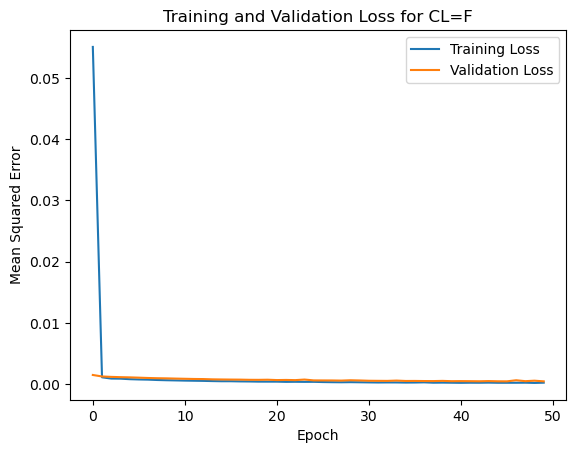

21/21 [==============================] - 0s 798us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0359 - val_loss: 0.0014
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 9.8618e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 8.7736e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 9.4191e-04 - val_loss: 7.9216e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 8.8372e-04 - val_loss: 7.1817e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 8.3249e-04 - val_loss: 6.6134e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 7.9098e-04 - val_loss: 6

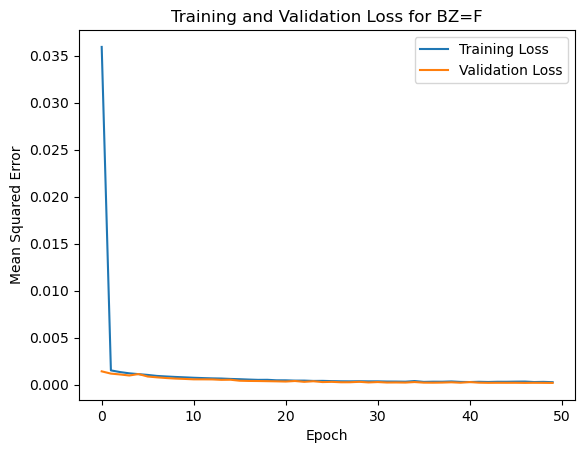

21/21 [==============================] - 0s 792us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0037
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 9.7949e-04 - val_loss: 0.0010
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 8.9374e-04 - val_loss: 9.9475e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 8.2569e-04 - val_loss: 9.6691e-04
Epoch 11/5

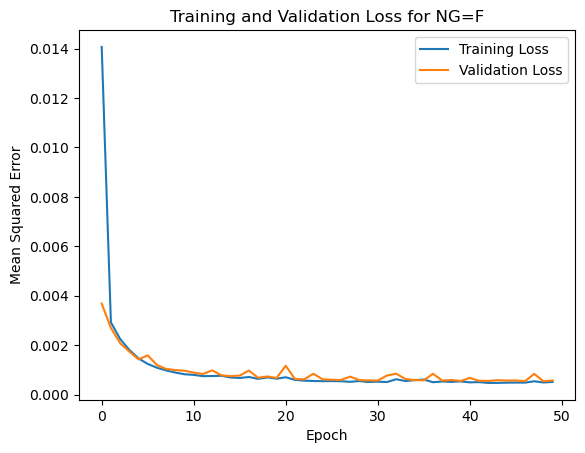

21/21 [==============================] - 0s 796us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0018
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 9.1218e-04
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 9.4181e-04 - val_loss: 6.8294e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 7.9662e-04 - val_loss: 7.1580e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 6.8648e-04 - val_loss: 4.7020e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 5.1564e-04 - val_loss: 3.8009e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 4.7044e-04 - val_loss: 3.4310e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 4.2258e-04 - val_loss: 3.2083e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 4.66

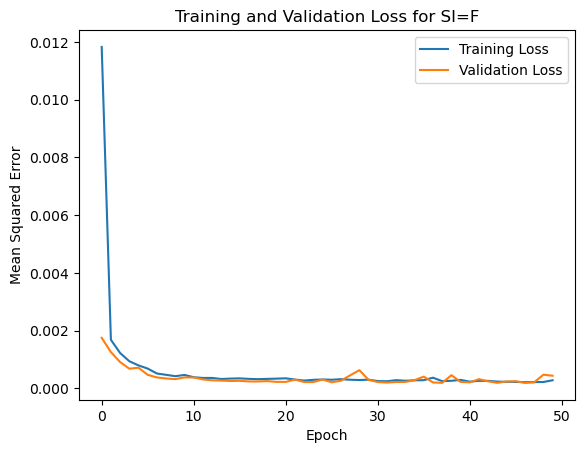

21/21 [==============================] - 0s 916us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0076 - val_loss: 0.0026
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 9.1264e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 8.7040e-04 - val_loss: 7.9326e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 7.1577e-04 - val_loss: 6.5732e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 6.6460e-04 - val_loss: 8.0325e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 6.3256e-04 - val_loss: 5.7931e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 5.9983e-04 - val_loss: 5.7297e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 5.2863e-04 -

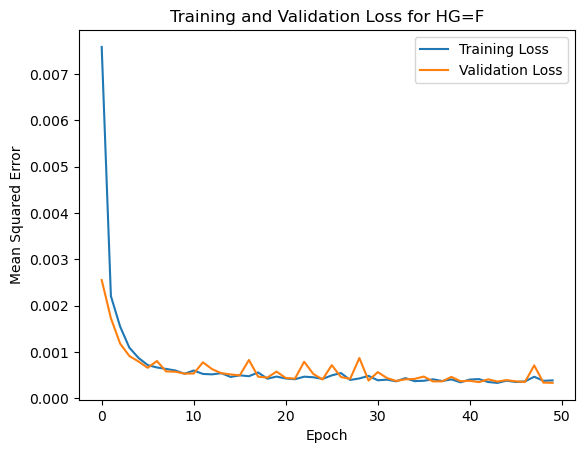

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0026
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 9.4520e-04 - val_loss: 9.2771e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 8.3805e-04 - val_loss: 8.6592e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 7.3233e-04 - val_loss: 7.9143e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 7.2108e-04 - val_loss: 7.3469e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 6.7337e-04 - val_loss: 6.5761e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 6.3055e-04 - val

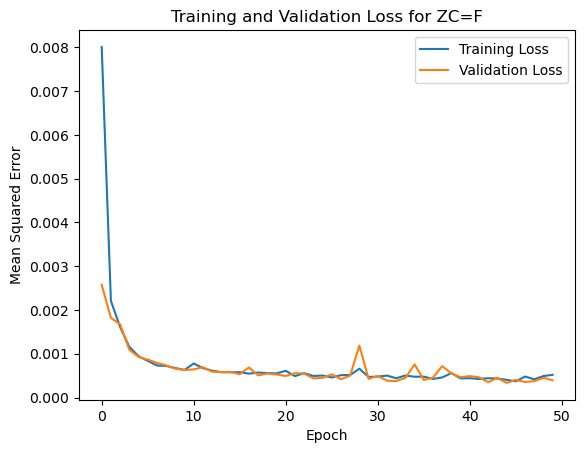

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 8.9306e-04
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 8.1097e-04 - val_loss: 6.7698e-04
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 5.6396e-04 - val_loss: 5.3306e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 4.8938e-04 - val_loss: 5.0089e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 4.8523e-04 - val_loss: 4.9860e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 4.4053e-04 - val_loss: 4.6114e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 3.6966e-04 - val_loss: 4.8082e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 3.9703e-04 - val_loss: 4.5598e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - lo

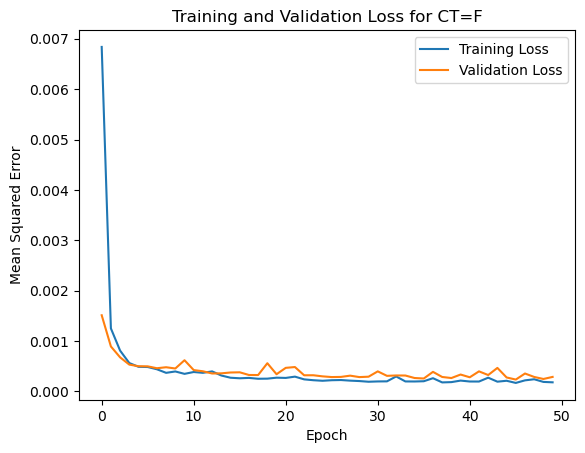

21/21 [==============================] - 0s 902us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0299 - val_loss: 0.0027
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/50
65/65 [==============================] - 0s 971us/step - loss: 9.7726e-04 - val_loss: 9.8842e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 8.8098e-04 - val_loss: 8.9047e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 8.3263e-04 - val_loss: 8.5010e-04
Epoc

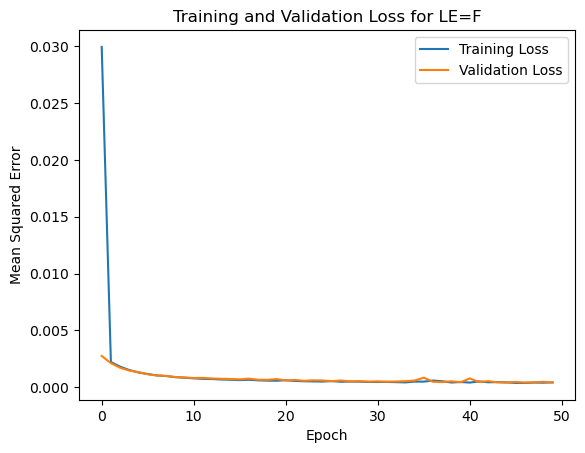

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0222 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 9.8425e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 9.3300e-04 - val_loss: 8.5819e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 8.1172e-04 - val_loss: 7.8721e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 7.2567e-04 - val_loss: 6.8820e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 6.6507e-04 - val_loss: 6.2190e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 6.3865e-04 - val_loss: 5.6910e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 5.6941e-04 -

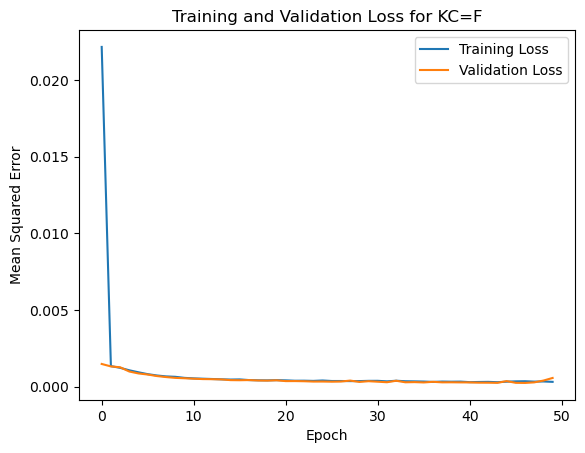

21/21 [==============================] - 0s 836us/step
  Stock         MSE        MAE        R2
0  CL=F    9.010856   2.089039  0.981846
1  BZ=F    7.200478   1.833265  0.986305
2  NG=F    0.074708   0.179700  0.982612
3  SI=F    0.619148   0.647499  0.919618
4  HG=F    0.005020   0.053033  0.985771
5  ZC=F  249.860111  11.402174  0.986340
6  CT=F   10.694876   2.121467  0.980944
7  LE=F    1.880329   1.048811  0.992212
8  KC=F   51.540931   5.620301  0.977984


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\2407916001.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional, GRU
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import SGD



stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
 
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    
    model = Sequential()
    # First GRU layer with Dropout regularisation
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='linear'))
    model.add(Dense(1))
    # Compiling the RNN
    model.compile(optimizer='adam',loss='mean_squared_error')
    # Fitting to the training set
#     model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [4]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

36.76516199898177
2.777254431893862
0.9770703766038606


In [5]:
predictions.to_csv(f"C:/Users/kship/Documents/IB/predictions/results/GRU_adam_C.csv")

In [56]:
GRU_adam_Predicted_Prices=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/results/GRU_adam_C.csv")
# RF_Predicted_Prices.drop(columns=['AAPL','ORCL','TMUS'],inplace=True)
GRU_adam_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
GRU_adam_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    36.223125  39.175632  1.850840  17.780073  2.504952  326.32047   
1    37.198860  41.921844  1.827111  17.423073  2.532994  329.99200   
2    39.006718  41.672480  1.807307  17.500902  2.551056  333.29245   
3    39.556355  42.533490  1.816786  17.373924  2.571458  331.56300   
4    39.823850  43.370564  1.814158  17.389526  2.622805  327.87943   
..         ...        ...       ...        ...       ...        ...   
644  77.548810  81.488440  4.920873  23.049570  3.778907  648.76465   
645  76.750870  82.326060  4.851481  23.069958  3.780441  653.31976   
646  76.848434  83.101875  5.121111  23.359936  3.805347  660.16090   
647  76.587070  83.260680  4.910765  23.277142  3.816912  670.94037   
648  76.335380  83.123566  4.582000  23.495693  3.826819  670.50934   

          CT=F        LE=F        KC=F  
0    60.618140   94.536766   96.655760  
1    61.589672   95.470955   96.375190  
2    61.048310   94.604150   97.108536  
3    60.901870   95.681750   96.962470  
4    60.556934   95.861664   95.858840  
..         ...         ...         ...  
644  86.772484  155.023100  162.067100  
645  87.077000  155.287490  165.808760  
646  86.118904  155.251390  164.526050  
647  84.969440  155.697680  167.449480  
648  83.373310  156.630360  168.602660  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


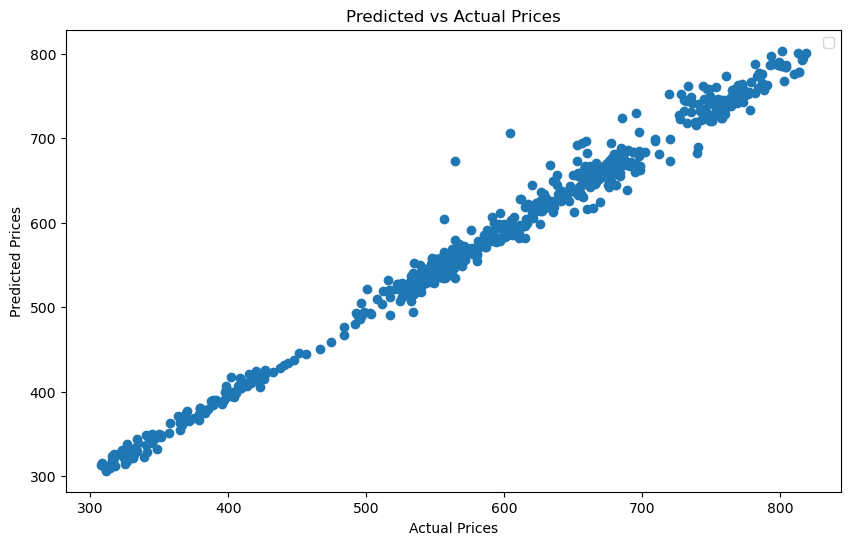

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], GRU_adam_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

# Portfolio Optimization


In [58]:
assetLabels = GRU_adam_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = GRU_adam_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.127 0.13  0.215 0.056 0.072 0.123 0.062 0.08  0.1  ]

Variance-Covariance Matrix of Returns:
 [[ 2.34   1.444  0.423  0.308  0.38   0.276  0.376  0.006  0.216]
 [ 1.444  2.77   0.673  0.351  0.568  0.401  0.506  0.032  0.37 ]
 [ 0.423  0.673 15.3    0.141  0.363  0.196  0.383 -0.005  0.481]
 [ 0.308  0.351  0.141  2.6    0.63   0.264  0.311  0.021  0.25 ]
 [ 0.38   0.568  0.363  0.63   1.349  0.255  0.418  0.051  0.401]
 [ 0.276  0.401  0.196  0.264  0.255  2.285  0.394 -0.001  0.307]
 [ 0.376  0.506  0.383  0.311  0.418  0.394  2.567  0.073  0.569]
 [ 0.006  0.032 -0.005  0.021  0.051 -0.001  0.073  0.506  0.064]
 [ 0.216  0.37   0.481  0.25   0.401  0.307  0.569  0.064  2.881]]


## Portfolio Returns with GRU Adam Predictions 

In [59]:
portfolioSize = len(GRU_adam_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[1.911]] 
Annualized Risk (%):   [[12.174]] 
Annualized Expected Portfolio Return(%):   [26.264]

Optimal weights (%):
 [[12.231]
 [11.455]
 [ 7.59 ]
 [ 9.977]
 [10.938]
 [13.005]
 [ 9.744]
 [13.744]
 [11.315]]


##  GRU price predictions with RMSprop Optimizer  

Epoch 1/50
65/65 [==============================] - 1s 3ms/step - loss: 0.0094 - val_loss: 6.3111e-04
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 7.3773e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 8/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 8.1233e-04
Epoch 1

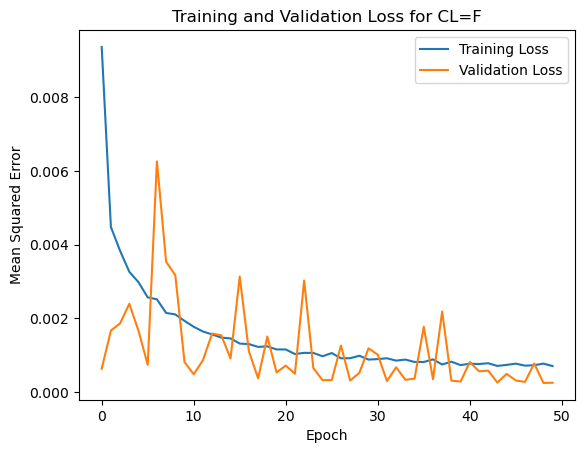

21/21 [==============================] - 0s 729us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0415 - val_loss: 0.0057
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0015
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0082
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0040 - val_loss: 0.0010
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 9.2227e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 6.9461e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 9.6241e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 11/50
65/65 

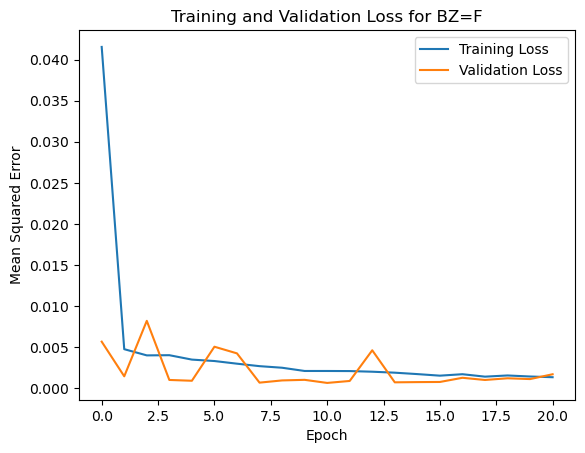

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0086 - val_loss: 0.0025
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0098
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 9.7328e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 7.3056e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 8.8065e-04
Epoch 11/50
65/65 

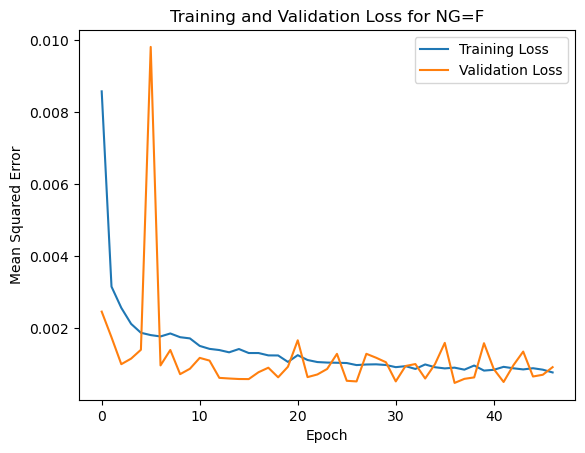

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 6.8916e-04
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 6.8551e-04
Epoch 4/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 5.3803e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 5.9092e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 4.9700e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 9.7939e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 4.7131e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 4.3728e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 9.5249e-04 - val_loss: 7

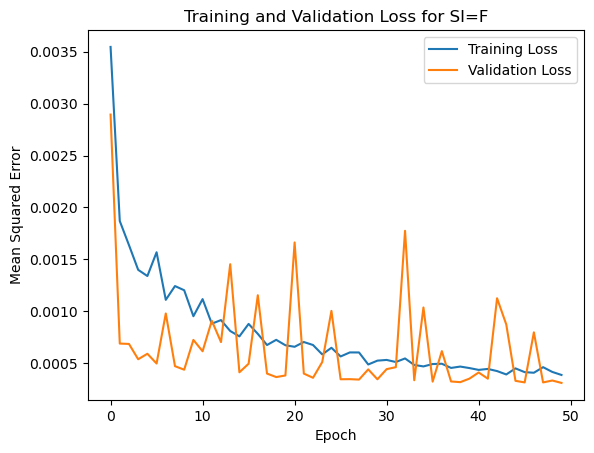

21/21 [==============================] - 0s 910us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0060 - val_loss: 8.9845e-04
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 8.1792e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 9.6934e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 5.1239e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 4.7658e-04
Epoch 11/5

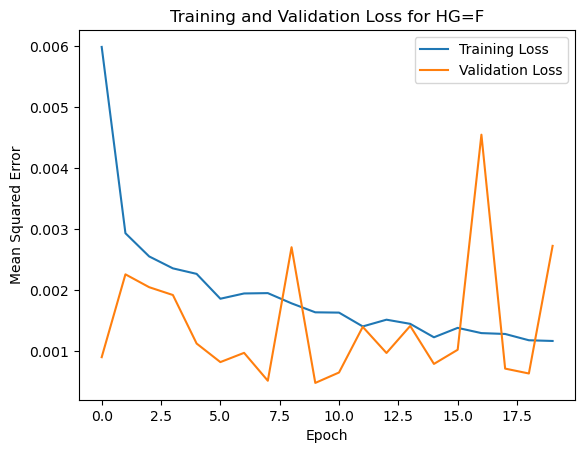

21/21 [==============================] - 0s 909us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0210 - val_loss: 0.0036
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 7.8358e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 7.0452e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 7.3070e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 4.7763e-04
Epoch 11/50
65

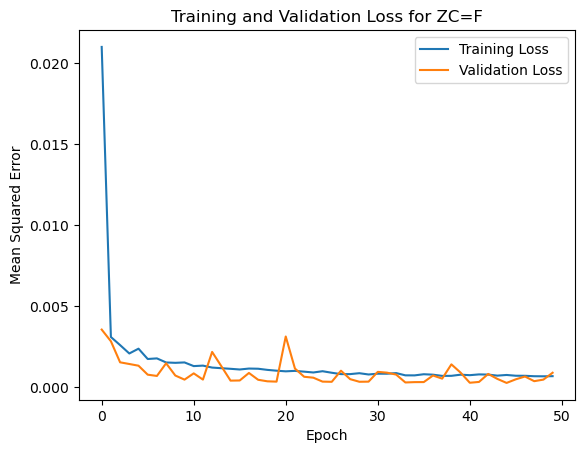

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.4229e-04
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 9.9967e-04 - val_loss: 7.8762e-04
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 9.5878e-04 - val_loss: 4.5399e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 8.1130e-04 - val_loss: 8.0098e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 8.3056e-04 - val_loss: 5.4645e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 7.9136e-04 - val_loss: 8.7034e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 7.0532e-04 - val_loss: 5.2300e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 8.1689e-04 - val_loss: 3.2800e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - lo

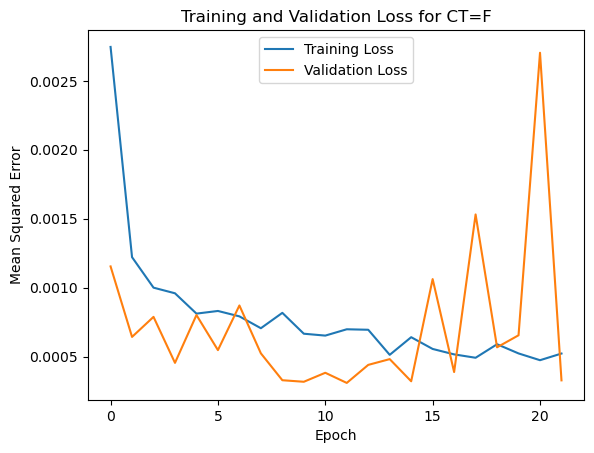

21/21 [==============================] - 0s 633us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0039
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0016
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0089
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0053
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 8.4706e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 8.1154e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 9.4840e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 8.4442e-04
Epoch 11/50
65

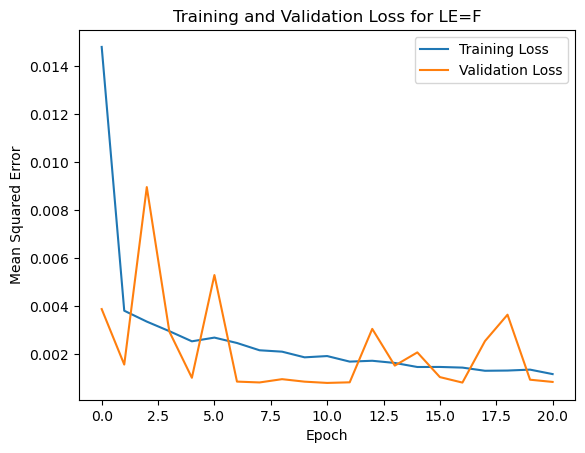

21/21 [==============================] - 0s 876us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0045
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.9660e-04
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 8.3379e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 6.4762e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 9.8236e-04 - val_loss: 7.7851e-04
Epoch 11/5

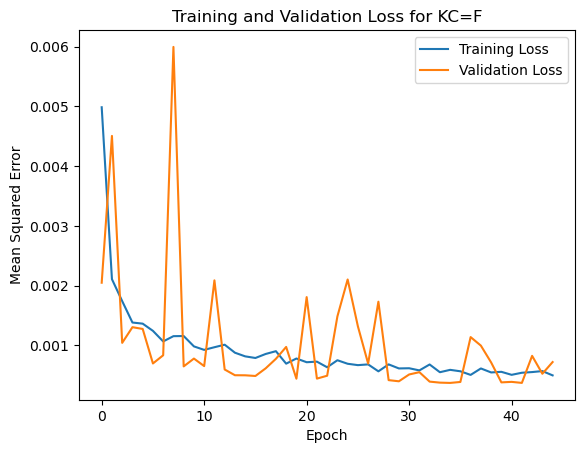

21/21 [==============================] - 0s 869us/step
  Stock         MSE        MAE        R2
0  CL=F   11.329630   2.270779  0.977175
1  BZ=F   14.029795   2.744771  0.973316
2  NG=F    0.119295   0.222826  0.972235
3  SI=F    0.355857   0.425855  0.953800
4  HG=F    0.009372   0.071806  0.973439
5  ZC=F  646.756423  20.540358  0.964642
6  CT=F   12.684908   2.171935  0.977398
7  LE=F    4.502786   1.775333  0.981351
8  KC=F   25.269542   3.751159  0.989206


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\1353904051.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional, GRU
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import SGD



stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    
    model = Sequential()
    # First GRU layer with Dropout regularisation
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='linear'))
    model.add(Dense(1))
    # Compiling the RNN
    model.compile(optimizer='rmsprop',loss='mean_squared_error')
    # Fitting to the training set
#     model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

79.45084518151937
3.7749803302182334
0.973617978911839


In [15]:
predictions.to_csv(f"C:/Users/kship/Documents/IB/predictions/results/GRU_rmsprop_C.csv")

In [52]:
GRU_rmsprop_Predicted_Prices=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/results/GRU_rmsprop_C.csv")
GRU_rmsprop_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
GRU_rmsprop_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    36.776356  39.910557  1.765671  18.146110  2.481925  327.43622   
1    38.355007  40.373135  1.782429  17.804400  2.492033  329.45963   
2    39.282433  41.233078  1.767215  17.815813  2.503976  331.03537   
3    39.371696  41.266320  1.756691  17.829630  2.522479  329.76334   
4    39.653103  41.847153  1.786047  17.827044  2.554041  327.95337   
..         ...        ...       ...        ...       ...        ...   
644  75.587660  80.207460  5.098313  23.805511  3.826157  634.03800   
645  76.297226  79.405030  5.016409  23.812685  3.795666  637.87067   
646  76.801780  79.205956  5.126584  23.755127  3.798621  644.02600   
647  77.395330  79.727580  4.779045  23.697746  3.793839  651.58830   
648  78.145905  80.287340  4.677447  23.964657  3.797006  653.43030   

          CT=F        LE=F       KC=F  
0    59.202873   95.989815   98.03967  
1    59.930756   95.729290   98.01472  
2    60.545470   94.209175   98.21186  
3    60.749500   95.020650   97.21448  
4    60.798313   96.327736   96.33949  
..         ...         ...        ...  
644  84.867615  153.479950  169.07900  
645  84.175990  153.964970  171.34950  
646  85.048210  154.344310  169.71078  
647  85.187904  154.839460  171.86276  
648  84.063870  155.309500  169.84831  

[649 rows x 9 columns]

### Visualizing Actual vs Predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


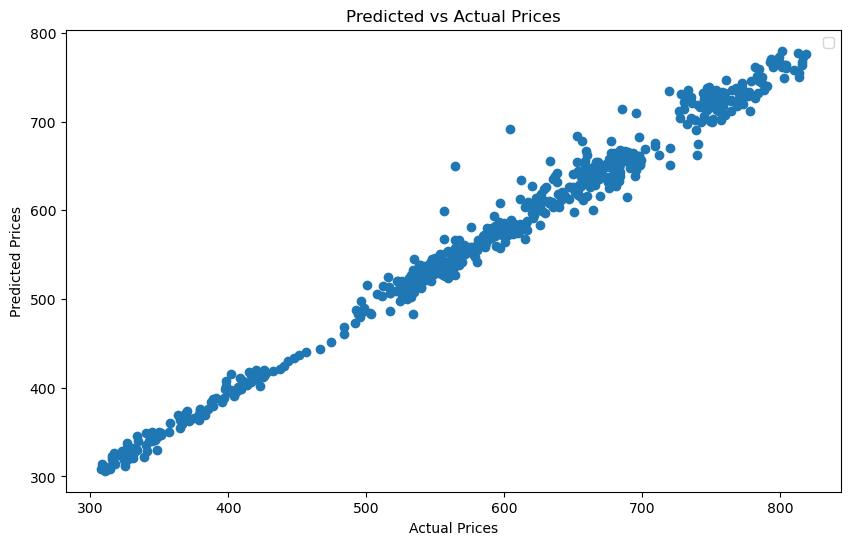

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], GRU_rmsprop_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Returns with GRU RMSprop Predictions 

In [54]:
assetLabels = GRU_rmsprop_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = GRU_rmsprop_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.12  0.112 0.189 0.05  0.069 0.114 0.062 0.075 0.092]

Variance-Covariance Matrix of Returns:
 [[ 0.791  0.379  0.197  0.137  0.138  0.199  0.206 -0.02   0.089]
 [ 0.379  0.832  0.225  0.089  0.163  0.129  0.121 -0.013  0.084]
 [ 0.197  0.225  7.823  0.237  0.183  0.143  0.458 -0.008  0.186]
 [ 0.137  0.089  0.237  1.435  0.233  0.145  0.18   0.035  0.145]
 [ 0.138  0.163  0.183  0.233  0.74   0.105  0.194 -0.005  0.085]
 [ 0.199  0.129  0.143  0.145  0.105  1.37   0.216 -0.003  0.149]
 [ 0.206  0.121  0.458  0.18   0.194  0.216  1.533  0.024  0.186]
 [-0.02  -0.013 -0.008  0.035 -0.005 -0.003  0.024  0.192 -0.01 ]
 [ 0.089  0.084  0.186  0.145  0.085  0.149  0.186 -0.01   1.54 ]]


In [55]:
portfolioSize = len(GRU_rmsprop_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[3.559]] 
Annualized Risk (%):   [[5.695]] 
Annualized Expected Portfolio Return(%):   [23.265]

Optimal weights (%):
 [[15.177]
 [10.768]
 [ 3.031]
 [ 0.   ]
 [ 3.652]
 [ 6.53 ]
 [ 0.   ]
 [55.613]
 [ 5.23 ]]


##  GRU price predictions with Adaamax Optimizer  

Epoch 1/50
65/65 [==============================] - 1s 3ms/step - loss: 0.0545 - val_loss: 0.0036
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 11/50
65/65 [

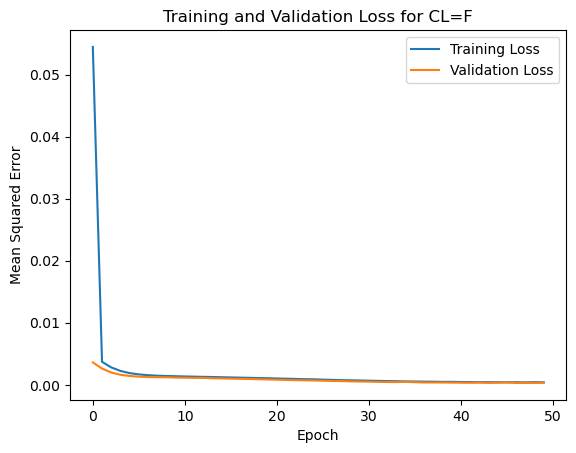

21/21 [==============================] - 0s 836us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0110 - val_loss: 0.0015
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 8.6929e-04 - val_loss: 0.0011
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 8.3251e-04 - val_loss: 0.0011
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 7.9596e-04 - val_loss: 0.0010
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 7.6929e-04 - val_loss: 0.0010
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 7.4633e-04 - val_loss: 9.7650e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 7.1801e-04 - val_loss: 9.4666e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 6.9520e-04 - val_loss: 9.2653e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 6.8741e-04 - val

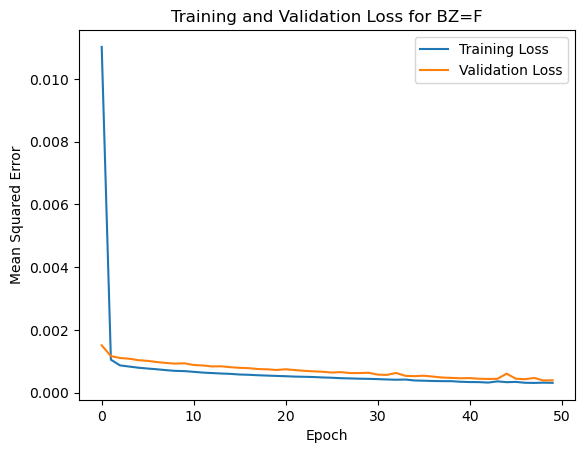

21/21 [==============================] - 0s 907us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0125 - val_loss: 0.0048
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/50
65/65 [===========

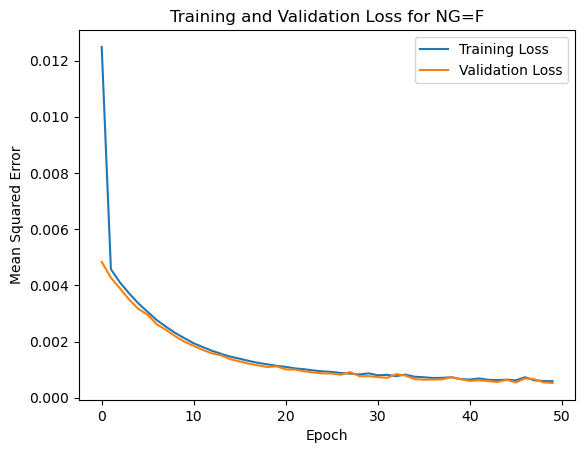

21/21 [==============================] - 0s 957us/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 9.6759e-04 - val_loss: 9.8172e-04
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 7.9053e-04 - val_loss: 8.2004e-04
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 6.8961e-04 - val_loss: 7.2440e-04
Epoch 7/50
65/65 [==============================] - 0s 2ms/step - loss: 6.1733e-04 - val_loss: 6.9765e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 6.2736e-04 - val_loss: 5.9070e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 5.4234e-04 - val_loss: 5.5313e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 5.2147e-

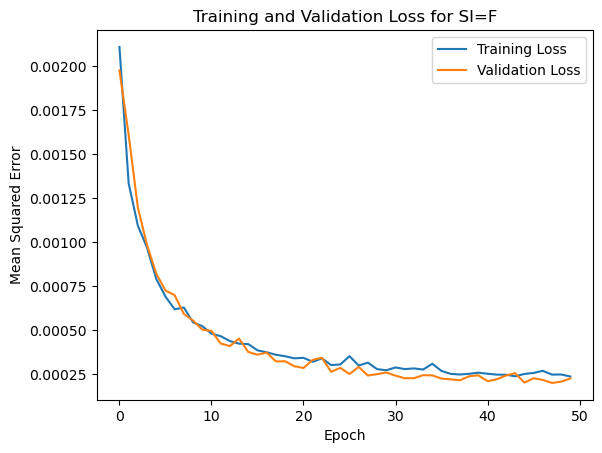

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 9.0994e-04
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 8.4533e-04
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 9.9081e-04 - val_loss: 7.9543e-04
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 9.5709e-04 - val_loss: 7.2124e-04
Epoch 

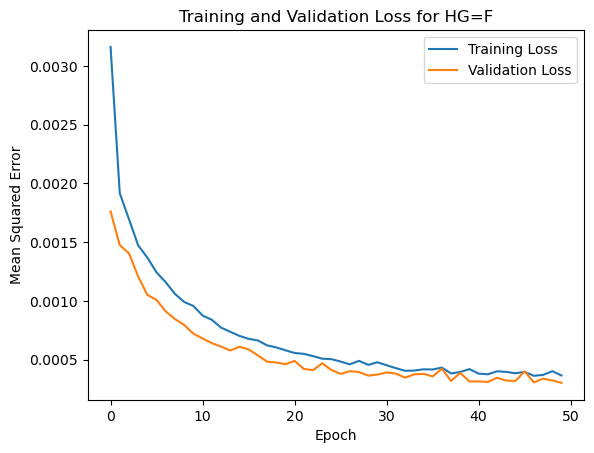

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0061 - val_loss: 0.0027
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 9.4457e-04
Epoch 9/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 8.7304e-04
Epoch 10/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 8.0426e-04
Epoch 11/50
65/65 

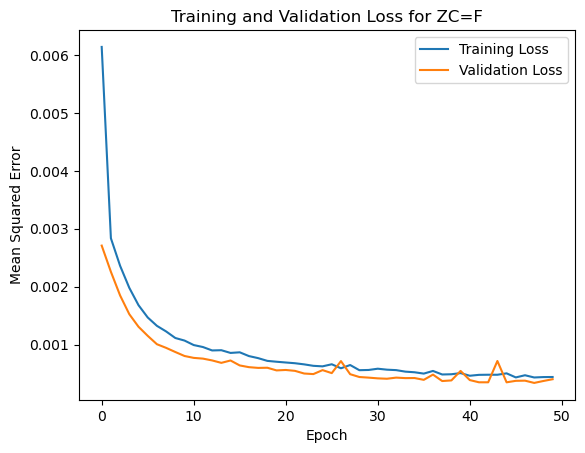

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0102 - val_loss: 0.0034
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 11/50
65/65 [===========

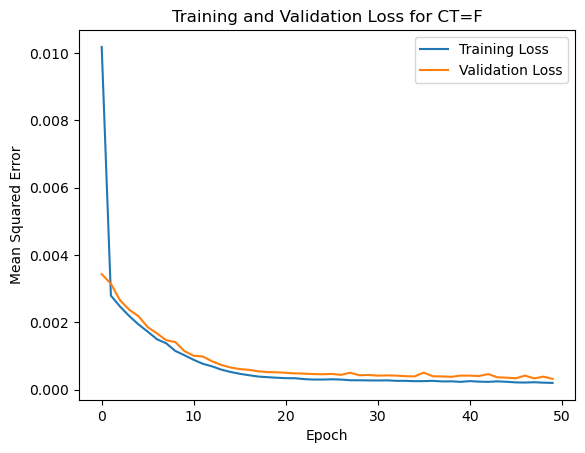

21/21 [==============================] - 0s 1ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0251 - val_loss: 0.0060
Epoch 2/50
65/65 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 11/50
65/65 [===========

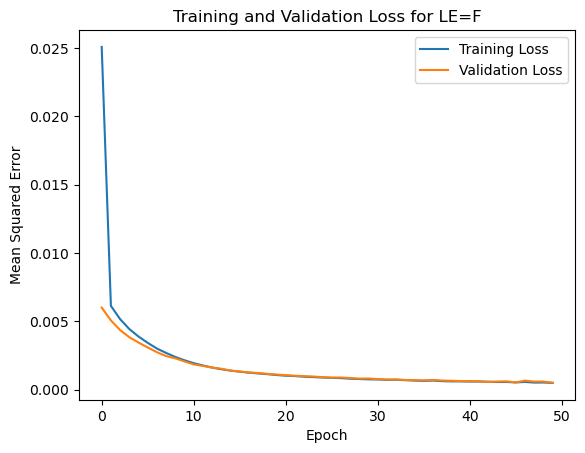

21/21 [==============================] - 0s 2ms/step
Epoch 1/50


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


65/65 [==============================] - 1s 3ms/step - loss: 0.0135 - val_loss: 0.0023
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 11/50
65/65 [===========

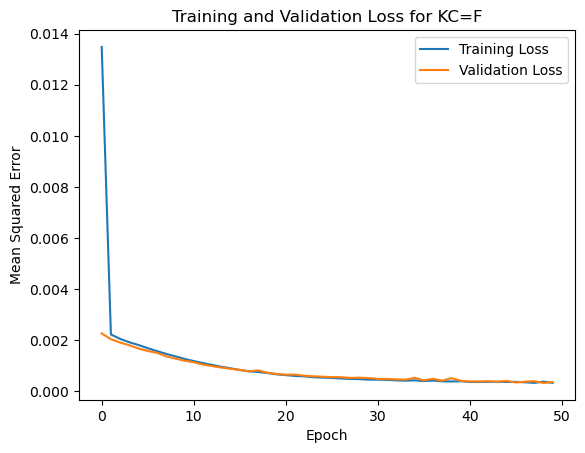

21/21 [==============================] - 0s 599us/step
  Stock         MSE        MAE        R2
0  CL=F   14.034654   2.532102  0.971725
1  BZ=F    9.312481   2.170154  0.982288
2  NG=F    0.080106   0.187286  0.981356
3  SI=F    0.360688   0.437504  0.953173
4  HG=F    0.005543   0.055733  0.984290
5  ZC=F  245.766405  11.436049  0.986564
6  CT=F    9.380481   1.955026  0.983286
7  LE=F    1.924725   1.039987  0.992028
8  KC=F   29.199659   4.131105  0.987527


C:\Users\kship\AppData\Local\Temp\ipykernel_32776\195812659.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Bidirectional, GRU
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import SGD



stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
]

# Custom Metrics Callback
class Metrics(Callback):
    def __init__(self, val_data):
        super().__init__()
        self.validation_data = val_data

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_true = self.validation_data[1]
        _val_r2 = r2_score(val_true, val_predict)
        print(f"val_r2: {_val_r2}")


metrics_df = pd.DataFrame(columns=['Stock', 'MSE', 'MAE', 'R2'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/CL=F_stock_data.csv")
split_point = int(len(data) * 0.8)
indices=list(range(split_point,len(data)))
predictions=pd.DataFrame(index=indices)
actuals=pd.DataFrame(index=indices)



for stock in stocks:
    # Read and preprocess data
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}_stock_data.csv")
    data['Avg_Close_30'] = data['Avg_Close_30'].shift(1)
    data['Avg_Volume_30'] = data['Avg_Volume_30'].shift(1)
    data['Volatility'] = data['Volatility'].shift(1)
    data = data.dropna()

    feat = data.columns[6:]
    split_point = int(len(data) * 0.8)
    train, test = data[:split_point], data[split_point:]
    X_train, y_train = train[feat], train['Close']
    X_test, y_test = test[feat], test['Close']

    scaler_X = MinMaxScaler()
    scaler_Y = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1,1))

    # Reshape data for LSTM
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

    # Splitting data for validation set
    train_idx, val_idx = train_test_split(np.arange(X_train_reshaped.shape[0]), test_size=0.2)
    X_val_reshaped = X_train_reshaped[val_idx]
    y_val_scaled = y_train_scaled[val_idx]
    X_train_reshaped = X_train_reshaped[train_idx]
    y_train_scaled = y_train_scaled[train_idx]

    # Create Metrics object with validation data
    metrics = Metrics(val_data=(X_val_reshaped, y_val_scaled))

    
    model = Sequential()
    # First GRU layer with Dropout regularisation
    model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='linear'))
    model.add(Dense(1))
    # Compiling the RNN
    model.compile(optimizer='adamax',loss='mean_squared_error')
    # Fitting to the training set
#     model.compile(optimizer='adamax', loss='mse')

    # Train the model
    history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, verbose=1, validation_data=(X_val_reshaped, y_val_scaled), callbacks=[early_stopping])

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss for {stock}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped)
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    
    actuals[stock]=y_test
    predictions[stock]=y_pred_original
    
    
    mse = mean_squared_error(y_test, y_pred_original)
    mae = mean_absolute_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)
    metrics_df = metrics_df.append({'Stock': stock, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

print(metrics_df)


### Overall model performance

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_squared_error(actuals, predictions))
print(mean_absolute_error(actuals, predictions))
print(r2_score(actuals, predictions))

34.451637988151184
2.6605494956083646
0.980248672304895


In [21]:
predictions.to_csv(f"C:/Users/kship/Documents/IB/predictions/results/GRU_adamax_C.csv")

In [48]:
GRU_adamax_Predicted_Prices=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/results/GRU_adamax_C.csv")
GRU_adamax_Predicted_Prices.drop(columns='Unnamed: 0',inplace=True)
GRU_adamax_Predicted_Prices

CL=F       BZ=F      NG=F       SI=F      HG=F       ZC=F  \
0    38.789177  40.021040  1.809197  18.010181  2.502626  327.43500   
1    40.200400  40.351315  1.786210  17.673487  2.538592  329.13214   
2    40.081398  40.888615  1.800394  17.759378  2.547216  331.03330   
3    39.124733  41.215122  1.780009  17.670480  2.592479  330.60440   
4    39.763927  41.874756  1.784627  17.815998  2.617311  330.31610   
..         ...        ...       ...        ...       ...        ...   
644  74.733420  80.985710  4.963682  23.325375  3.796888  647.24330   
645  75.364494  80.354080  4.834464  23.556107  3.784627  655.55500   
646  75.640720  80.667130  4.912959  23.735247  3.788316  662.25714   
647  76.719700  81.360954  4.672748  23.625206  3.813845  668.21686   
648  78.052630  81.755330  4.637378  23.754286  3.829827  674.48590   

          CT=F        LE=F        KC=F  
0    59.911133   95.661900  100.424610  
1    60.691875   95.240380  100.076324  
2    60.628887   94.752785   99.637985  
3    59.960373   95.601940  100.091470  
4    59.520786   95.093140   98.357870  
..         ...         ...         ...  
644  85.417820  156.988390  168.823150  
645  85.331116  157.658480  170.615190  
646  84.309070  157.754070  171.870200  
647  83.034250  157.940860  172.992430  
648  82.472940  158.627430  172.814270  

[649 rows x 9 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


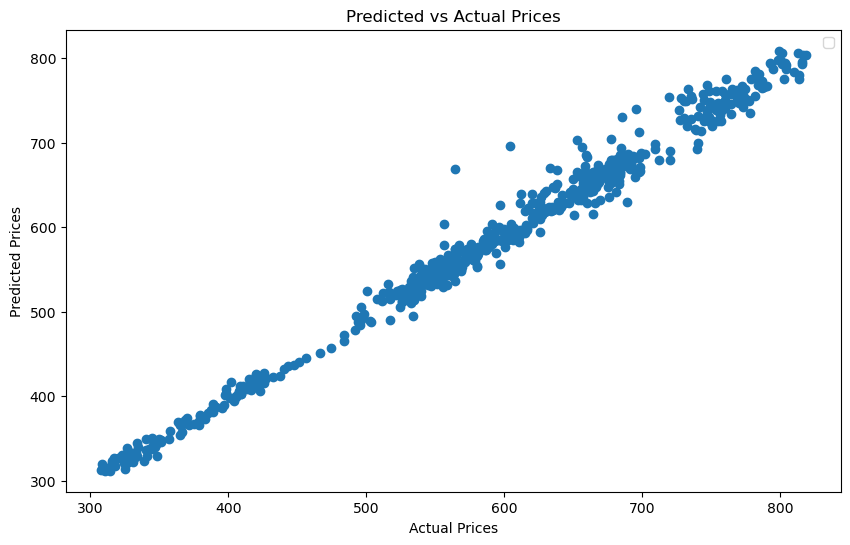

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(Actual_Prices['ZC=F'], GRU_adamax_Predicted_Prices['ZC=F'])
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.show()

## Portfolio Returns with GRU Adamax Predictions 

In [50]:
assetLabels = GRU_adamax_Predicted_Prices.columns.tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#read asset prices data
StockData = GRU_adamax_Predicted_Prices.iloc[0:, 0:]

#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)

Asset labels of k-portfolio 1: 
 ['CL=F', 'BZ=F', 'NG=F', 'SI=F', 'HG=F', 'ZC=F', 'CT=F', 'LE=F', 'KC=F']

Mean Returns:
 [0.115 0.122 0.202 0.054 0.073 0.123 0.061 0.079 0.096]

Variance-Covariance Matrix of Returns:
 [[ 1.444  0.898  0.347  0.09   0.199  0.128  0.17  -0.037  0.092]
 [ 0.898  2.296  0.518  0.304  0.504  0.253  0.345  0.016  0.242]
 [ 0.347  0.518 11.508  0.074  0.318  0.144  0.522 -0.073  0.067]
 [ 0.09   0.304  0.074  2.336  0.534  0.247  0.244 -0.014  0.319]
 [ 0.199  0.504  0.318  0.534  1.522  0.168  0.302  0.035  0.255]
 [ 0.128  0.253  0.144  0.247  0.168  2.222  0.311 -0.009  0.135]
 [ 0.17   0.345  0.522  0.244  0.302  0.311  2.253  0.054  0.348]
 [-0.037  0.016 -0.073 -0.014  0.035 -0.009  0.054  0.276  0.017]
 [ 0.092  0.242  0.067  0.319  0.255  0.135  0.348  0.017  2.388]]


In [51]:
portfolioSize = len(GRU_adamax_Predicted_Prices.columns)

#set risk free asset rate of return
Rf=3  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )


Risk free rate (daily %): 0.008
Maximal Sharpe Ratio:  [[2.965]] 
Annualized Risk (%):   [[6.94]] 
Annualized Expected Portfolio Return(%):   [23.577]

Optimal weights (%):
 [[15.334]
 [ 1.032]
 [ 3.455]
 [ 1.863]
 [ 2.462]
 [ 9.135]
 [ 0.   ]
 [60.629]
 [ 6.09 ]]
